In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import copy

from load_data import load_expression
from model import SpiceMix
from Result import SpiceMixResult

In [2]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['figure.dpi'] = 300

In [3]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: flex;
    justify-content: center;
}
</style>
""")

In [4]:
import h5py

In [5]:
with h5py.File("../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_lambda_1e-4_K_10.hdf5", 'r') as h5file:
    print(h5file["progress"]["Q"]["500"][()])

233100.1884211058


In [6]:
synthetic_cortex_spatial_result = SpiceMixResult(
    path2dataset='../../data/synthetic_metagene_free_cortex/500_cells_100_genes_high_variance_low_covariance_random_seed_4',
    result_filename="../../data/synthetic_metagene_free_cortex/500_cells_100_genes_high_variance_low_covariance_random_seed_4/results_with_spatial_extreme_lambda_K_15_initialization_seed_0.hdf5",
    neighbor_suffix="",
)

synthetic_cortex_nmf_result = SpiceMixResult(
    path2dataset='../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_4',
    result_filename="../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_4/results_no_spatial_K_15.hdf5",
    neighbor_suffix="",
)

Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_high_variance_low_covariance_random_seed_4/results_with_spatial_extreme_lambda_K_15_initialization_seed_0.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

Found 500 iterations from ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_high_variance_low_covariance_random_seed_4/results_with_spatial_extreme_lambda_K_15_initialization_seed_0.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Found 500 iterations from ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_4/results_no_spatial_K_15.hdf5


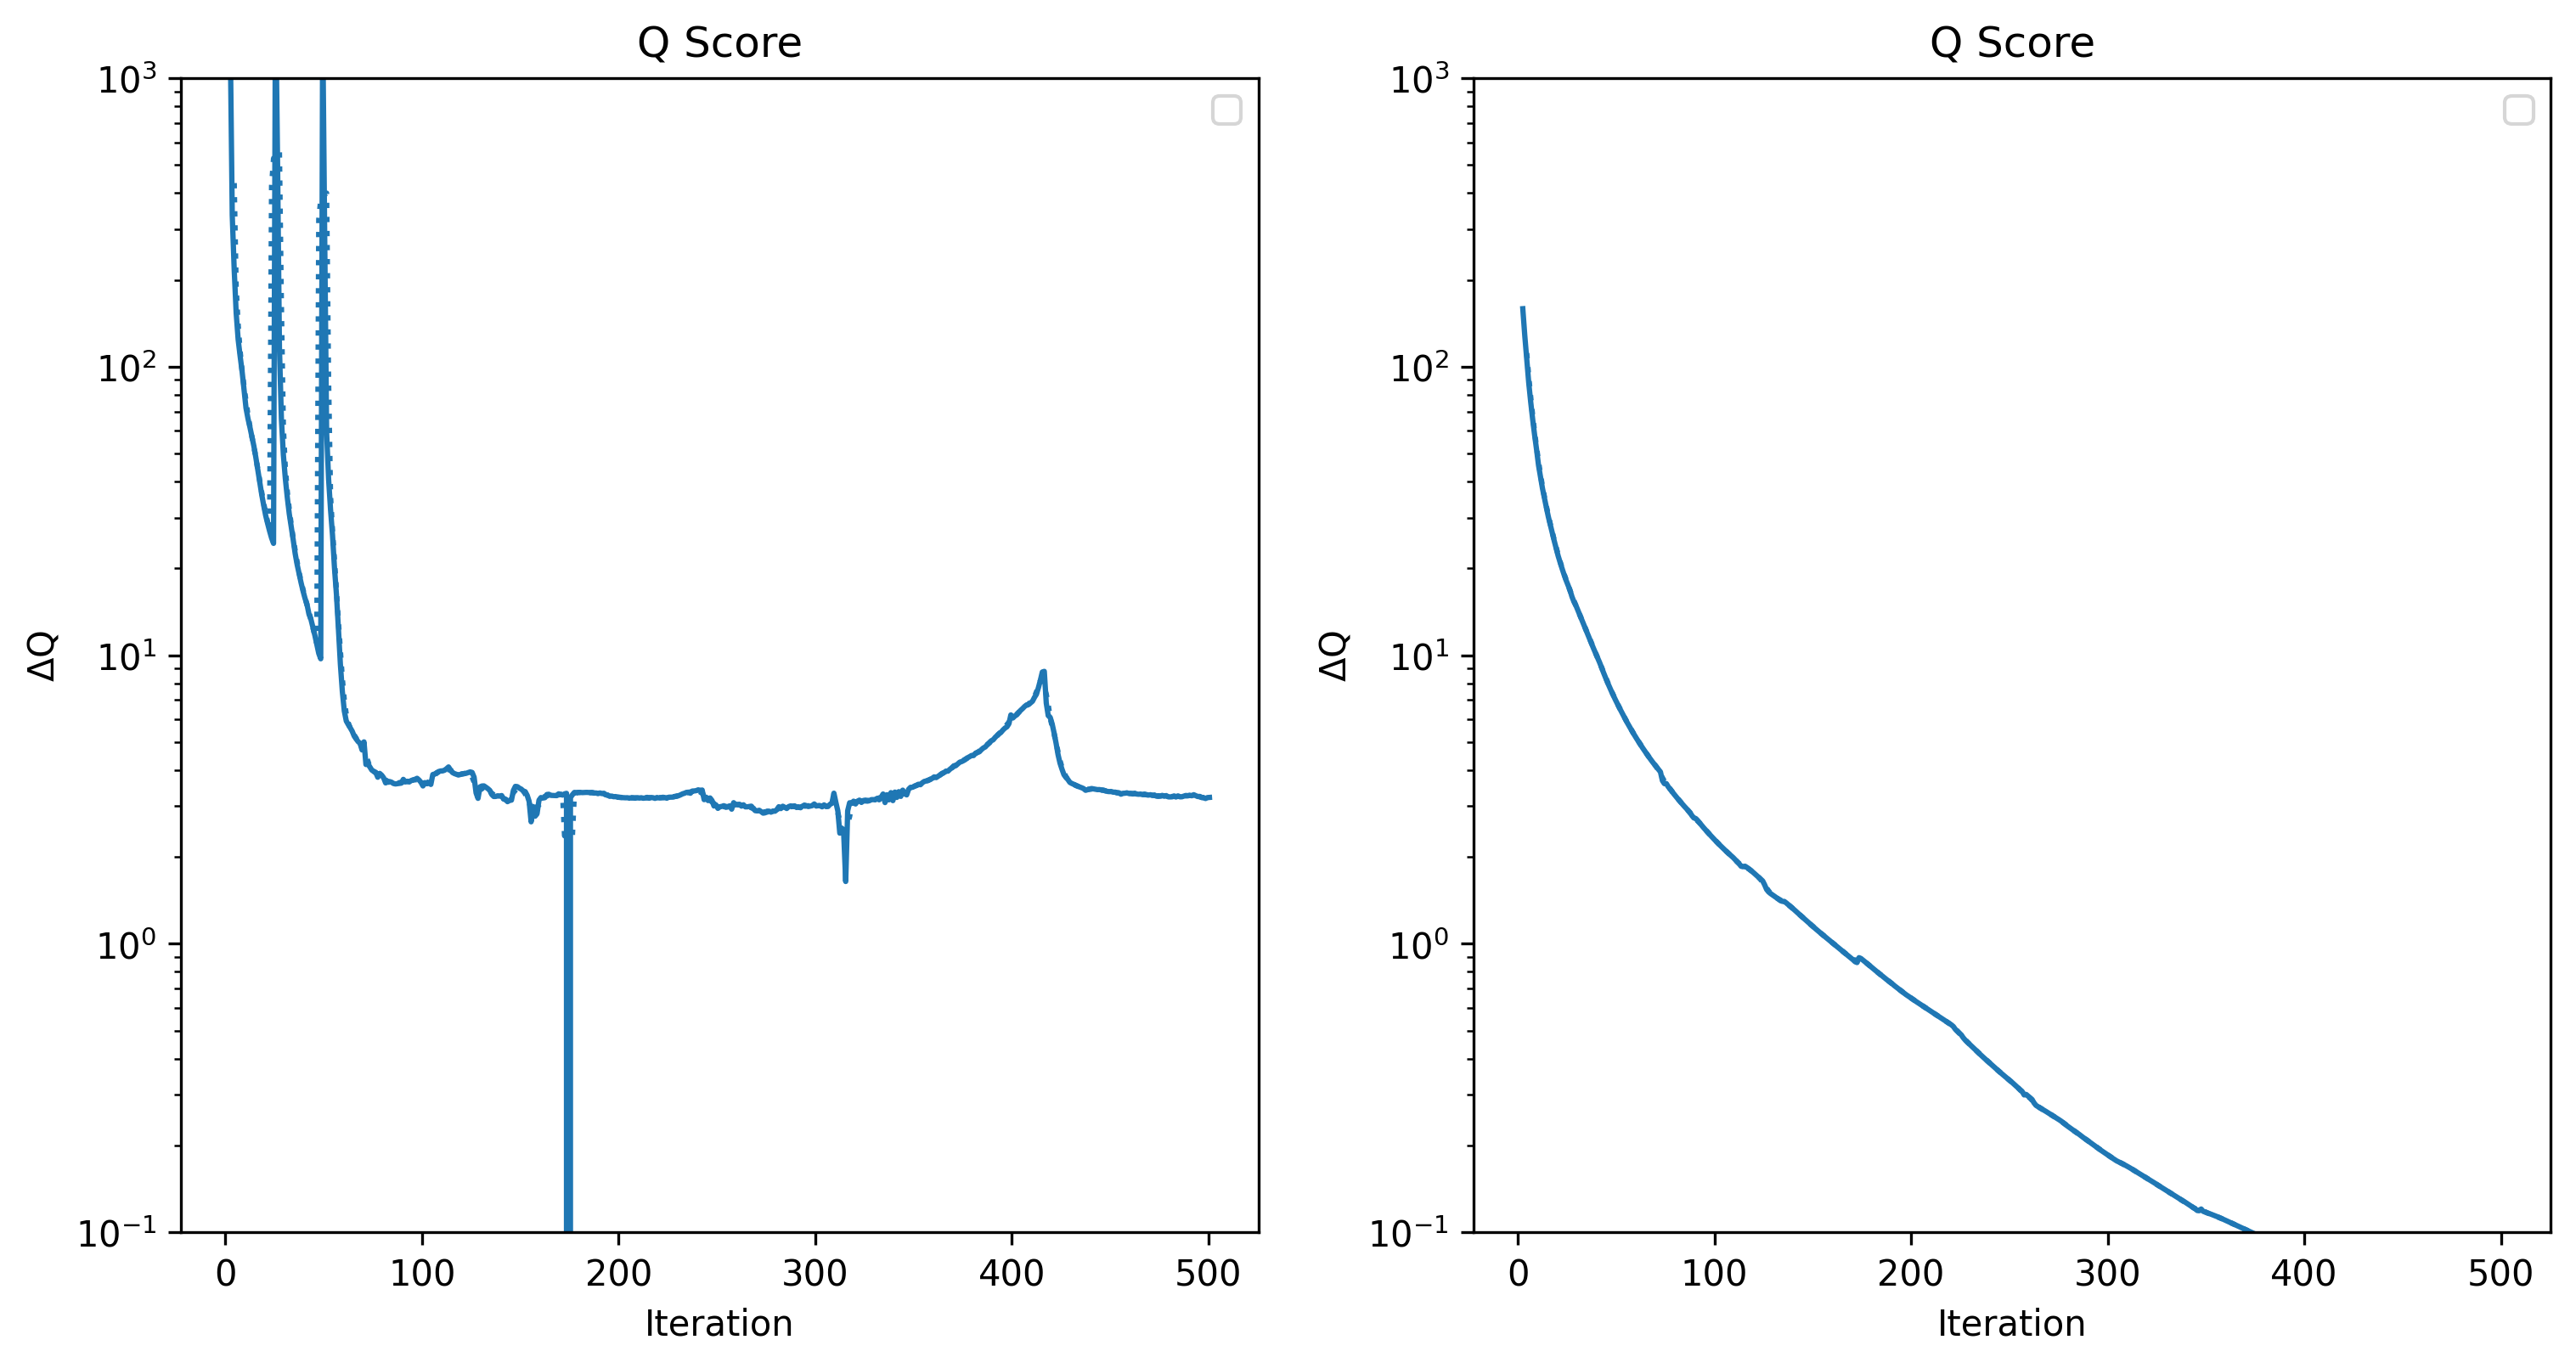

In [7]:
# Prior to downstream analysis, we should make sure the models have converged
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
synthetic_cortex_spatial_result.plot_convergence(axes[0], label='SpiceMix', c='C0')
synthetic_cortex_nmf_result.plot_convergence(axes[1], label='NMF', c='C0')

In [8]:
# Load latent states for all cells estimated by the last iteration of SpiceMix/NMF
synthetic_cortex_spatial_result.load_latent_states(iiter=-1)
synthetic_cortex_nmf_result.load_latent_states(iiter=-1)

Iteration -1
Iteration -1


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


8
10


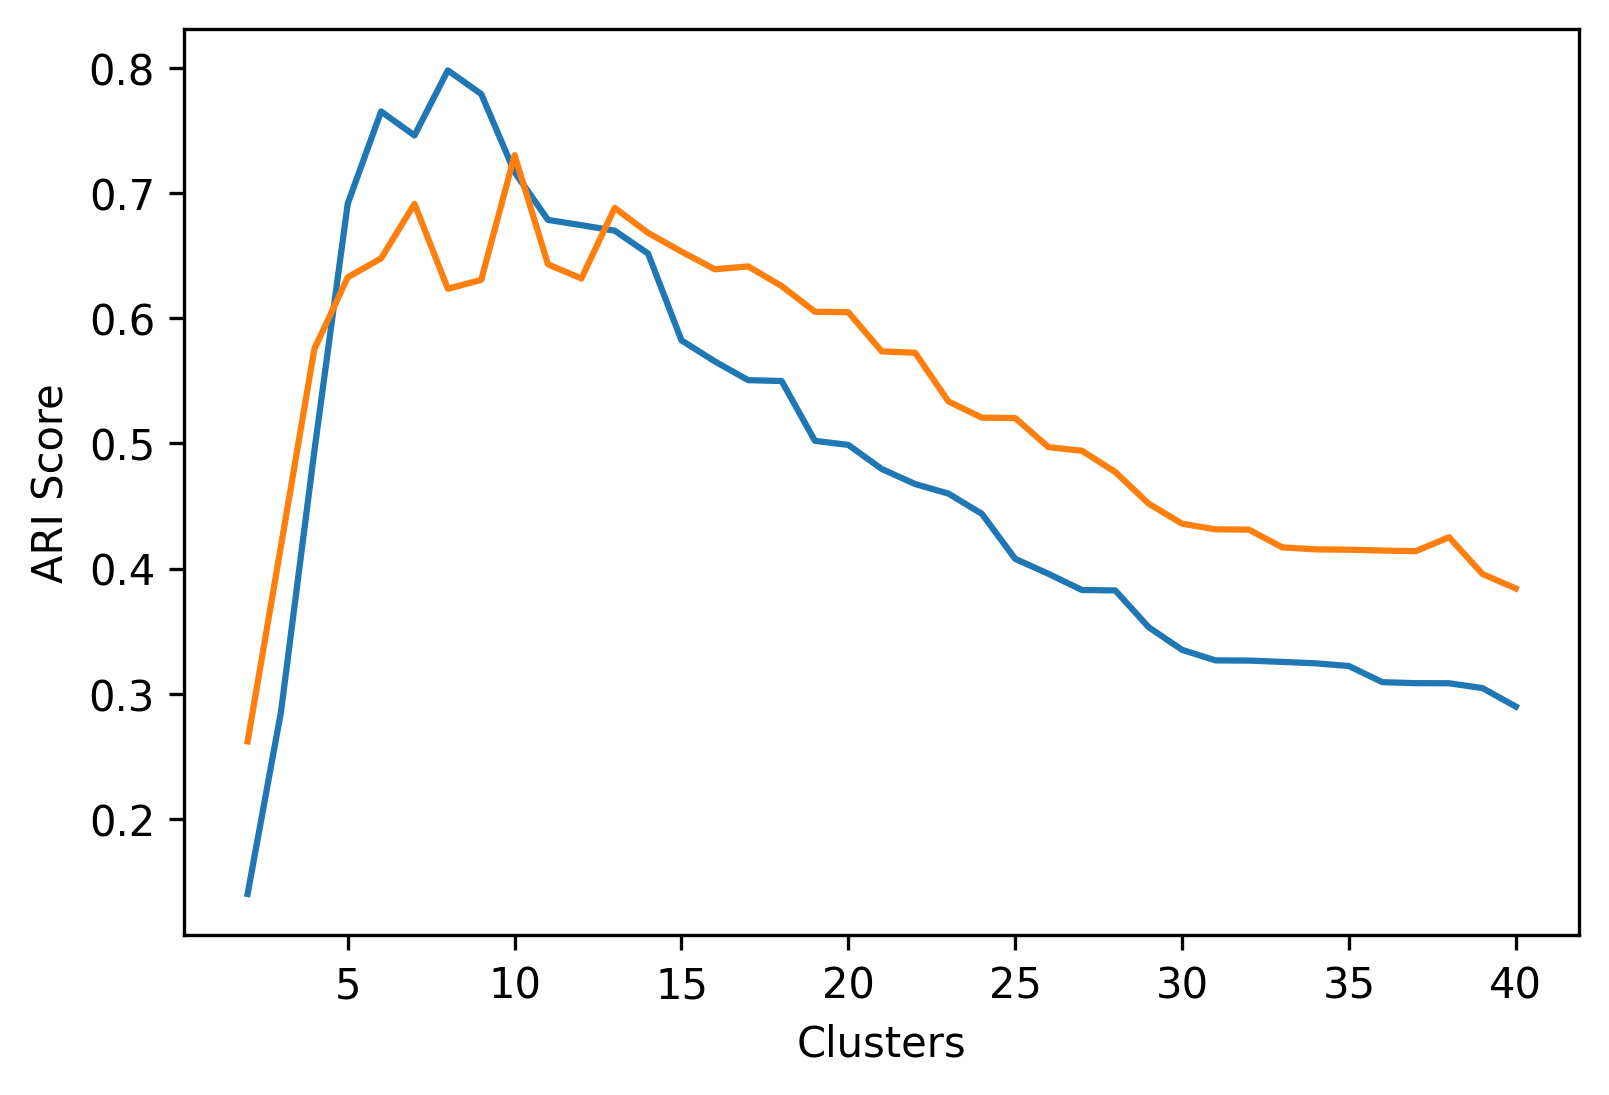

In [9]:
fig, ax = plt.subplots()
optimal_spatial_clusters = synthetic_cortex_spatial_result.plot_ari_versus_clusters(ax, K_range=np.arange(2, 41))
optimal_nmf_clusters = synthetic_cortex_nmf_result.plot_ari_versus_clusters(ax, K_range=np.arange(2, 41))
print(optimal_spatial_clusters)
print(optimal_nmf_clusters)

optimal K = 8
#clusters = 8, #-1 = 0
optimal K = 25
#clusters = 25, #-1 = 0


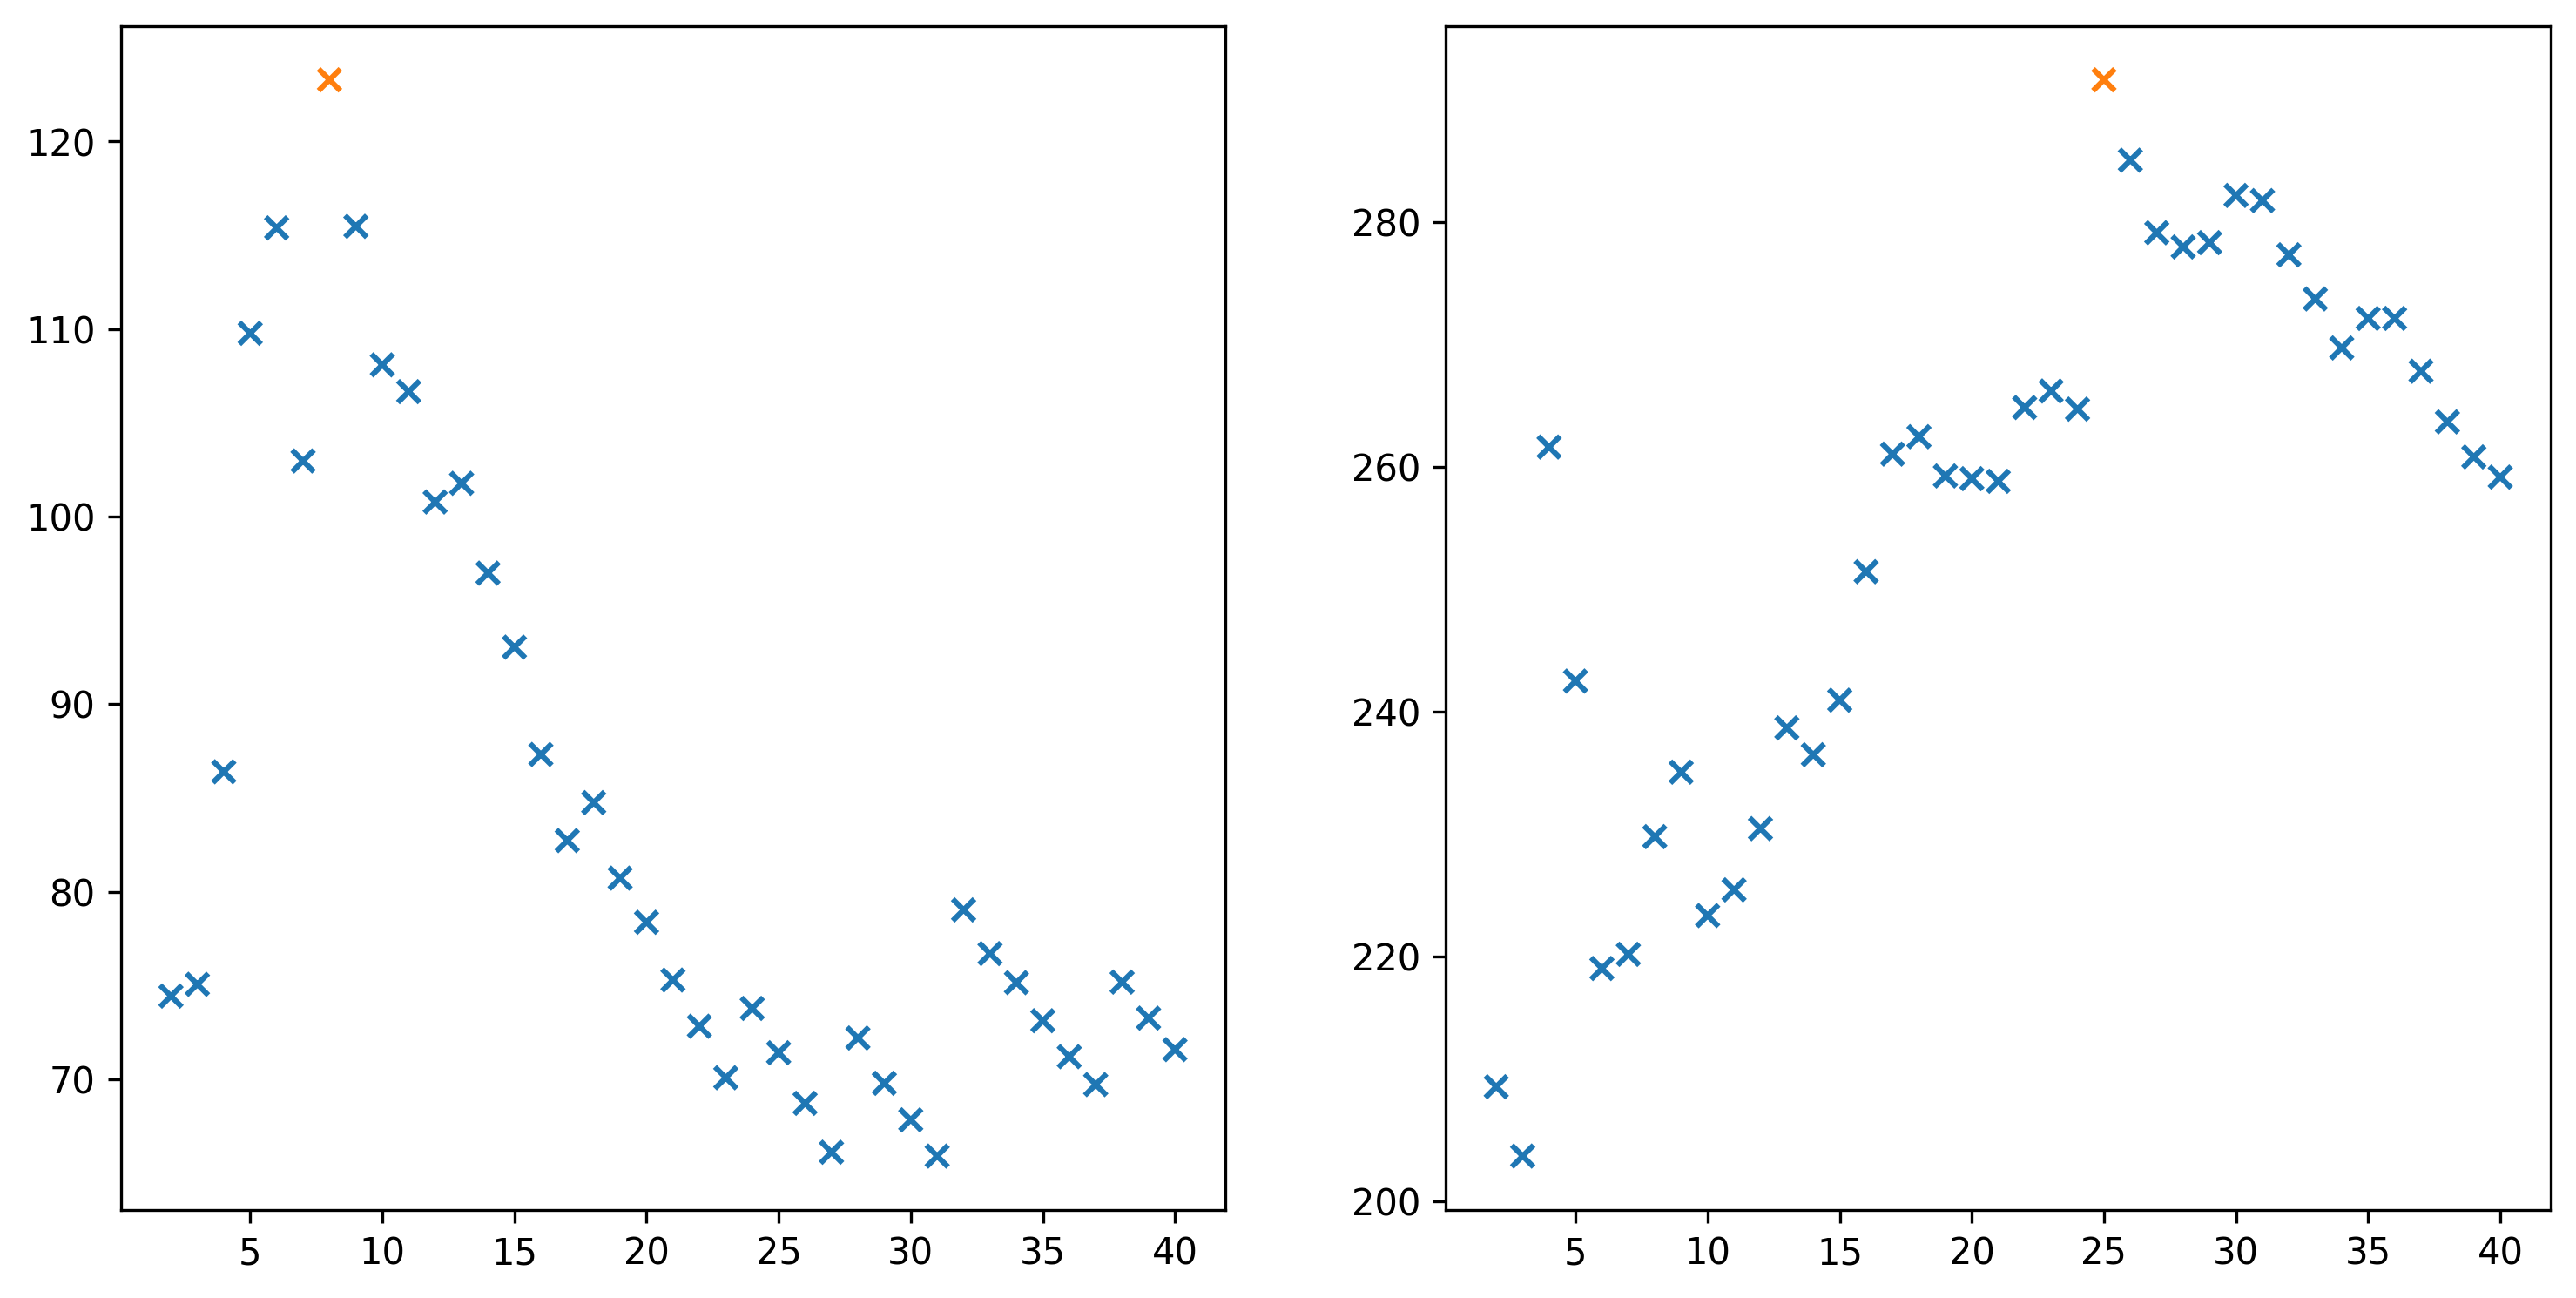

In [10]:
# Do hierarchical clustering on ALL cells in the latent space
# TODO: accelerate this function for datasets of 10k+ cells 
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
synthetic_cortex_spatial_result.determine_optimal_clusters(axes[0], K_range=np.arange(2, 41))
synthetic_cortex_nmf_result.determine_optimal_clusters(axes[1], K_range=np.arange(2, 41))

In [11]:
print(synthetic_cortex_spatial_result.calculate_ari_score())
print(synthetic_cortex_nmf_result.calculate_ari_score())

0.7980211405801152
0.5202098258547523


In [24]:
synthetic_cortex_spatial_result.determine_clusters(7)
synthetic_cortex_nmf_result.determine_clusters(7)

array([5, 5, 0, 5, 0, 0, 0, 0, 5, 0, 0, 5, 5, 0, 0, 0, 1, 5, 0, 1, 1, 5,
       1, 0, 5, 1, 0, 1, 0, 0, 5, 5, 1, 0, 1, 5, 1, 5, 5, 1, 1, 0, 5, 5,
       0, 1, 0, 0, 5, 1, 1, 1, 0, 5, 5, 5, 5, 5, 0, 0, 5, 1, 0, 5, 0, 1,
       5, 0, 5, 0, 0, 0, 1, 0, 5, 1, 5, 0, 0, 0, 1, 5, 5, 1, 0, 5, 5, 5,
       0, 0, 5, 1, 0, 0, 1, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 1, 1, 1, 1, 5,
       0, 5, 5, 1, 0, 0, 5, 5, 0, 0, 5, 5, 0, 1, 0, 1, 0, 0, 5, 5, 5, 0,
       1, 5, 0, 5, 0, 1, 5, 5, 1, 1, 5, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 5,
       5, 5, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 2, 2,
       2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 2, 2, 2, 0, 1, 0, 0, 1, 0,
       0, 2, 2, 2, 0, 0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0,
       0, 2, 2, 6, 0, 0, 6, 0, 0, 3, 1, 3, 1, 3, 6, 1, 6, 1, 6, 6, 1, 0,
       1, 0, 0, 1, 3, 0, 0, 6, 3, 6, 0, 3, 1, 1, 1, 0, 0, 0, 1, 6, 3, 0,
       0, 1, 0, 2, 0, 0, 2, 3, 3, 6, 1, 3, 6, 0, 6, 1, 6, 2, 1, 0, 1, 2,
       3, 3, 0, 1, 0, 2, 3, 2, 1, 2, 0, 2, 6, 6, 6,

In [25]:
print(synthetic_cortex_spatial_result.calculate_ari_score())
print(synthetic_cortex_nmf_result.calculate_ari_score())

0.8646063057443323
0.7279813374433743


In [17]:
synthetic_cortex_spatial_result.data

x         y replicate  ['Gene' '0']  ['Gene' '1']  ['Gene' '2']  \
0    0.279539  0.680154         0     19.964227     11.987063     20.956600   
1    0.243025  0.141266         0      9.731584      5.820617      9.895291   
2    0.422898  0.495319         0     10.264405      6.127702     10.323745   
3    0.109399  0.624135         0     14.072259      8.054002     14.882734   
4    0.527095  0.749474         0     19.614005     11.623051     21.889798   
..        ...       ...       ...           ...           ...           ...   
995  0.630344  0.059053         1     15.888031     17.648374     13.469121   
996  0.850652  0.670850         1      4.781671      5.184837      3.679773   
997  0.239205  0.407745         1      3.791161      4.096304      3.240459   
998  0.729280  0.404895         1     12.404856     13.096622     10.352516   
999  0.004837  0.538591         1      6.172924      7.074000      4.747997   

     ['Gene' '3']  ['Gene' '4']  ['Gene' '5']  ['Gene' '6']  ...  \
0       20.597032      8.181523      6.486453     17.520509  ...   
1       10.498429      4.111399      3.228753      8.674962  ...   
2       10.842651      4.144140      3.242807      8.460565  ...   
3       14.661064      6.013242      4.509715     12.700301  ...   
4       20.531954      8.640134      6.638333     18.287336  ...   
..            ...           ...           ...           ...  ...   
995     42.379454     14.044543      8.535071     28.594977  ...   
996     12.084816      4.042500      2.498593      8.727163  ...   
997      9.718568      3.112111      2.100331      6.855882  ...   
998     33.203840     10.691286      7.080216     22.717092  ...   
999     15.682082      5.272880      2.964518     11.067939  ...   

       Metagene 7    Metagene 8    Metagene 9   Metagene 10   Metagene 11  \
0    6.684597e-07  3.567096e+00  9.475298e+02  3.066235e+00  5.059477e-01   
1    3.548875e-09  9.958334e-09  4.693297e+02  2.269390e-05  8.125536e-01   
2    7.797232e+02  2.557048e+00  2.956556e-09  1.688076e-05  1.063640e-09   
3    1.227321e-08  1.904232e+00  6.835174e+02  1.652667e+00  2.628674e+00   
4    1.378140e+03  3.450774e-07  2.392687e+01  2.102055e-09  1.764319e+00   
..            ...           ...           ...           ...           ...   
995  6.639668e+01  8.943020e+00  2.168910e-09  6.678150e+00  4.748321e+00   
996  1.709509e-07  1.986827e-07  9.788307e-08  2.456569e-08  1.559418e+00   
997  2.774600e-09  2.121205e-01  1.529405e+01  3.676840e-10  6.777657e-10   
998  3.116384e+01  2.605174e+01  5.777607e-07  2.110883e+00  3.314778e+00   
999  3.231114e+01  7.410916e+00  7.468082e+00  2.194728e-08  1.466708e+00   

      Metagene 12   Metagene 13   Metagene 14  cluster_raw  cluster  
0    4.716863e-07  1.381180e+01  1.357782e-05            6        6  
1    1.779347e-09  1.625588e+01  7.481956e-10            6        6  
2    4.328000e+00  1.594211e+01  3.546850e+00            3        3  
3    1.401073e+00  9.597713e-08  6.036528e-01            6        6  
4    6.556826e+00  2.161444e+00  3.271297e+00            3        3  
..            ...           ...           ...          ...      ...  
995  9.027281e+00  2.236822e+03  2.431823e-06            4        4  
996  1.336969e+01  6.607133e+02  1.873012e+00            4        4  
997  1.129100e-09  5.011628e+02  5.138825e-10            4        4  
998  2.561236e-07  1.779311e+03  6.005212e+00            4        4  
999  2.238890e-08  8.435914e+02  1.614348e-07            4        4  

[1000 rows x 121 columns]

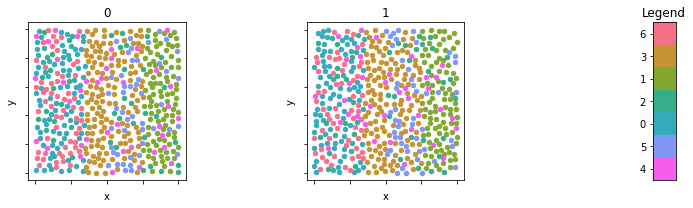

In [18]:
plot_height = int(np.sqrt(synthetic_cortex_spatial_result.num_repli))
plot_width = synthetic_cortex_spatial_result.num_repli // plot_height

if plot_height * plot_width <= synthetic_cortex_spatial_result.num_repli:
    plot_width += 1

fig, axes = plt.subplots(plot_height, plot_width, figsize=(plot_width * 4, plot_height * 3))
synthetic_cortex_spatial_result.plot_multireplicate(axes, "cluster")

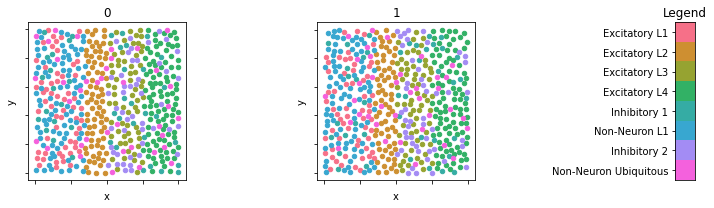

In [19]:
plot_height = int(np.sqrt(synthetic_cortex_spatial_result.num_repli))
plot_width = synthetic_cortex_spatial_result.num_repli // plot_height

if plot_height * plot_width <= synthetic_cortex_spatial_result.num_repli:
    plot_width += 1

fig, axes = plt.subplots(plot_height, plot_width, figsize=(plot_width * 4, plot_height * 3))
synthetic_cortex_spatial_result.plot_multireplicate(axes, "label")

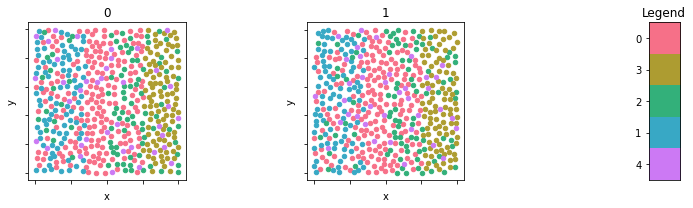

In [20]:
plot_height = int(np.sqrt(synthetic_cortex_nmf_result.num_repli))
plot_width = synthetic_cortex_nmf_result.num_repli // plot_height

if plot_height * plot_width <= synthetic_cortex_nmf_result.num_repli:
    plot_width += 1

fig, axes = plt.subplots(plot_height, plot_width, figsize=(plot_width * 4, plot_height * 3))
synthetic_cortex_nmf_result.plot_multireplicate(axes, "cluster")

In [21]:
replicate = "0"

In [22]:
(num_genes, num_metagenes) = synthetic_cortex_spatial_result.parameters["M"][-1].shape

metagene_correlations = np.zeros((num_metagenes, num_metagenes))
for first_index, first_metagene in enumerate(synthetic_cortex_spatial_result.parameters["M"][-1].T):
    for second_index, second_metagene in enumerate(synthetic_cortex_nmf_result.parameters["M"][-1].T):
        correlation = pearsonr(first_metagene, second_metagene)[0]
        metagene_correlations[first_index, second_index] = correlation

In [24]:
#synthetic_cortex_nmf_result.metagene_order = metagene_correlations.argmax(axis=1)
synthetic_cortex_nmf_result.metagene_order = np.arange(20)

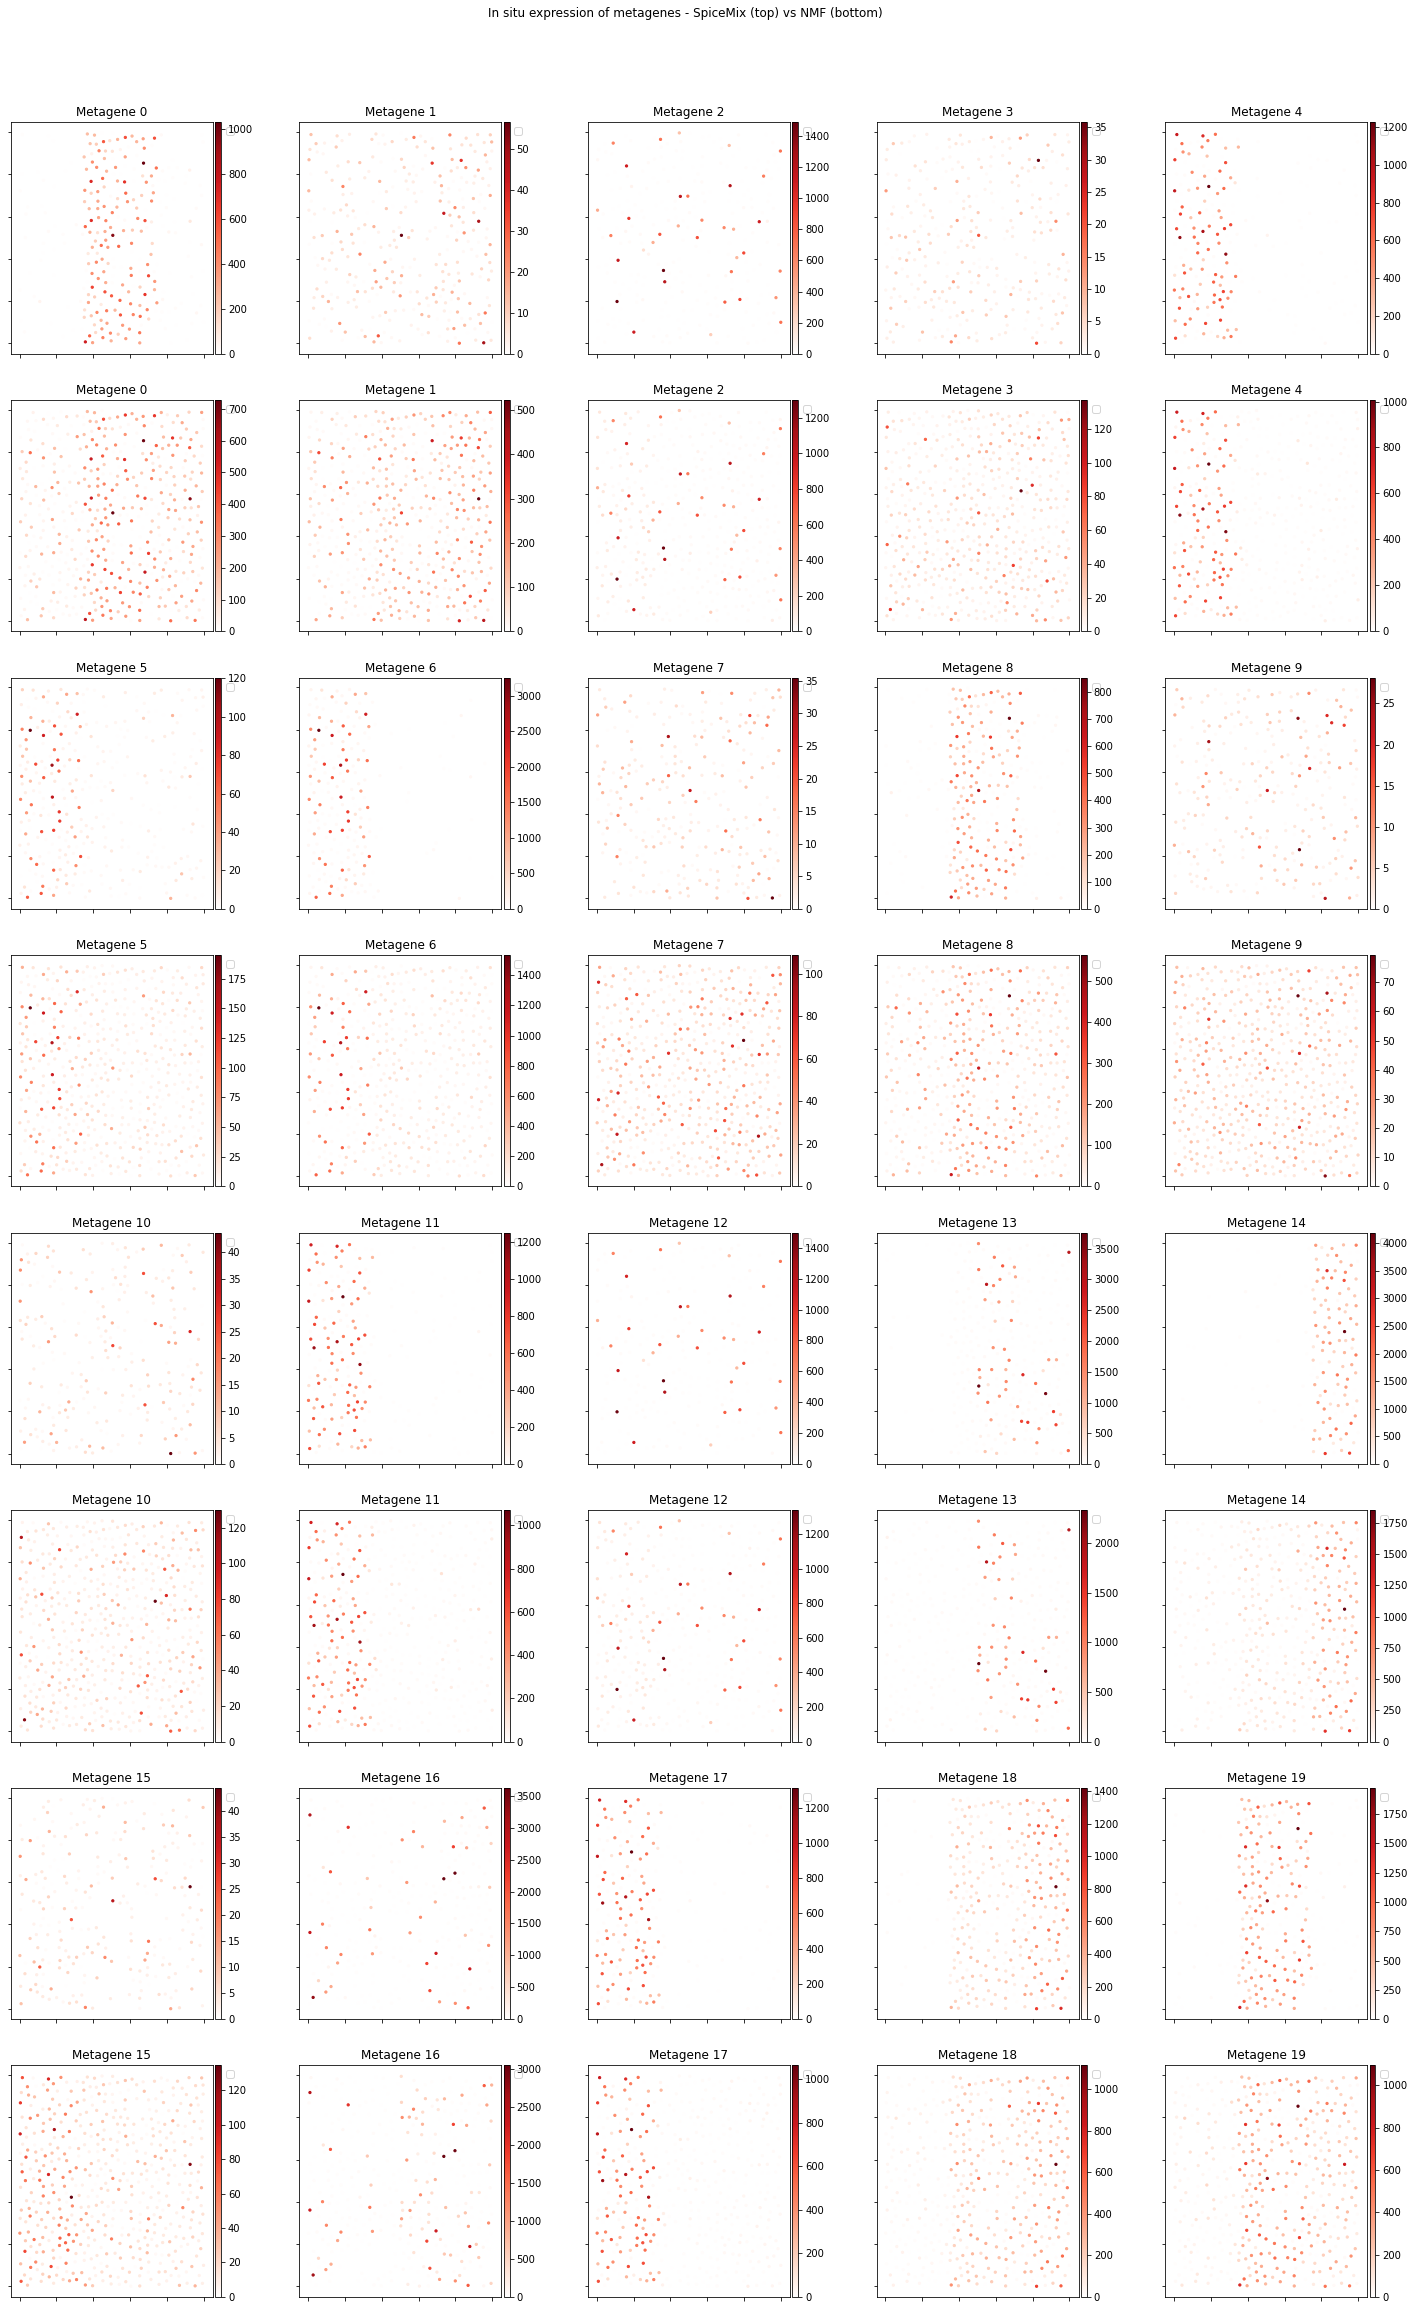

In [25]:
# We ovrlap latent states on the spatial space
# SpiceMix metagenes are expected to show clearer spatial patterns with less background expressions
segmentdata = copy.deepcopy(plt.get_cmap('Reds')._segmentdata)
segmentdata['red'  ][0] = (0., 1., 1.)
segmentdata['green'][0] = (0., 1., 1.)
segmentdata['blue' ][0] = (0., 1., 1.)
cmap = LinearSegmentedColormap('', segmentdata=segmentdata, N=256)

plot_height = 8
plot_width = 5
fig, axes = plt.subplots(plot_height, plot_width, figsize=(plot_width * 5, plot_height * 5))
fig.suptitle('In situ expression of metagenes - SpiceMix (top) vs NMF (bottom)', y=.92)
synthetic_cortex_spatial_result.plot_metagenes(axes[[0, 2, 4, 6]], s=5, cmap=cmap, replicate=replicate)
synthetic_cortex_nmf_result.plot_metagenes(axes[[1, 3, 5, 7]], s=5, cmap=cmap, replicate=replicate)
plt.show()

In [69]:
# do dimensionality reduction by UMAP
kwargs=dict(
    n_components=2,
    n_neighbors=30,
    min_dist=0.2,
    random_state=0,
)
synthetic_cortex_spatial_result.UMAP(**kwargs)
synthetic_cortex_nmf_result.UMAP(**kwargs)

Text(0.5, 1.0, 'True Labels')

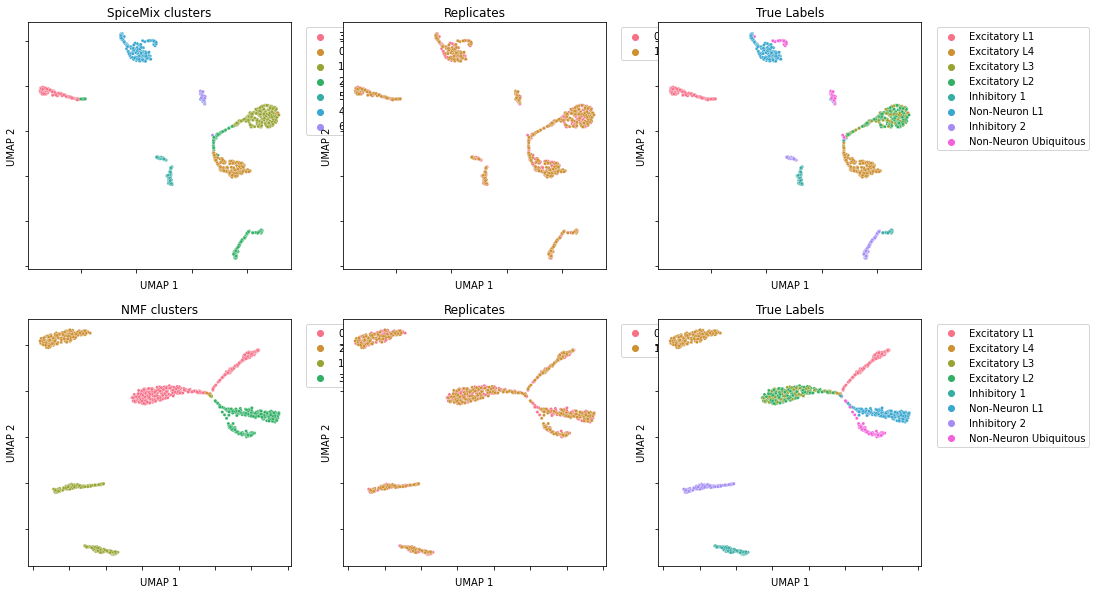

In [70]:
# Visualize cells in the latent space colored by
#   SpiceMix/NMF clusters (cluster)
#   cell types from the original analysis (cell type)
#   replicates (repli)
# Result.visualizeFeaturesSpace is a wraper of Result.visualizeFeatureSpace and handles the custom order of metagenes
kwargs = dict(s=10)
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
synthetic_cortex_spatial_result.plot_feature(axes[0, 0], 'cluster', key_x='UMAP 1', key_y='UMAP 2', **kwargs)
synthetic_cortex_spatial_result.plot_feature(axes[0, 1], 'replicate', key_x='UMAP 1', key_y='UMAP 2', **kwargs)
synthetic_cortex_spatial_result.plot_feature(axes[0, 2], 'label', key_x='UMAP 1', key_y='UMAP 2', **kwargs)

synthetic_cortex_nmf_result.plot_feature(axes[1, 0], 'cluster', key_x='UMAP 1', key_y='UMAP 2', **kwargs)
synthetic_cortex_nmf_result.plot_feature(axes[1, 1], 'replicate', key_x='UMAP 1', key_y='UMAP 2', **kwargs)
synthetic_cortex_nmf_result.plot_feature(axes[1, 2], 'label', key_x='UMAP 1', key_y='UMAP 2', **kwargs)

axes[0, 0].set_title('SpiceMix clusters')
axes[0, 1].set_title('Replicates')
axes[0, 2].set_title('True Labels')
axes[1, 0].set_title('NMF clusters')
axes[1, 1].set_title('Replicates')
axes[1, 2].set_title('True Labels')

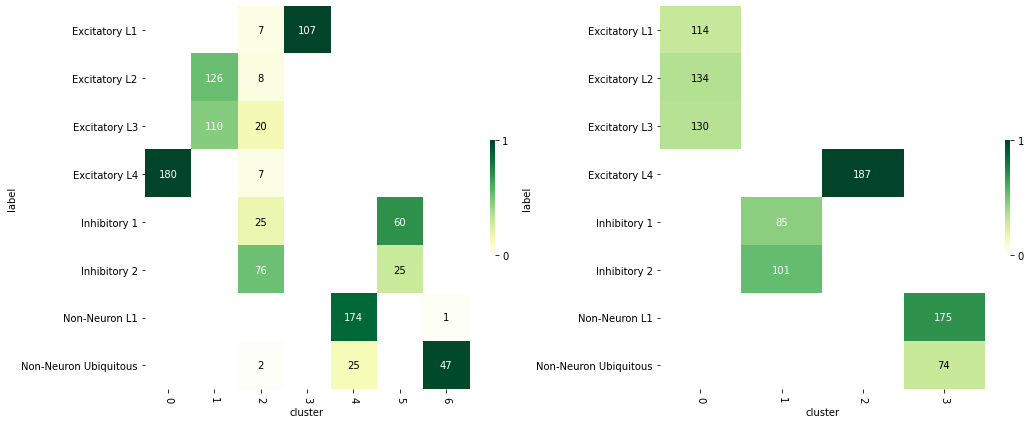

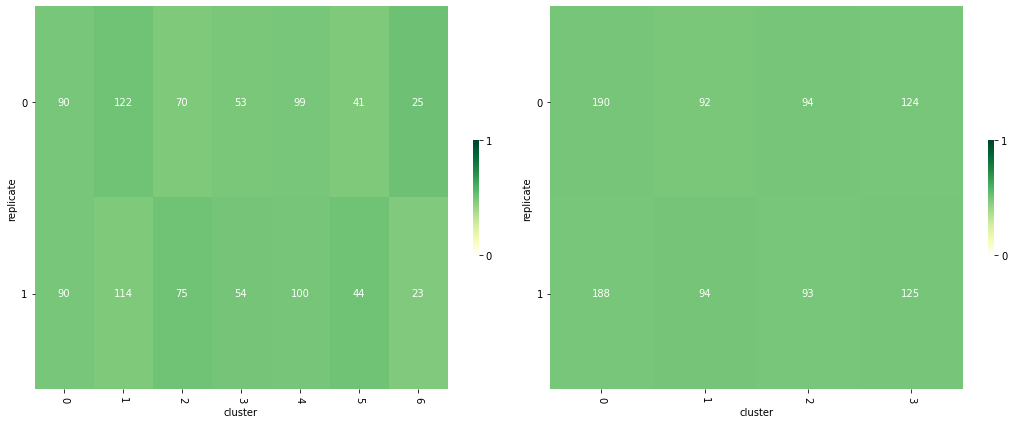

In [71]:
segmentdata = copy.deepcopy(plt.get_cmap('YlGn')._segmentdata)
segmentdata['red'  ][0] = (0., 1., 1.)
segmentdata['green'][0] = (0., 1., 1.)
segmentdata['blue' ][0] = (0., 1., 1.)
cm = LinearSegmentedColormap('', segmentdata=segmentdata, N=256)
kwargs = dict(
    cmap=cm,
)


# spatial_cluster_order = ["12", "15", "7", "12", "14", "9", "7", "3", "2", "13", "8", "11", "0", "5", "6", "1"]

# compare SpiceMix/NMF clusters with the cell types from the original analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
synthetic_cortex_spatial_result.visualizeLabelEnrichment(axes[0], **kwargs)
synthetic_cortex_nmf_result.visualizeLabelEnrichment(axes[1], **kwargs)

plt.tight_layout()

# the distribution of SpiceMix/NMF clusters in different replicates
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
synthetic_cortex_spatial_result.visualizeLabelEnrichment(axes[0], **kwargs, key_x='cluster', key_y='replicate', ignores_x={'NA'})
synthetic_cortex_nmf_result.visualizeLabelEnrichment(axes[1], **kwargs, key_x='cluster', key_y='replicate')

plt.tight_layout()

In [ ]:
segmentdata = copy.deepcopy(plt.get_cmap('Reds')._segmentdata)
segmentdata['red'  ][0] = (0., 1., 1.)
segmentdata['green'][0] = (0., 1., 1.)
segmentdata['blue' ][0] = (0., 1., 1.)
cm = matplotlib.colors.LinearSegmentedColormap('', segmentdata=segmentdata, N=256)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
obj_SpiceMix.visualizeFeatureEnrichment(
    axes[0], cmap=cm, ignores_y=['NA'],
    normalizer_raw=StandardScaler(with_mean=False).fit_transform,
)
obj_NMF     .visualizeFeatureEnrichment(
    axes[1], cmap=cm,
    normalizer_raw=StandardScaler(with_mean=False).fit_transform,
)

In [ ]:
segmentdata = copy.deepcopy(plt.get_cmap('RdBu')._segmentdata)
for key in ['red', 'green', 'blue']:
    segmentdata[key] = [(1.-i, k, j) for (i, j, k) in segmentdata[key][::-1]]
cm = matplotlib.colors.LinearSegmentedColormap('', segmentdata=segmentdata, N=256)
kwargs=dict(
    cmap=cm,
)

# In the first column are the gene IDs, and in the second column are annotations, 
#   which are cell types in this example
gene_list_plot = np.array([
    ('Slc17a7',	'E'), # putative marker of all excitatory neural types
    ('Nov',		'E-L2/3'), # STARmap, Fig. 2J
    ('Cux2',	'E-L2/3 L4'), # STARmap, Fig. 2J
    ('Rorb',	'E-L4 L5'), # STARmap, Fig. 2J
    ('Ctgf',	'E-L6'), # STARmap, Fig. 2J & tasic
    
    ('Gad1',	'I'), # putative marker of all inhibitory neural types
    ('Pvalb',	'I'), # putative marker of PVALB subtype
    ('Sst',		'I'), # putative marker of SST subtype
    ('Vip',		'I'), # putative marker of VIP subtype
    ('Reln',	'I'),
    
    ('Aqp4',	'Astro'), # tasic
    ('Enpp2',	'Oligo'), # STARmap Fig. S6B
    ('Mbp',		'Oligo'), # tasic
    ('Mgp',		'Smc'), # STARmap Fig. S6B
    ('Sema3c',	'Endo'), # STARmap Fig. S6B
])
# Extract gene IDs and prepend string 'expr '
keys_x = [f'expr {_[0]}' for _ in gene_list_plot]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
obj_SpiceMix.visualizeFeatureEnrichment(
    axes[0], keys_x=keys_x, **kwargs, ignores_y=['NA'],
    normalizer_raw=StandardScaler().fit_transform,
    normalizer_avg=lambda x: StandardScaler().fit_transform(x.T).T,
)
obj_NMF     .visualizeFeatureEnrichment(
    axes[1], keys_x=keys_x, **kwargs,
    normalizer_raw=StandardScaler().fit_transform,
    normalizer_avg=lambda x: StandardScaler().fit_transform(x.T).T,
)
for ax in axes:
    ax.set_xticklabels(' - '.join(_) for _ in gene_list_plot)

In [ ]:
# plot the empirical affinity between cell types
segmentdata = copy.deepcopy(plt.get_cmap('RdBu')._segmentdata)
for channel in ['red', 'green', 'blue']:
    segmentdata[channel] = [(1.-i, k, j) for (i, j, k) in segmentdata[channel][::-1]]
cm = matplotlib.colors.LinearSegmentedColormap('', segmentdata=segmentdata, N=256)
kwargs = dict(
    cmap=cm,
)
fig, axes = plt.subplots(1, 2, figsize=(13, 6))
obj_SpiceMix.plotAffinityClusters(axes[0], ignores={'NA'}, **kwargs)
obj_NMF     .plotAffinityClusters(axes[1], ignores={'NA'}, **kwargs)

In [ ]:
segmentdata = copy.deepcopy(plt.get_cmap('bwr')._segmentdata)
for key in ['red', 'green', 'blue']:
    segmentdata[key] = [(1.-i, k, j) for (i, j, k) in segmentdata[key][::-1]]
cm = matplotlib.colors.LinearSegmentedColormap('', segmentdata=segmentdata, N=256)
kwargs = dict(
    cmap=cm,
)

fig, axes = plt.subplots(1, 2, figsize=(13, 6))
obj_SpiceMix.plotAffinityMetagenes(axes[0], iteration=-1, **kwargs)

Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_extreme_lambda_K_15_initialization_seed_0.hdf5


OSError: Unable to open file (unable to open file: name = '../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_extreme_lambda_K_15_initialization_seed_0.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

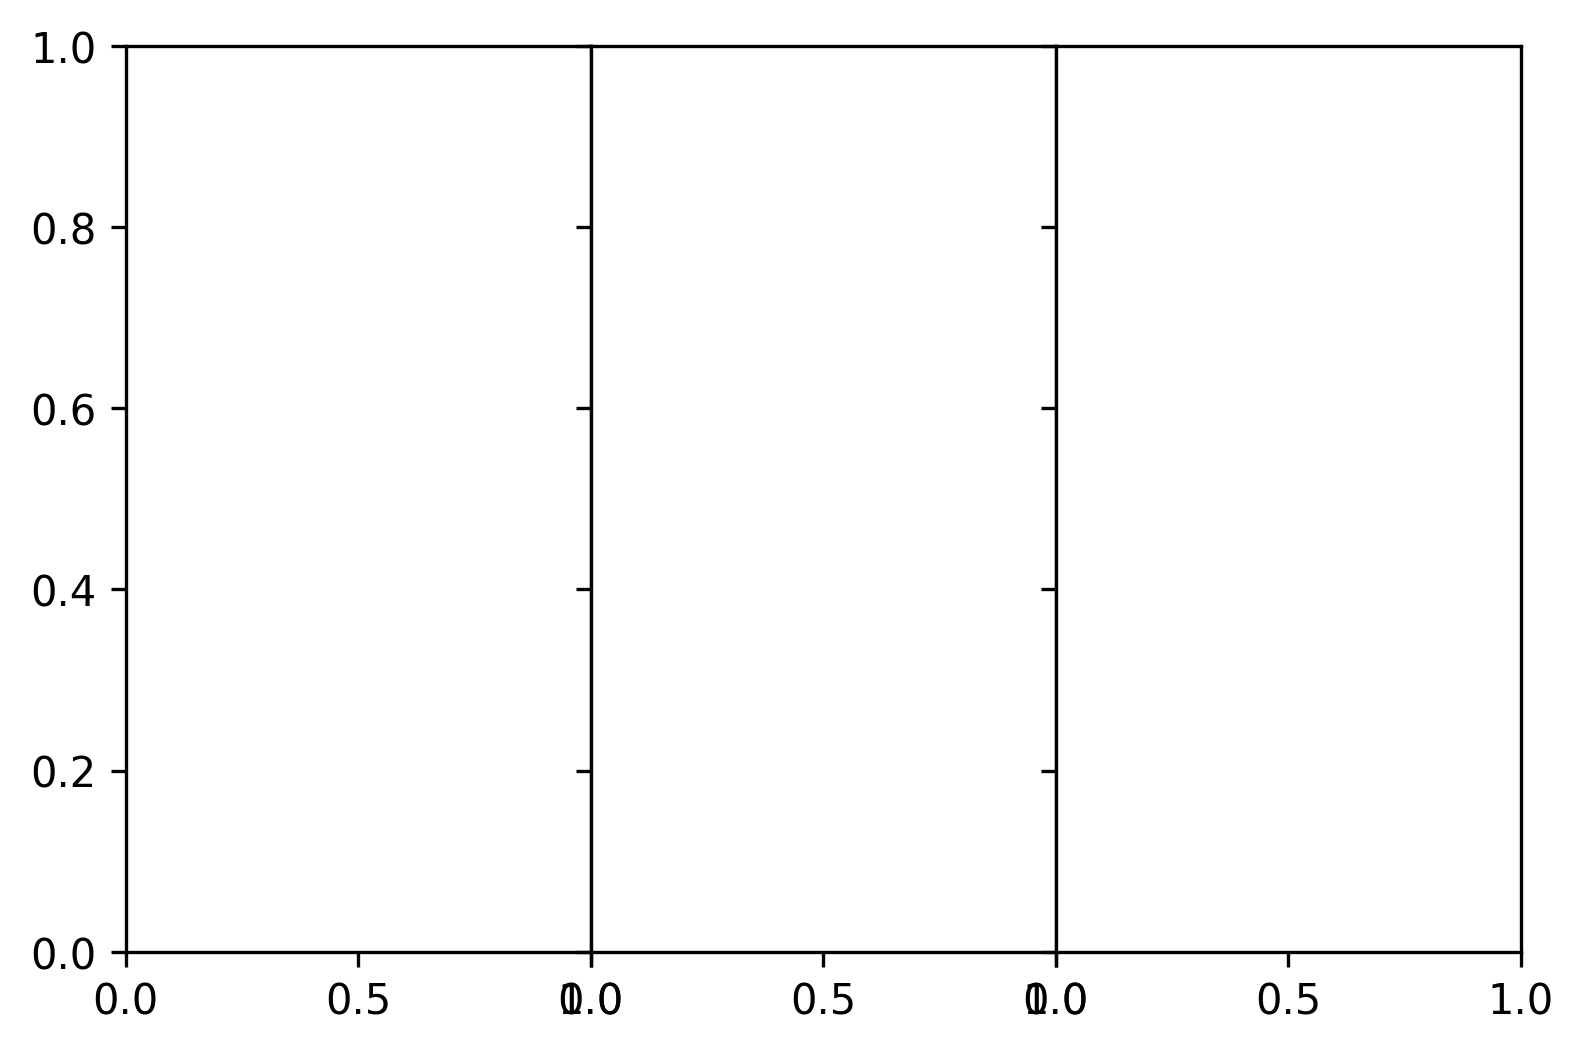

In [13]:
boxplot_fig, boxplot_axes = plt.subplots(ncols=3, sharey=True)

# boxplot_axes[-1].set_ylabel('ARI score')
boxplot_fig.subplots_adjust(wspace=0, hspace=0)

boxplot_axes[0].set_ylim(0, 1)

def set_box_color(boxplot, color, use_hatch=False):
    plt.setp(boxplot['boxes'], color="black")
    plt.setp(boxplot['boxes'], facecolor=color)
    plt.setp(boxplot['medians'], color="black")
    if use_hatch:
        plt.setp(boxplot['boxes'], hatch=r"/")
    
for (index, condition), boxplot_ax in zip(enumerate(("low_variance_low_covariance", "medium_variance_low_covariance", "high_variance_low_covariance")), boxplot_axes):
    spatial_ch_ari_scores = []
    nmf_ch_ari_scores = []
    spatial_silhouette_ari_scores = []
    nmf_silhouette_ari_scores = []
    optimal_nmf_ari_scores = []
    for random_seed in range(0, 10):
        synthetic_cortex_spatial_result = SpiceMixResult(
            path2dataset=f'../../data/synthetic_metagene_free_cortex/500_cells_100_genes_{condition}_random_seed_0',
            result_filename=f"../../data/synthetic_metagene_free_cortex/500_cells_100_genes_{condition}_random_seed_0/results_with_spatial_extreme_lambda_K_15_initialization_seed_{random_seed}.hdf5",
            neighbor_suffix="",
        )

        synthetic_cortex_nmf_result = SpiceMixResult(
            path2dataset=f'../../data/synthetic_metagene_free_cortex/500_cells_100_genes_{condition}_random_seed_{random_seed}',
            result_filename=f"../../data/synthetic_metagene_free_cortex/500_cells_100_genes_{condition}_random_seed_{random_seed}/results_no_spatial_K_15.hdf5",
            neighbor_suffix="",
        )

        synthetic_cortex_spatial_result.load_latent_states(iiter=-1)
        synthetic_cortex_nmf_result.load_latent_states(iiter=-1)

        fig, ax = plt.subplots()
        synthetic_cortex_spatial_result.plot_ari_versus_clusters(ax, K_range=np.arange(2, 41))
        optimal_num_clusters = synthetic_cortex_nmf_result.plot_ari_versus_clusters(ax, K_range=np.arange(2, 41))

        synthetic_cortex_nmf_result.determine_clusters(optimal_num_clusters)
        optimal_nmf_ari_score = synthetic_cortex_nmf_result.calculate_ari_score()
        optimal_nmf_ari_scores.append(optimal_nmf_ari_score)

        synthetic_cortex_spatial_result.determine_optimal_clusters(ax, K_range=np.arange(2, 41))
        synthetic_cortex_nmf_result.determine_optimal_clusters(ax, K_range=np.arange(2, 41))

        spatial_ch_ari_score = synthetic_cortex_spatial_result.calculate_ari_score()
        spatial_ch_ari_scores.append(spatial_ch_ari_score)
        nmf_ch_ari_score = synthetic_cortex_nmf_result.calculate_ari_score()
        nmf_ch_ari_scores.append(nmf_ch_ari_score)
        
#         synthetic_cortex_spatial_result.determine_optimal_clusters(ax, K_range=np.arange(2, 41), metric="silhouette")
#         synthetic_cortex_nmf_result.determine_optimal_clusters(ax, K_range=np.arange(2, 41), metric="silhouette")

#         spatial_silhouette_ari_score = synthetic_cortex_spatial_result.calculate_ari_score()
#         spatial_silhouette_ari_scores.append(spatial_silhouette_ari_score)
#         nmf_silhouette_ari_score = synthetic_cortex_nmf_result.calculate_ari_score()
#         nmf_silhouette_ari_scores.append(nmf_silhouette_ari_score)      
        
        ax.set_visible(False)

    # boxplot_ax.boxplot([spatial_ch_ari_scores, spatial_silhouette_ari_scores, optimal_nmf_ari_scores, nmf_ch_ari_scores, nmf_silhouette_ari_scores], positions=list(range(index * 5, (index + 1) * 5)), vert=True)
    spatial_boxplot = boxplot_ax.boxplot(spatial_ch_ari_scores, patch_artist=True, vert=True, widths=[0.975], positions=[0.5])
    set_box_color(spatial_boxplot, "#3474a4")
    
    optimal_nmf_boxplot = boxplot_ax.boxplot(optimal_nmf_ari_scores, patch_artist=True, vert=True, widths=[0.975], positions=[1.5])
    set_box_color(optimal_nmf_boxplot, "#e28743", use_hatch=True)
    
    nmf_boxplot = boxplot_ax.boxplot(nmf_ch_ari_scores, patch_artist=True, vert=True, widths=[0.975], positions=[2.5])
    set_box_color(nmf_boxplot, "#e28743")
    
    boxplot_ax.set_xticks([1.5])
    boxplot_ax.set_xticklabels([" ".join(condition.split("_")[:2])])
    boxplot_ax.set_xlim(-0.5, 3.5)
    
    for tic in boxplot_ax.yaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)


for boxplot_ax in boxplot_axes[1:-1]:
    boxplot_ax.spines["left"].set_visible(False)
    boxplot_ax.spines["right"].set_visible(False)
    
boxplot_axes[0].spines["right"].set_visible(False)
boxplot_axes[-1].spines["left"].set_visible(False)

plt.show()

Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_high_variance_low_covariance_random_seed_0/results_with_spatial_extreme_lambda_K_15_initialization_seed_0.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


optimal K = 7
#clusters = 7, #-1 = 0
optimal K = 3
#clusters = 3, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_high_variance_low_covariance_random_seed_2/results_with_spatial_extreme_lambda_K_15_initialization_seed_0.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


[['Gene' '0']
 ['Gene' '1']
 ['Gene' '2']
 ['Gene' '3']
 ['Gene' '4']
 ['Gene' '5']
 ['Gene' '6']
 ['Gene' '7']
 ['Gene' '8']
 ['Gene' '9']
 ['Gene' '10']
 ['Gene' '11']
 ['Gene' '12']
 ['Gene' '13']
 ['Gene' '14']
 ['Gene' '15']
 ['Gene' '16']
 ['Gene' '17']
 ['Gene' '18']
 ['Gene' '19']
 ['Gene' '20']
 ['Gene' '21']
 ['Gene' '22']
 ['Gene' '23']
 ['Gene' '24']
 ['Gene' '25']
 ['Gene' '26']
 ['Gene' '27']
 ['Gene' '28']
 ['Gene' '29']
 ['Gene' '30']
 ['Gene' '31']
 ['Gene' '32']
 ['Gene' '33']
 ['Gene' '34']
 ['Gene' '35']
 ['Gene' '36']
 ['Gene' '37']
 ['Gene' '38']
 ['Gene' '39']
 ['Gene' '40']
 ['Gene' '41']
 ['Gene' '42']
 ['Gene' '43']
 ['Gene' '44']
 ['Gene' '45']
 ['Gene' '46']
 ['Gene' '47']
 ['Gene' '48']
 ['Gene' '49']
 ['Gene' '50']
 ['Gene' '51']
 ['Gene' '52']
 ['Gene' '53']
 ['Gene' '54']
 ['Gene' '55']
 ['Gene' '56']
 ['Gene' '57']
 ['Gene' '58']
 ['Gene' '59']
 ['Gene' '60']
 ['Gene' '61']
 ['Gene' '62']
 ['Gene' '63']
 ['Gene' '64']
 ['Gene' '65']
 ['Gene' '66']
 ['Ge

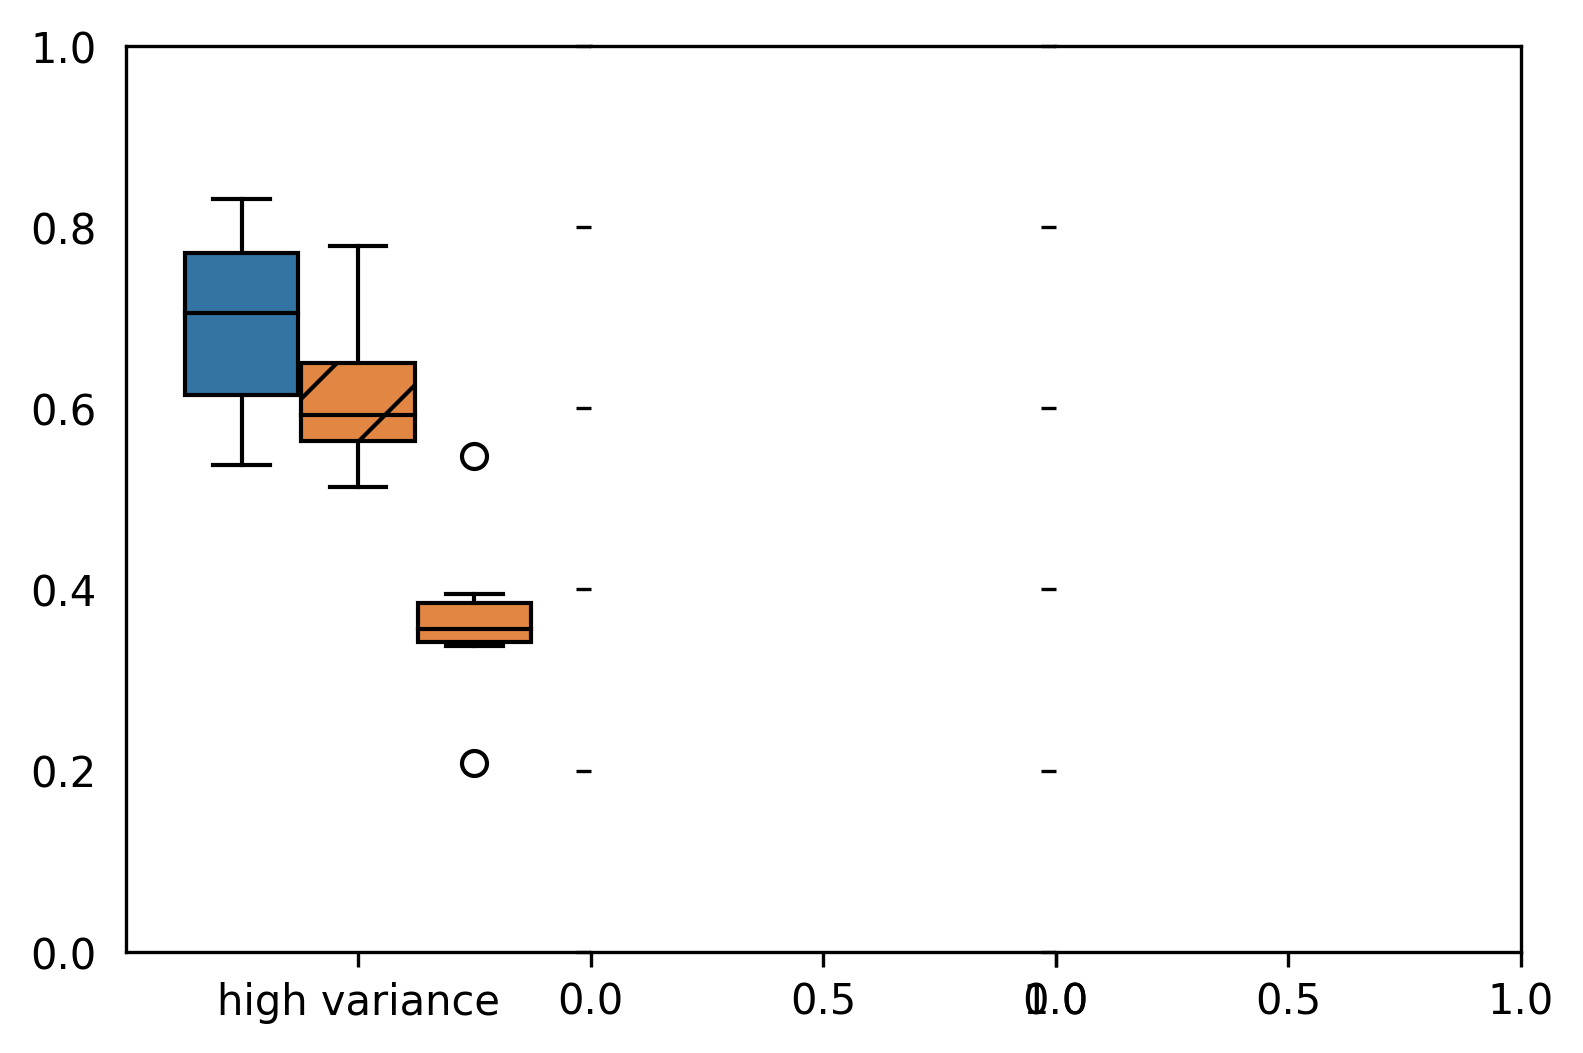

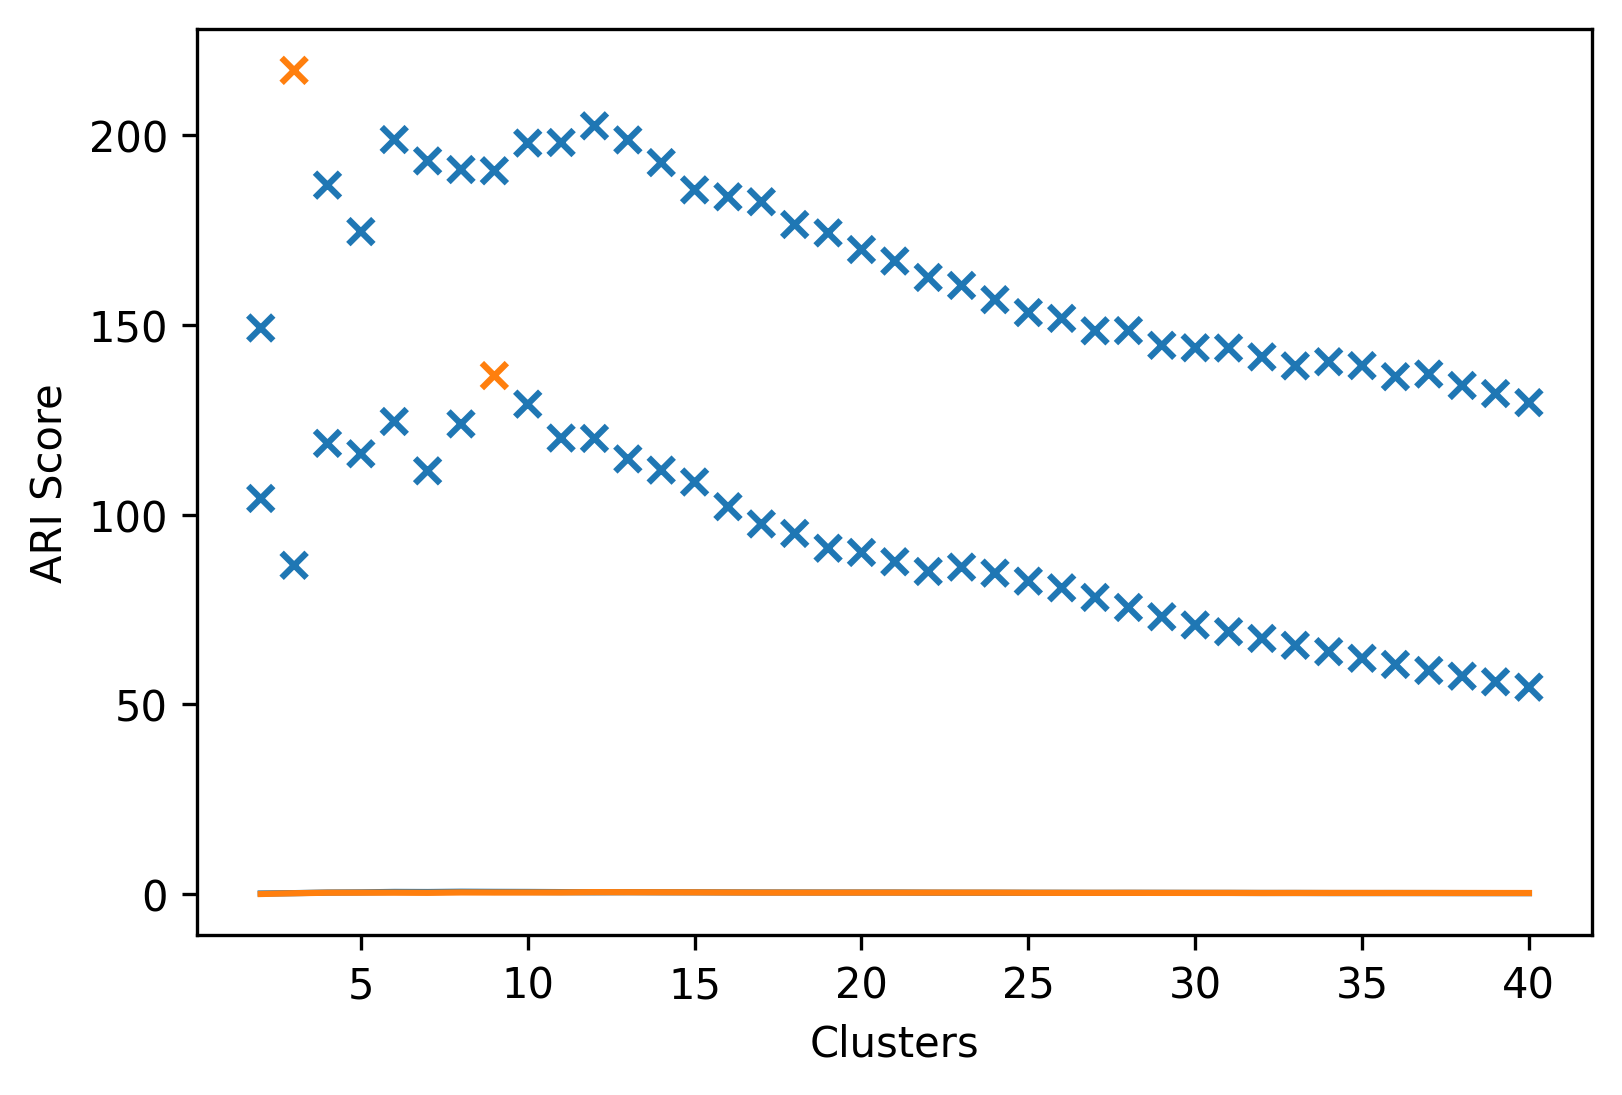

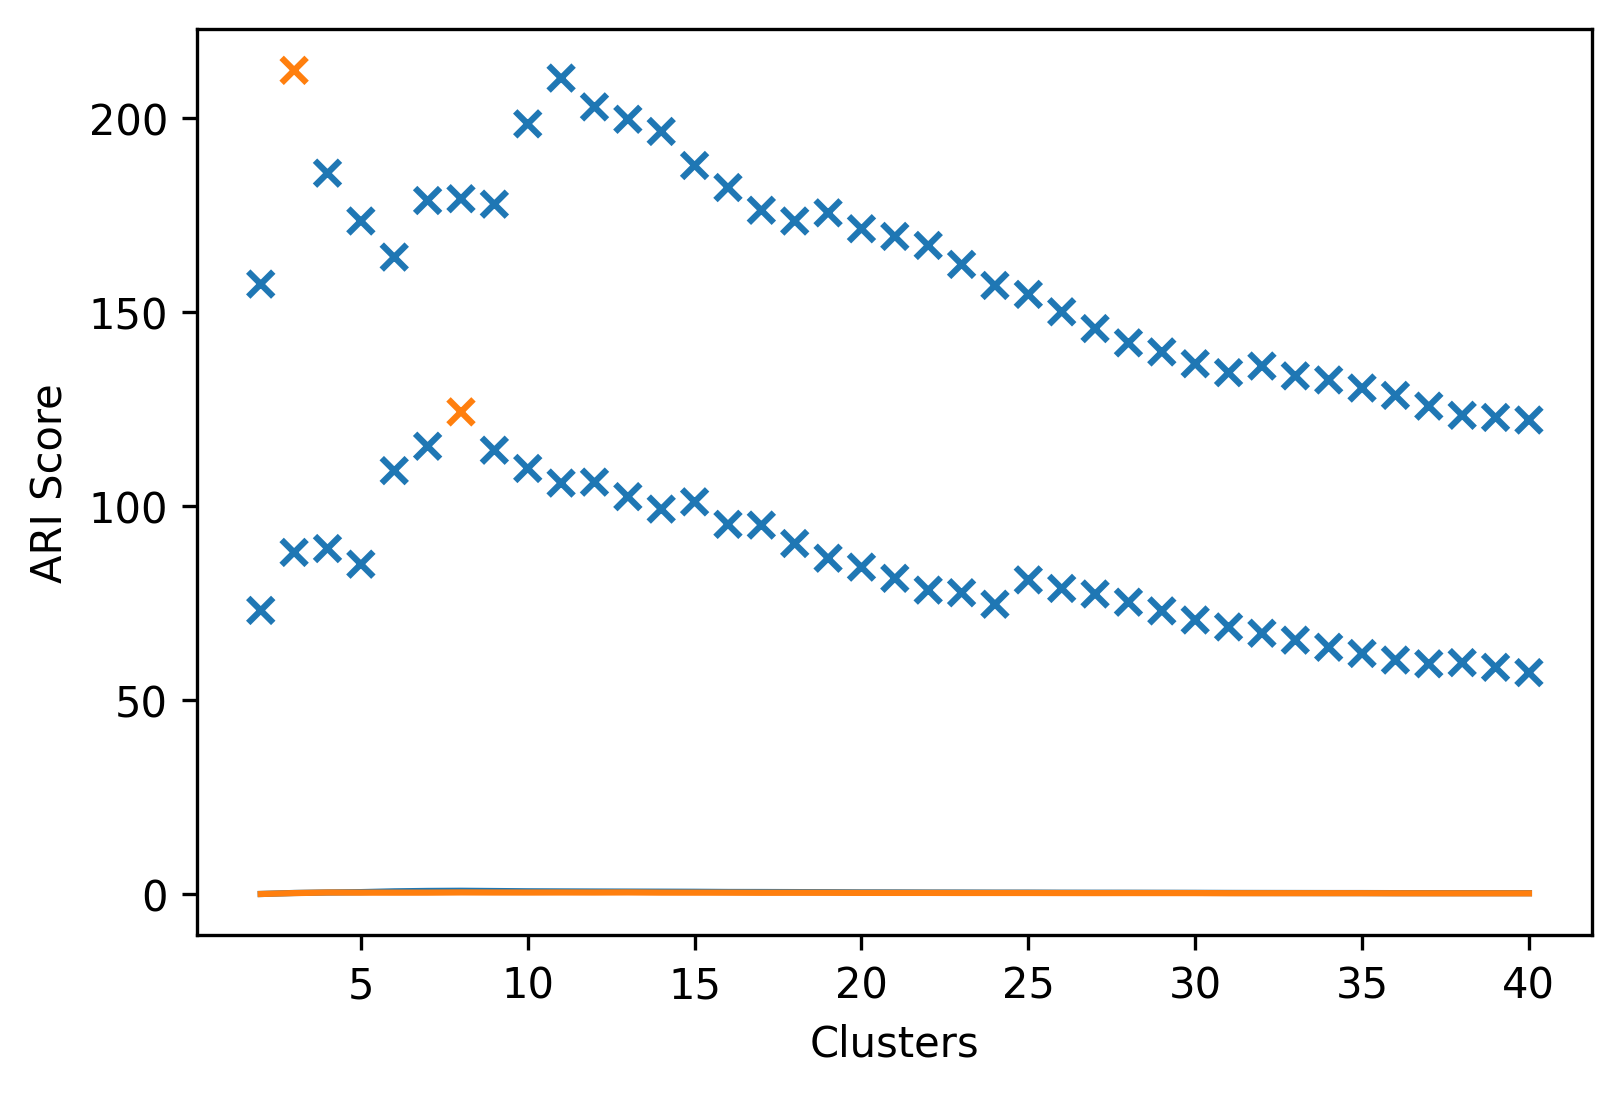

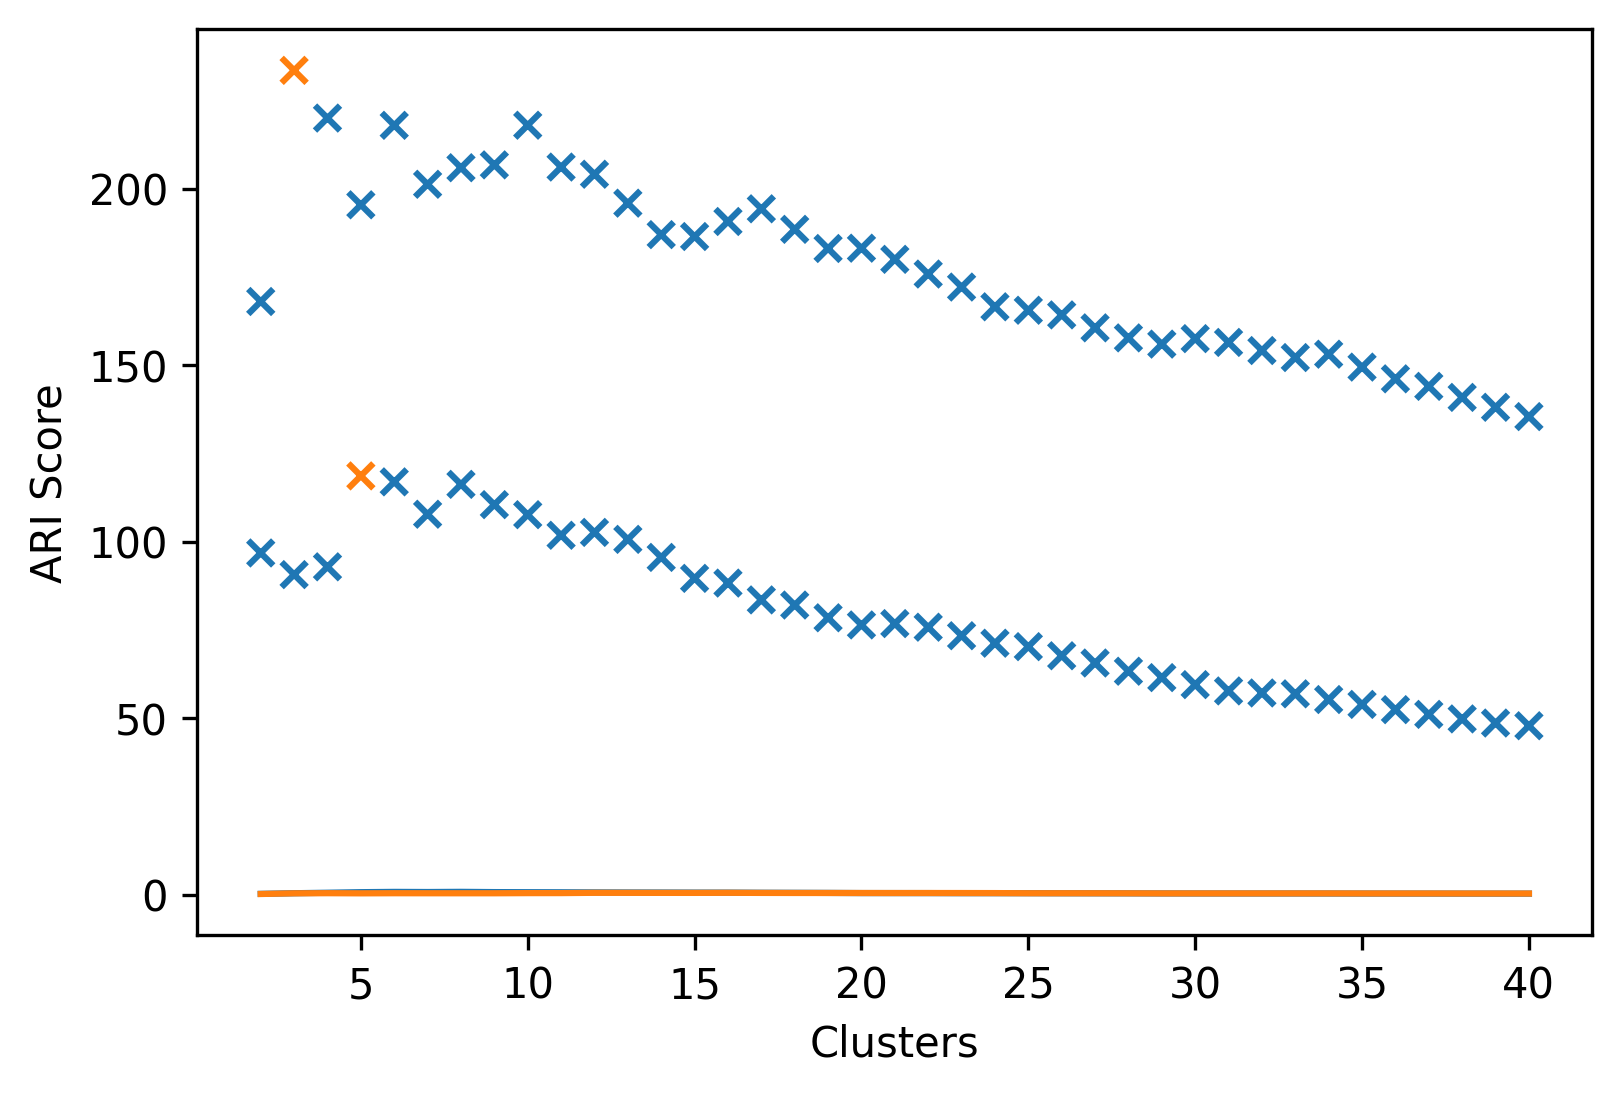

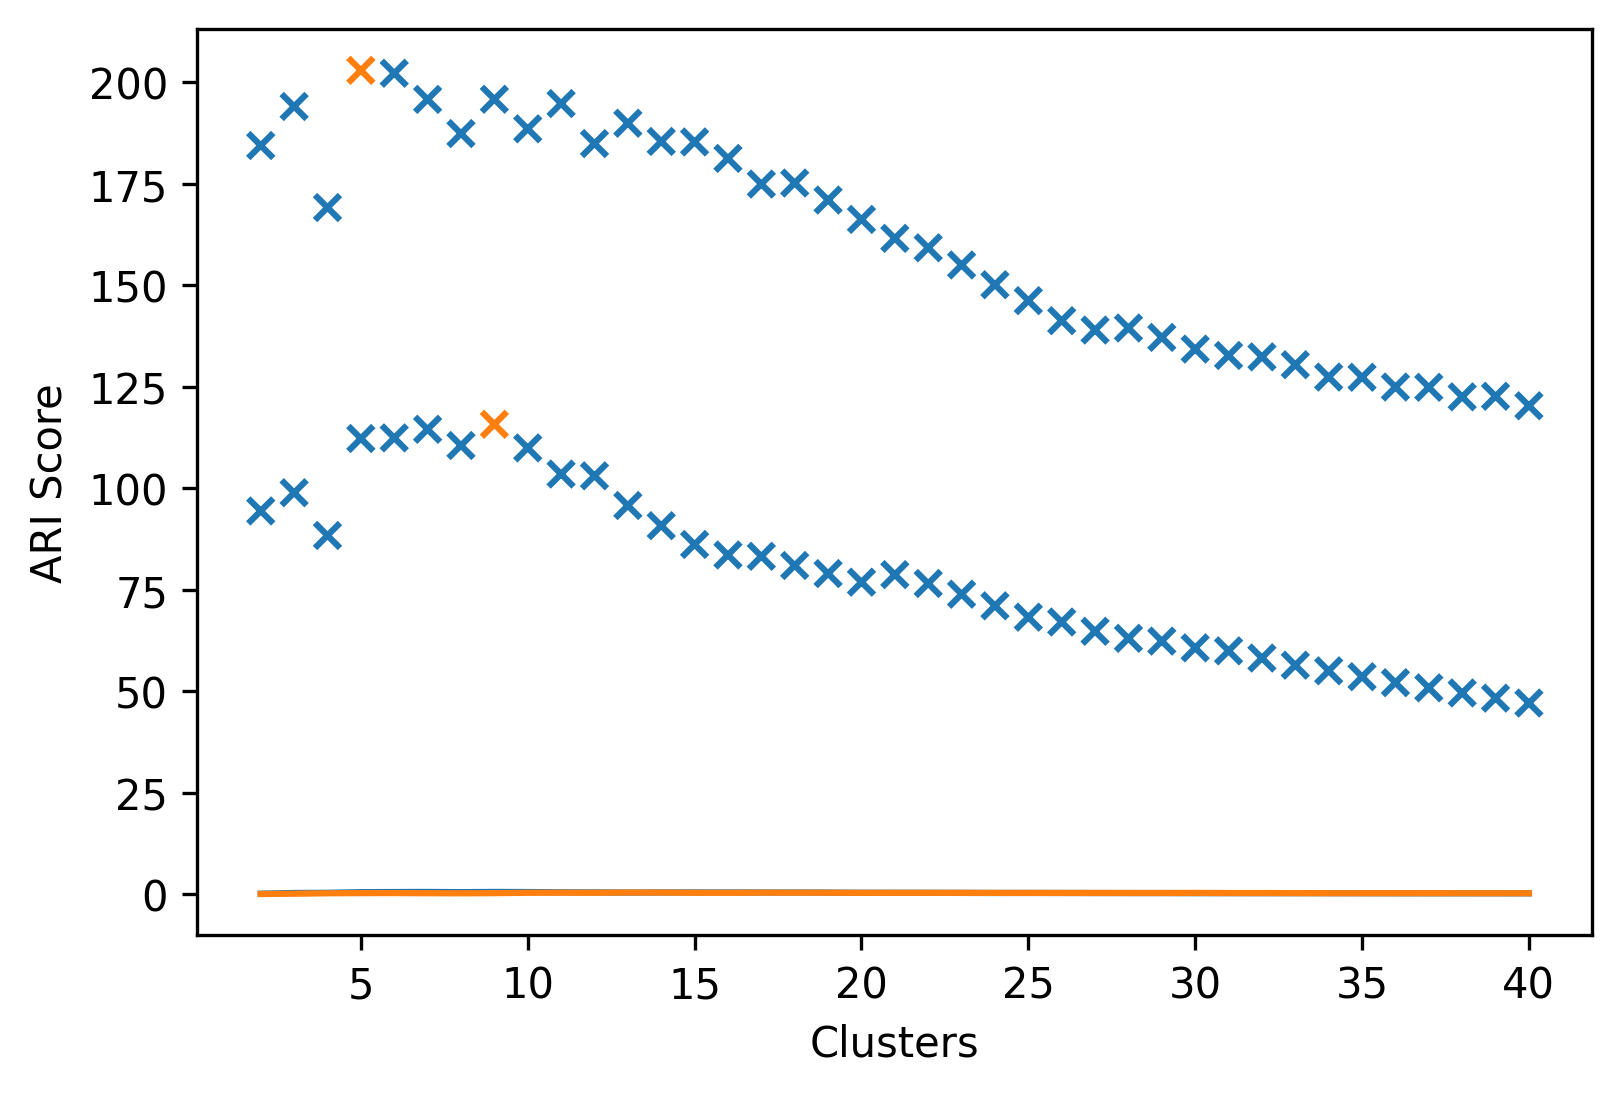

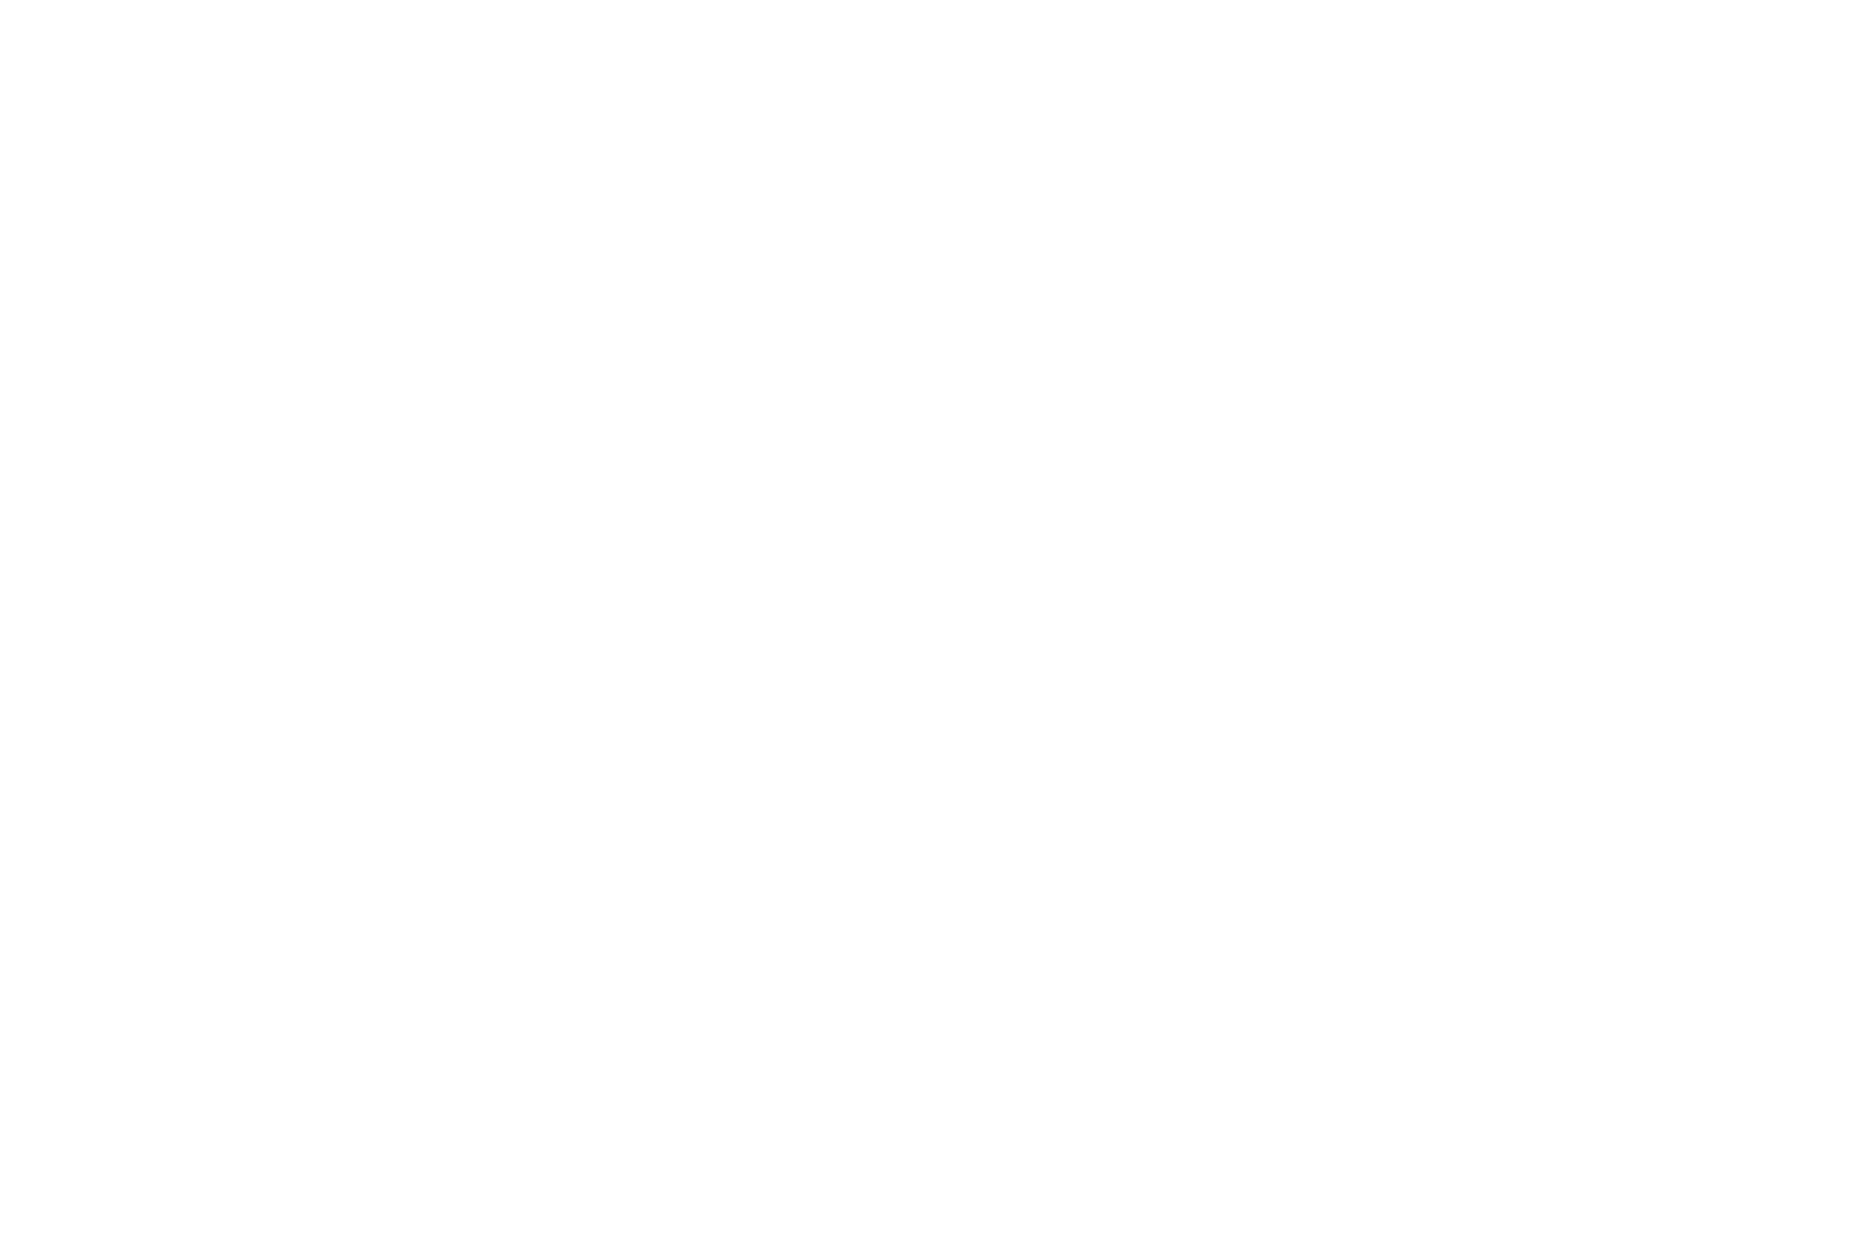

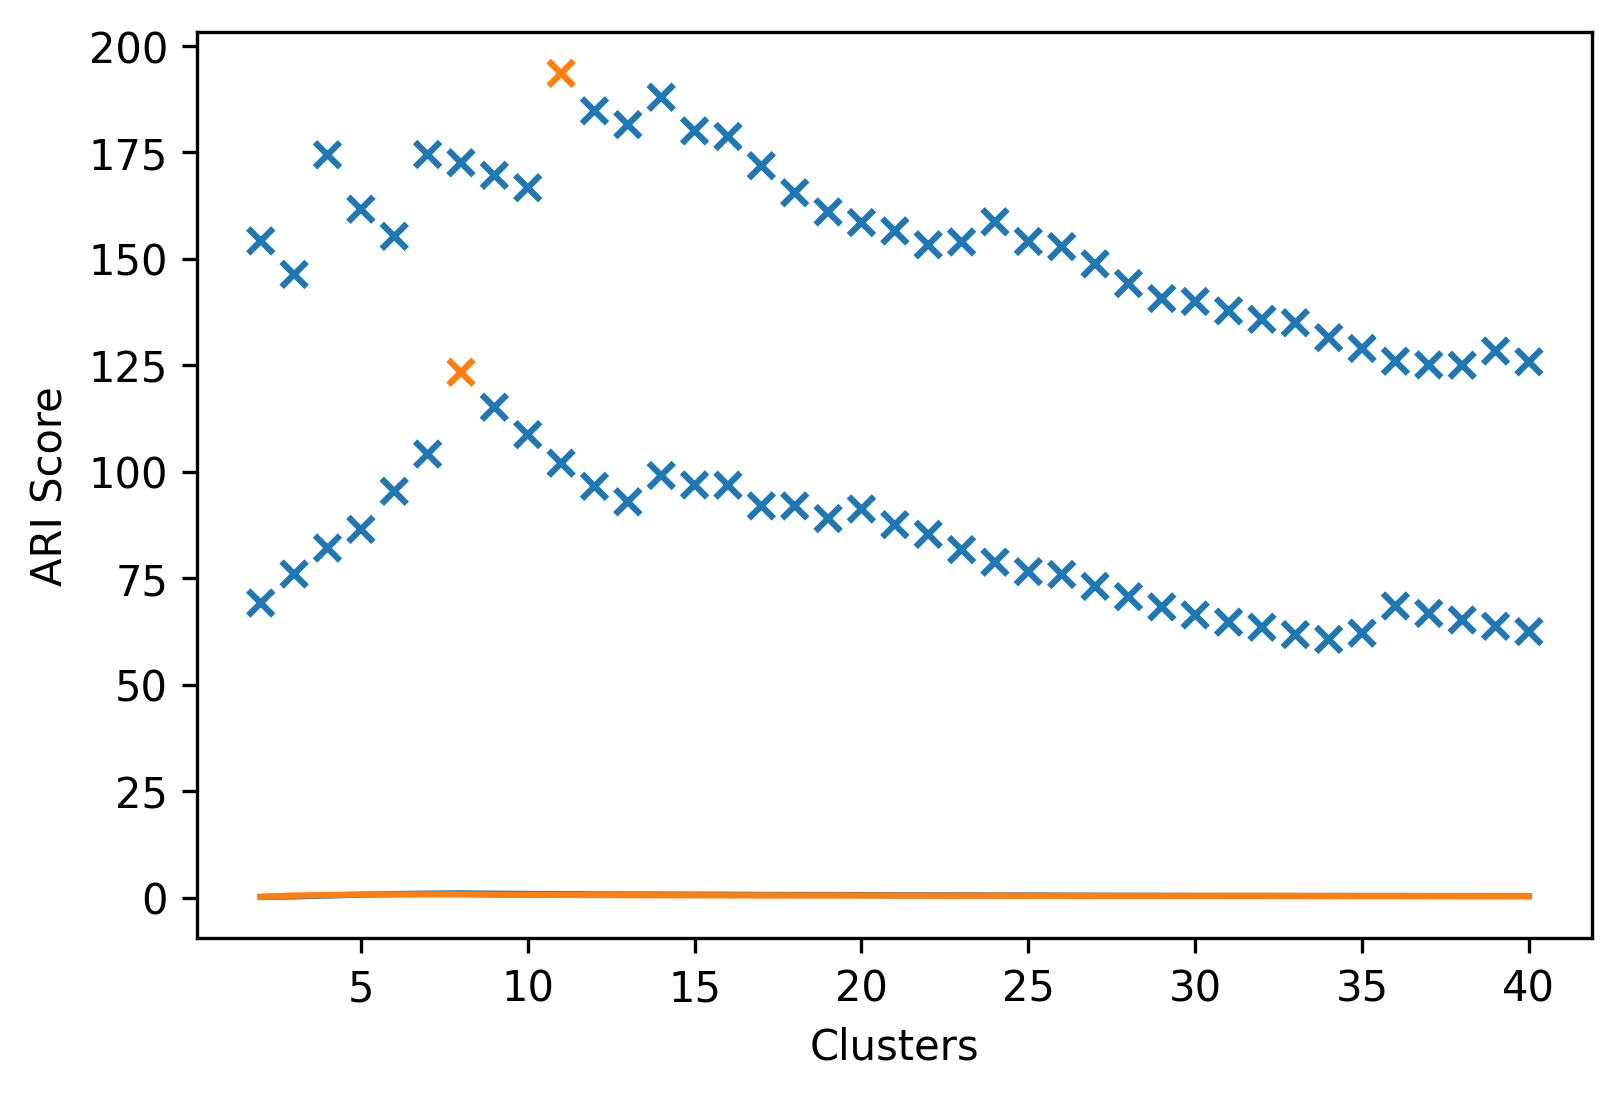

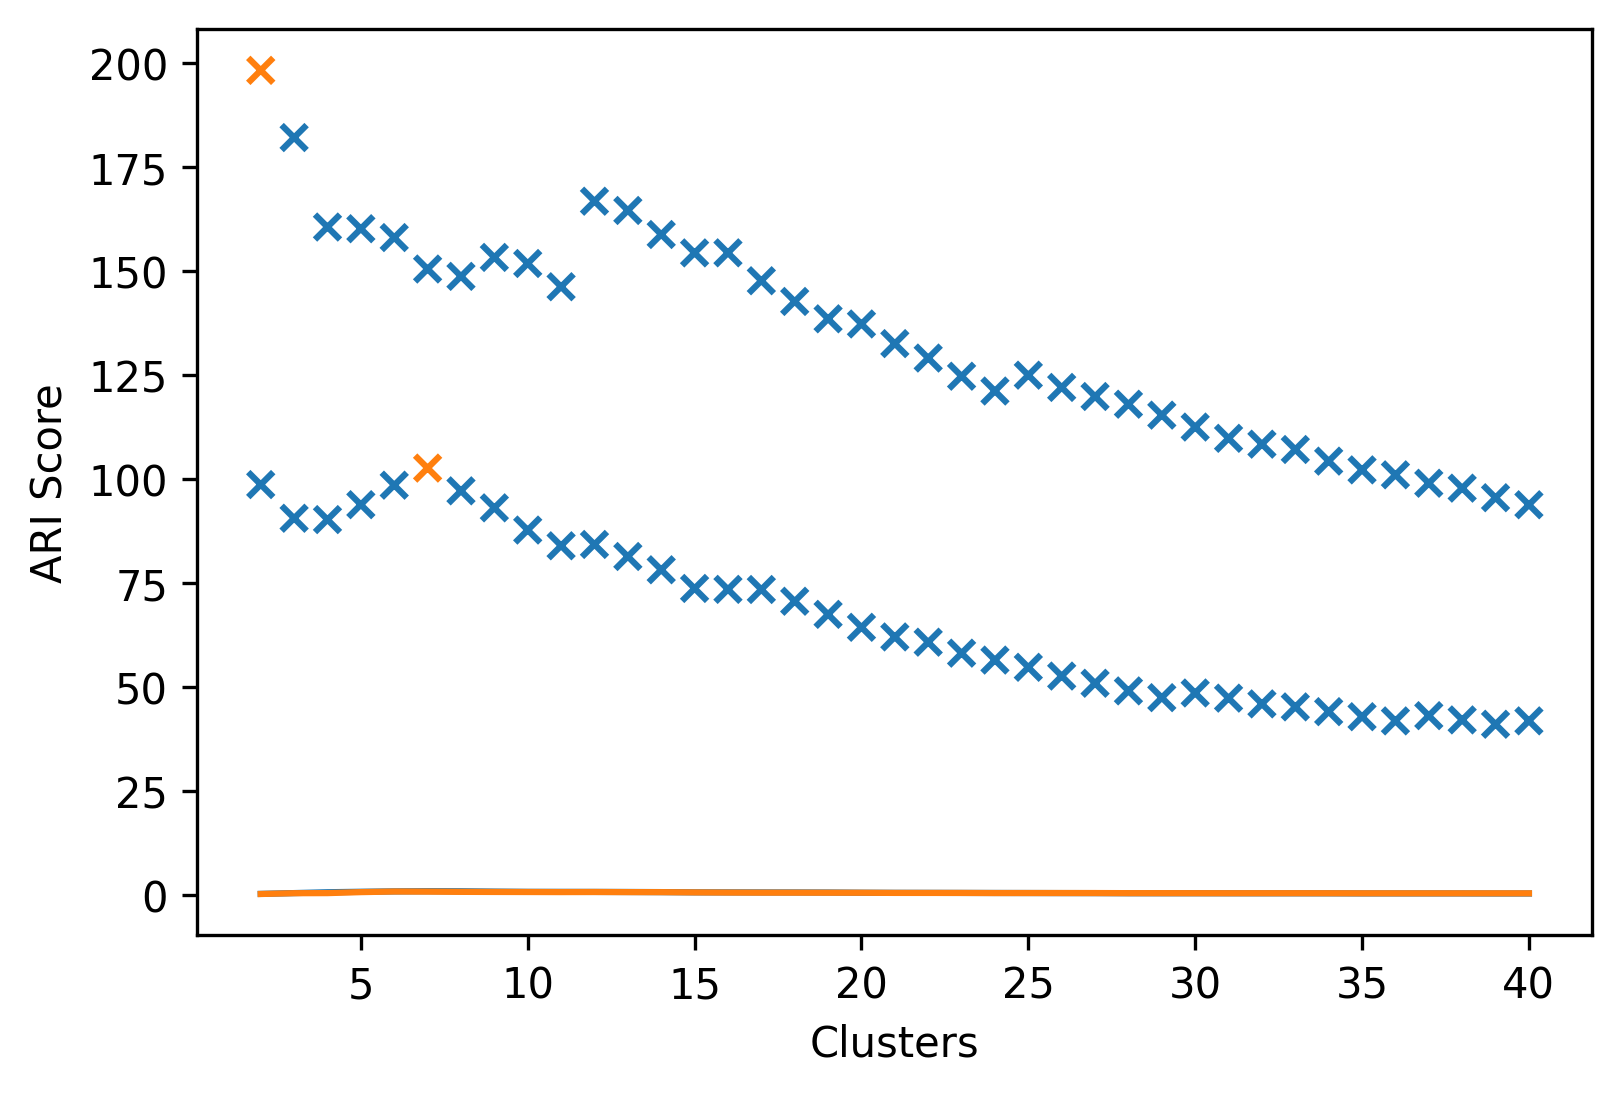

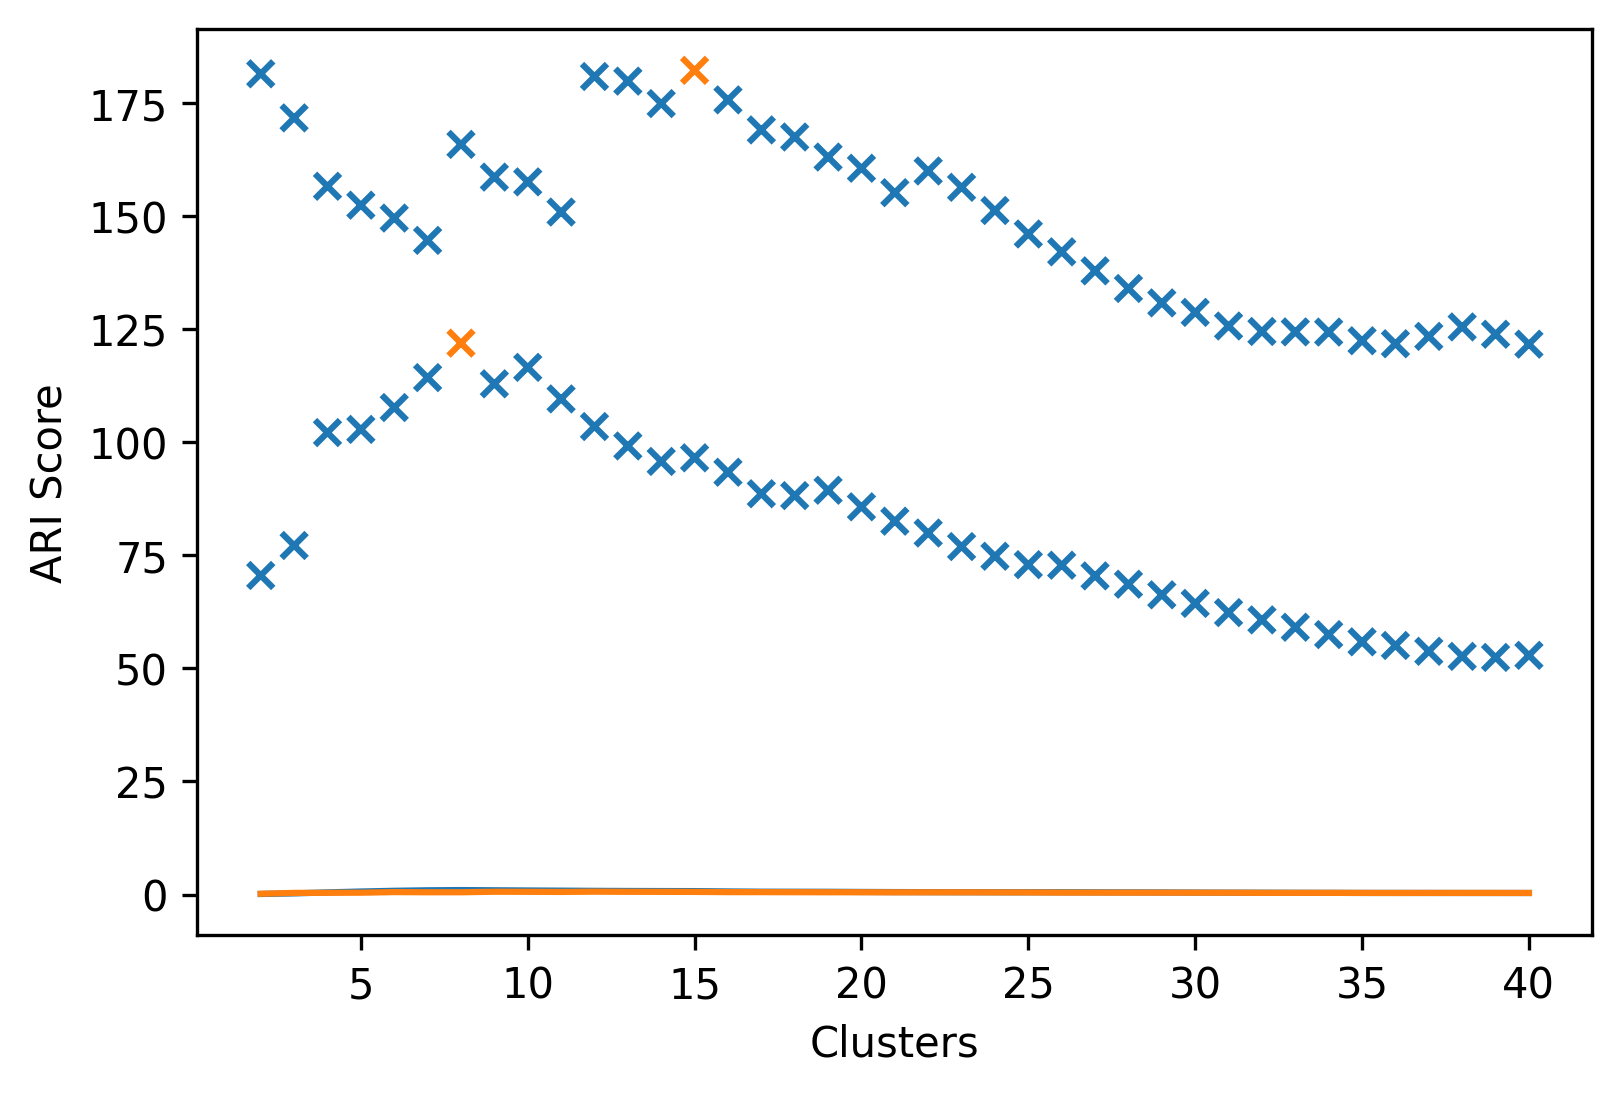

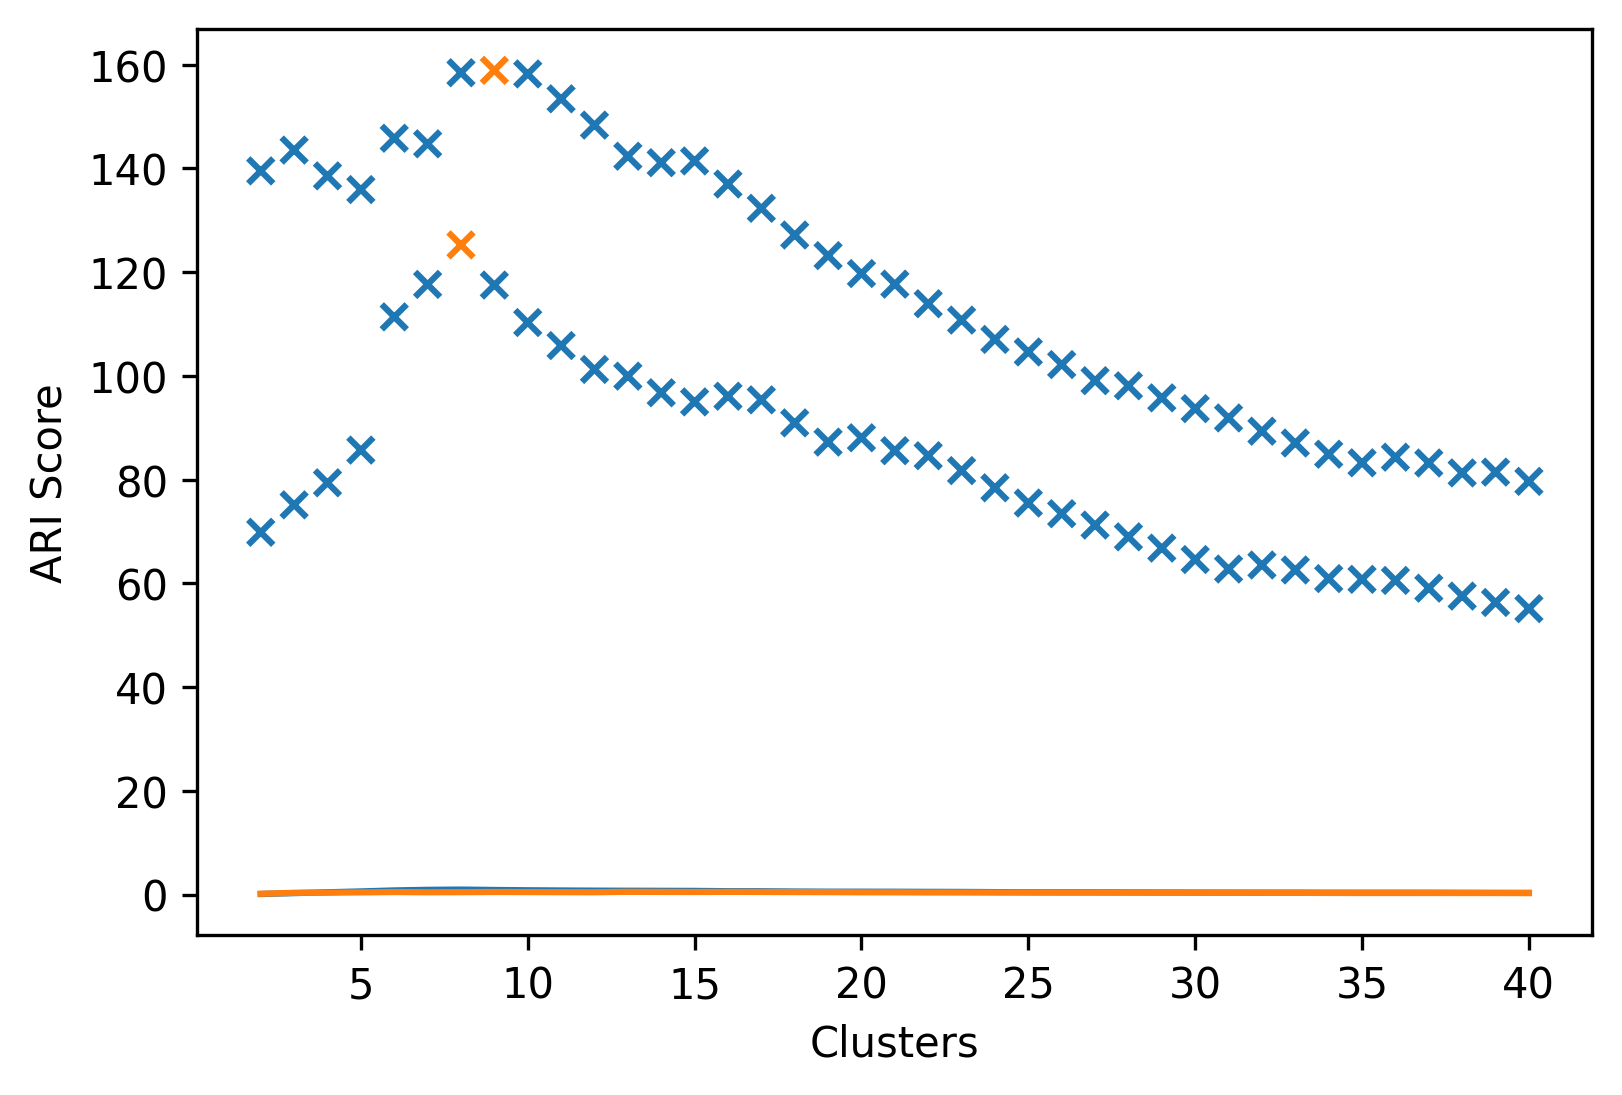

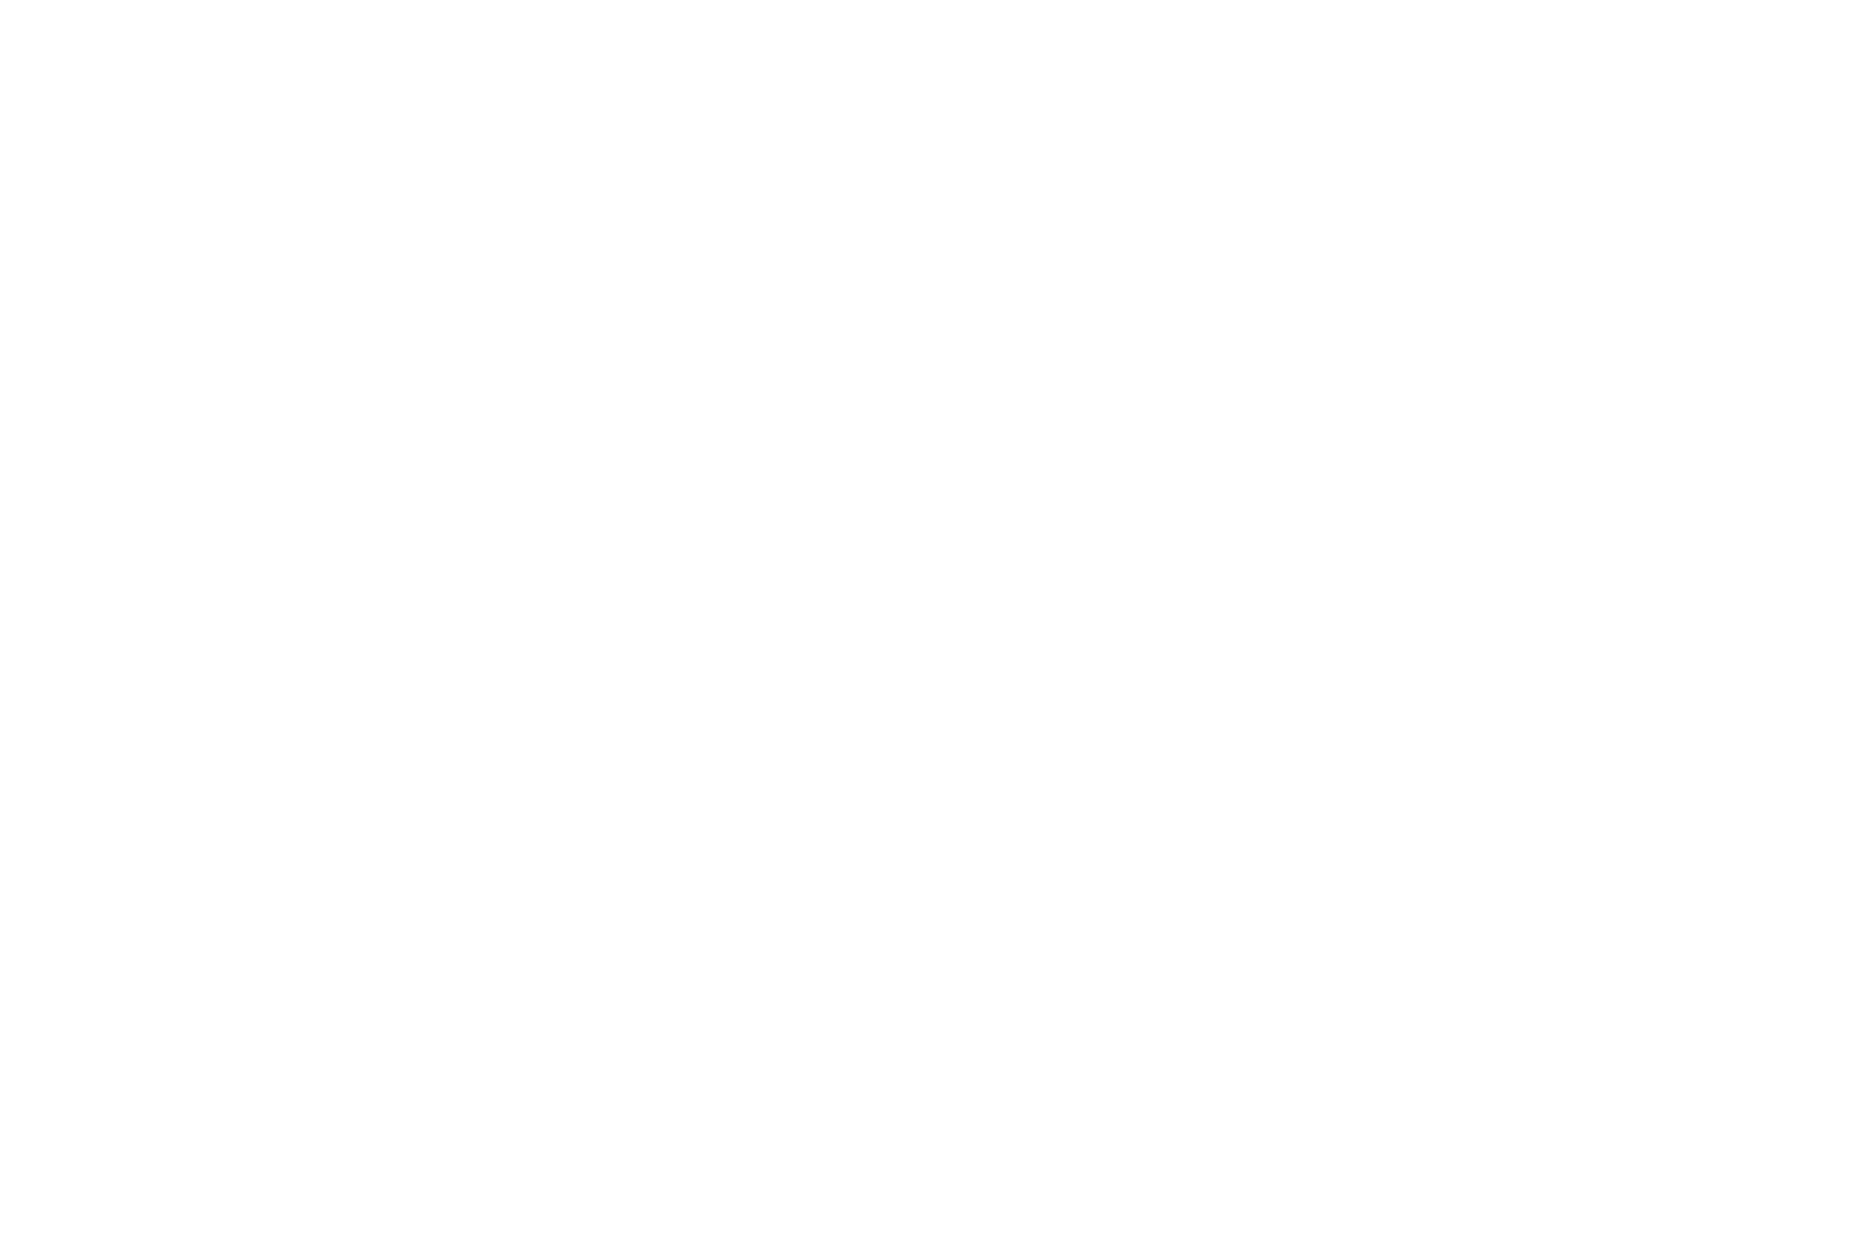

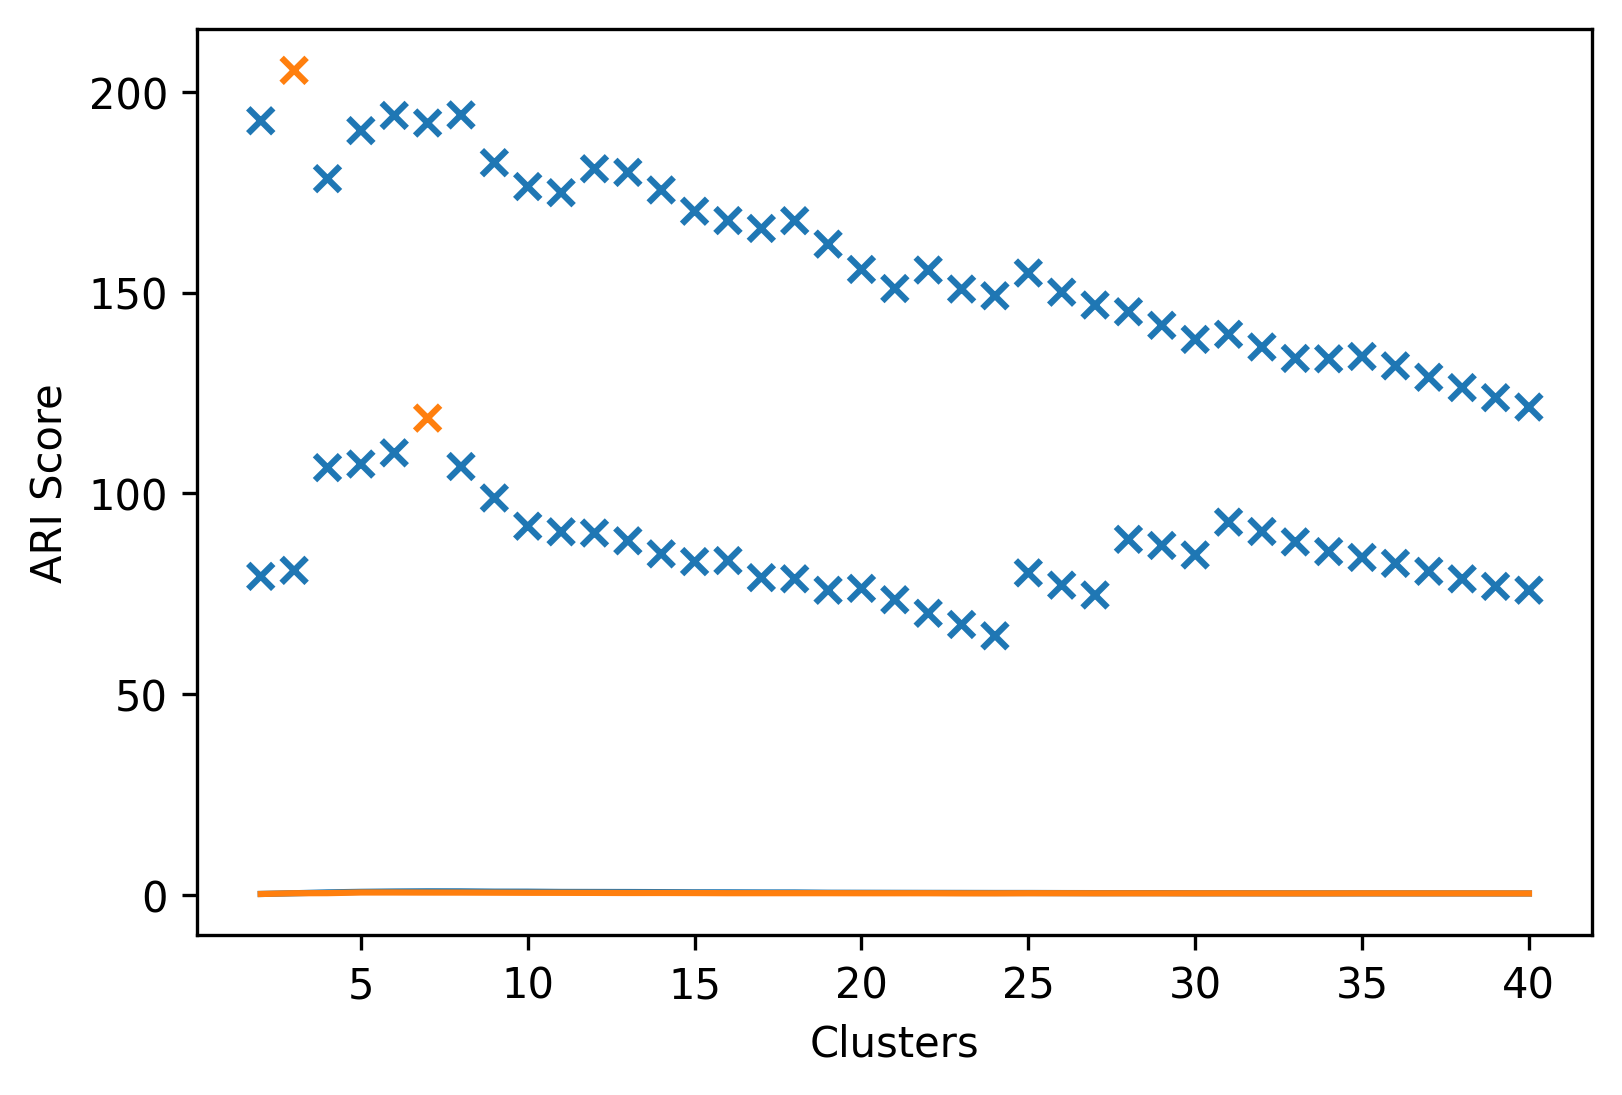

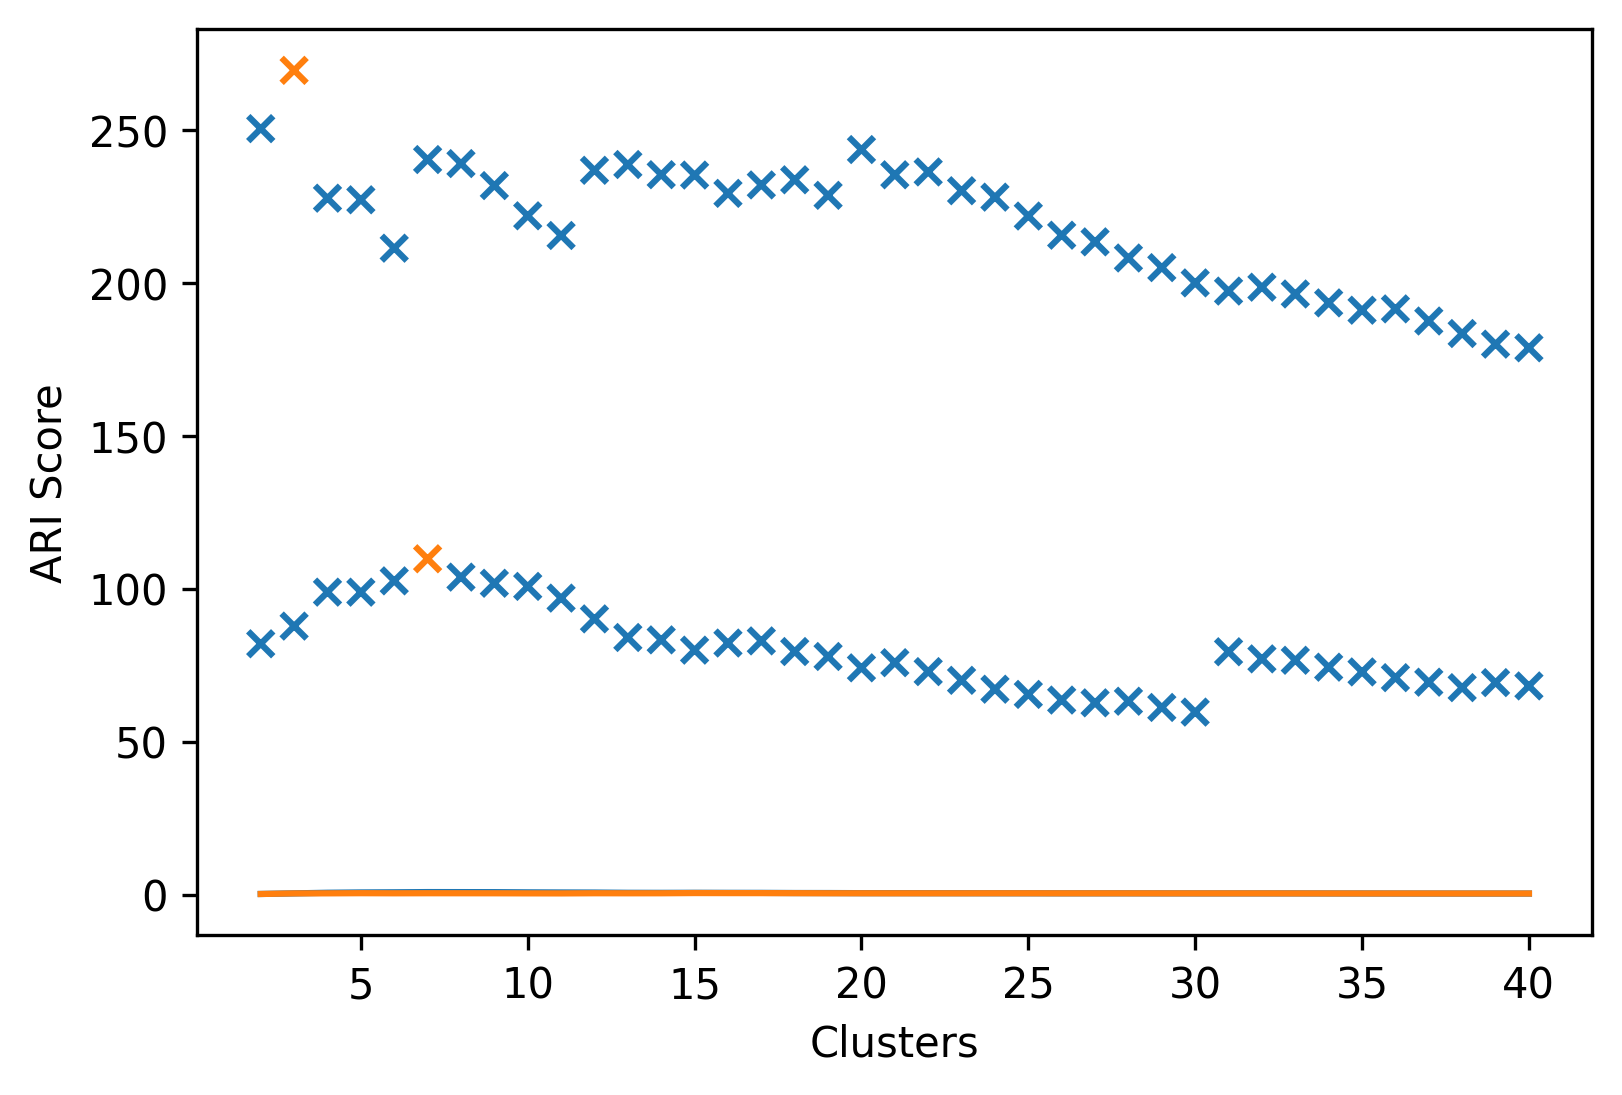

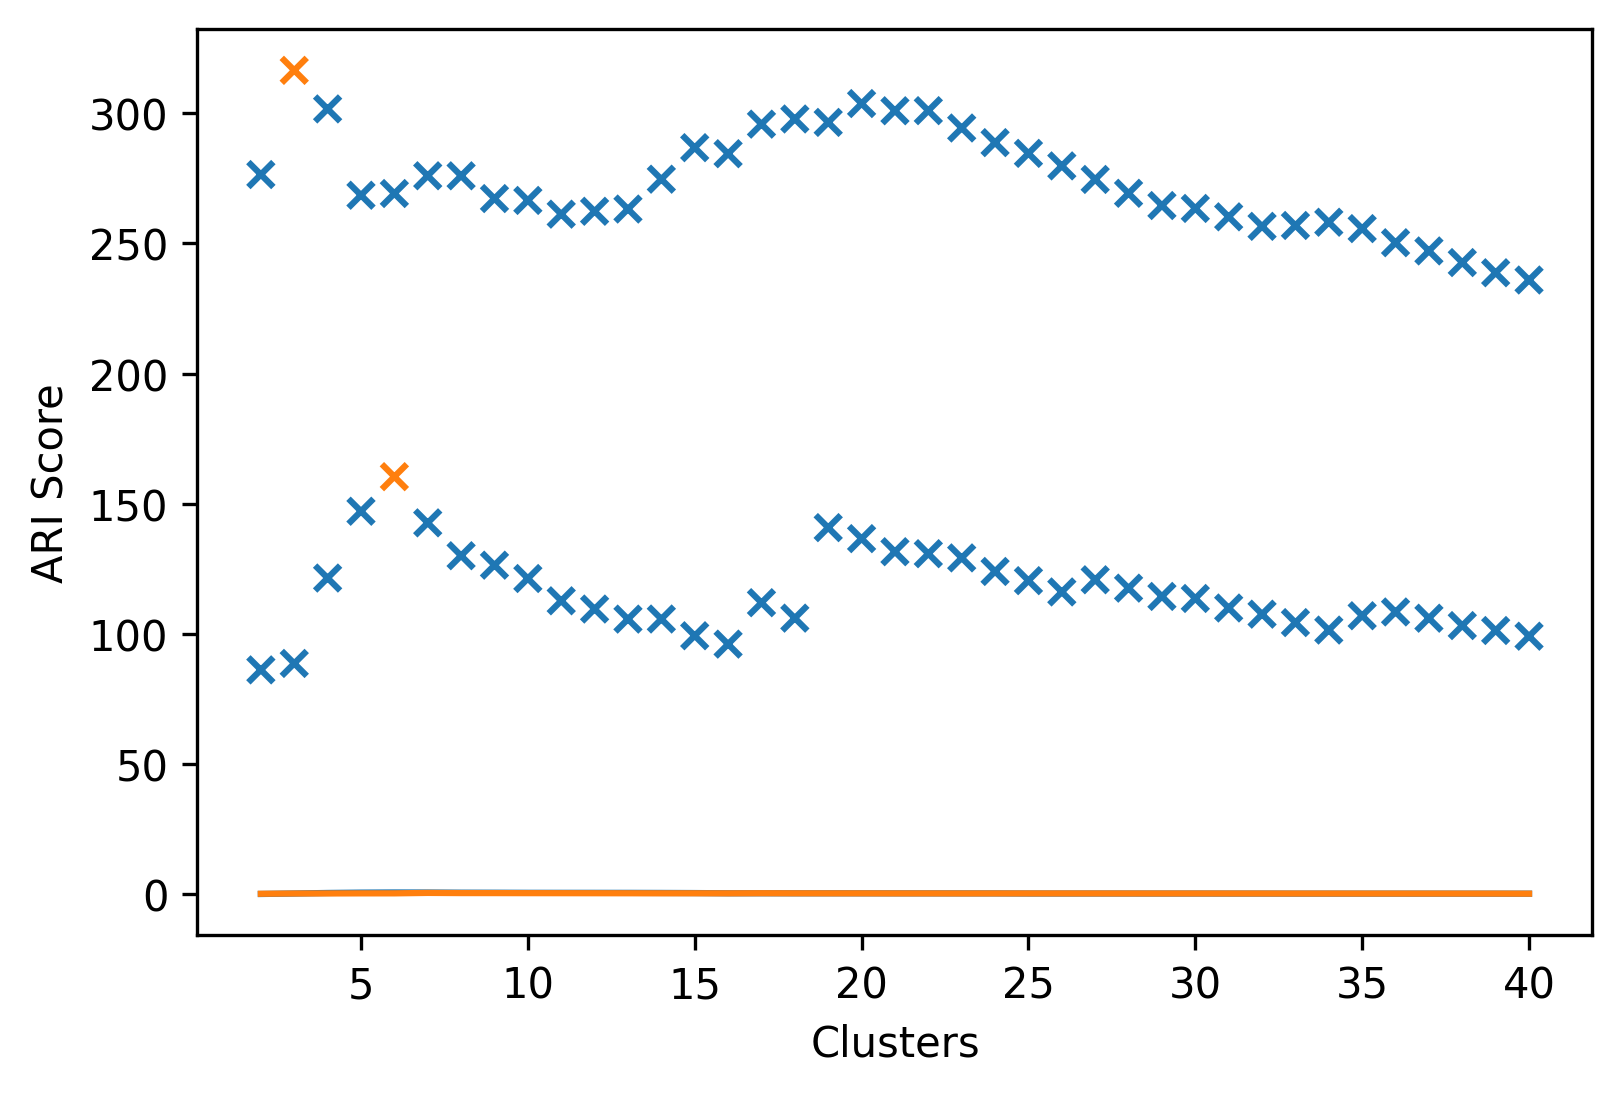

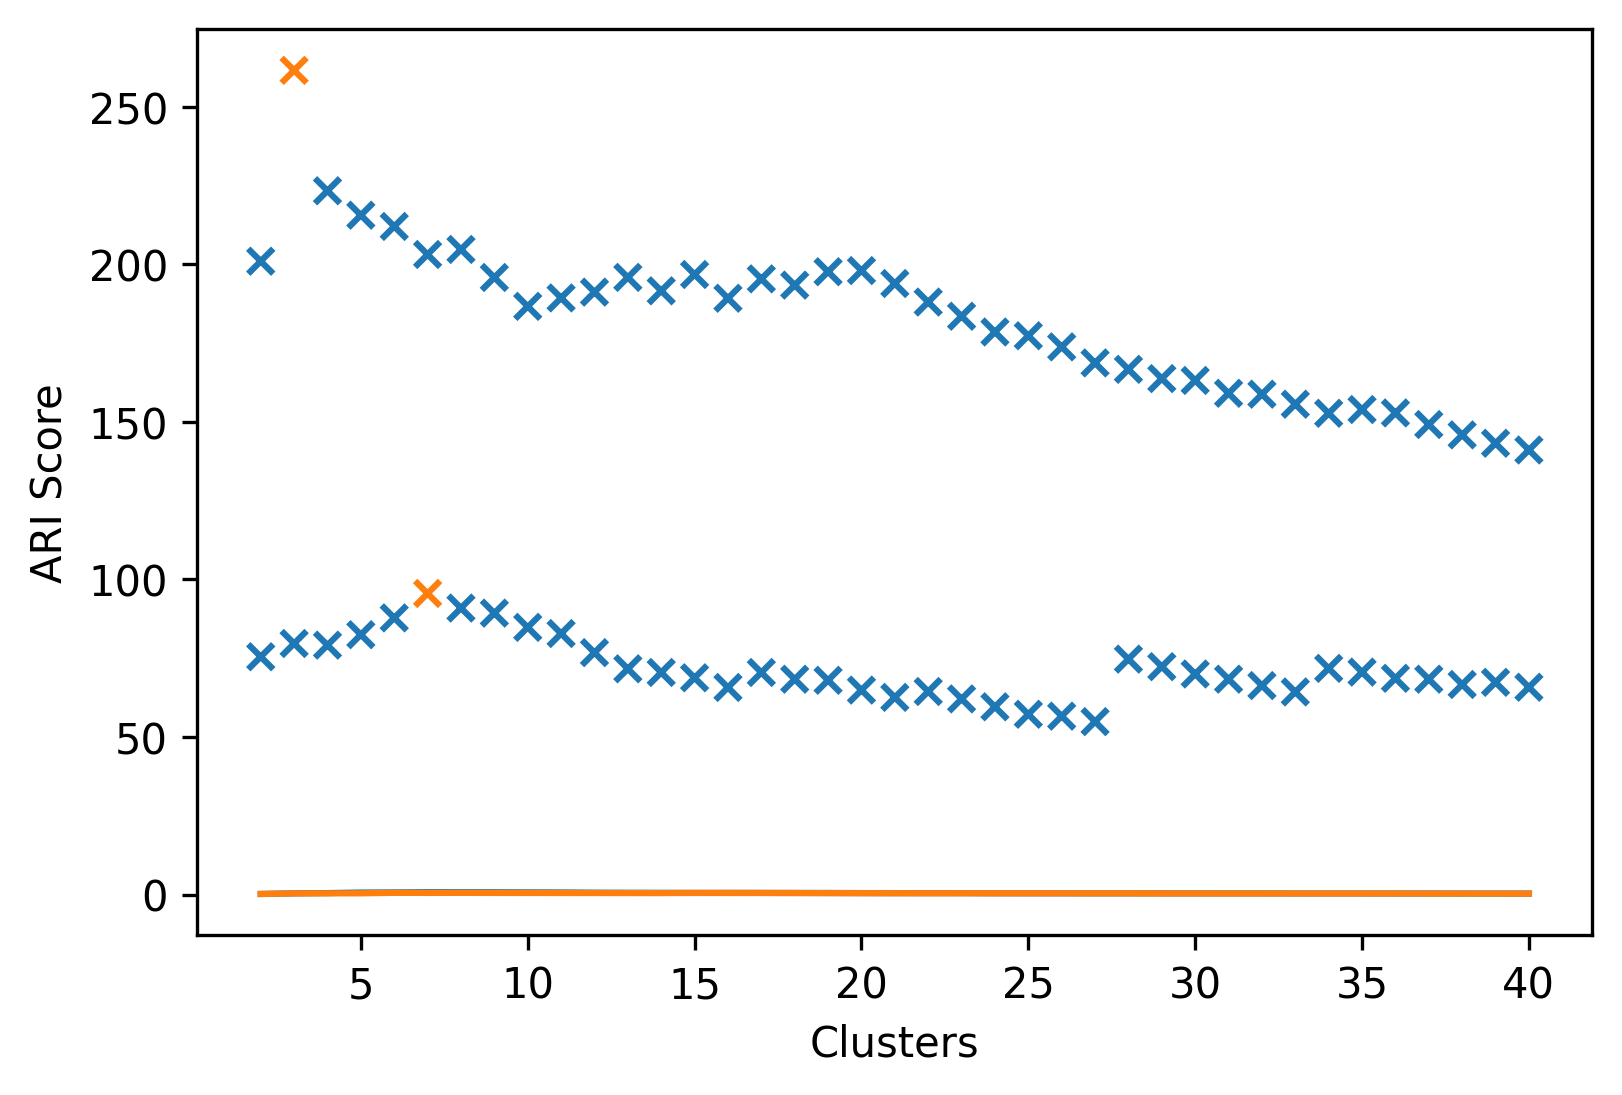

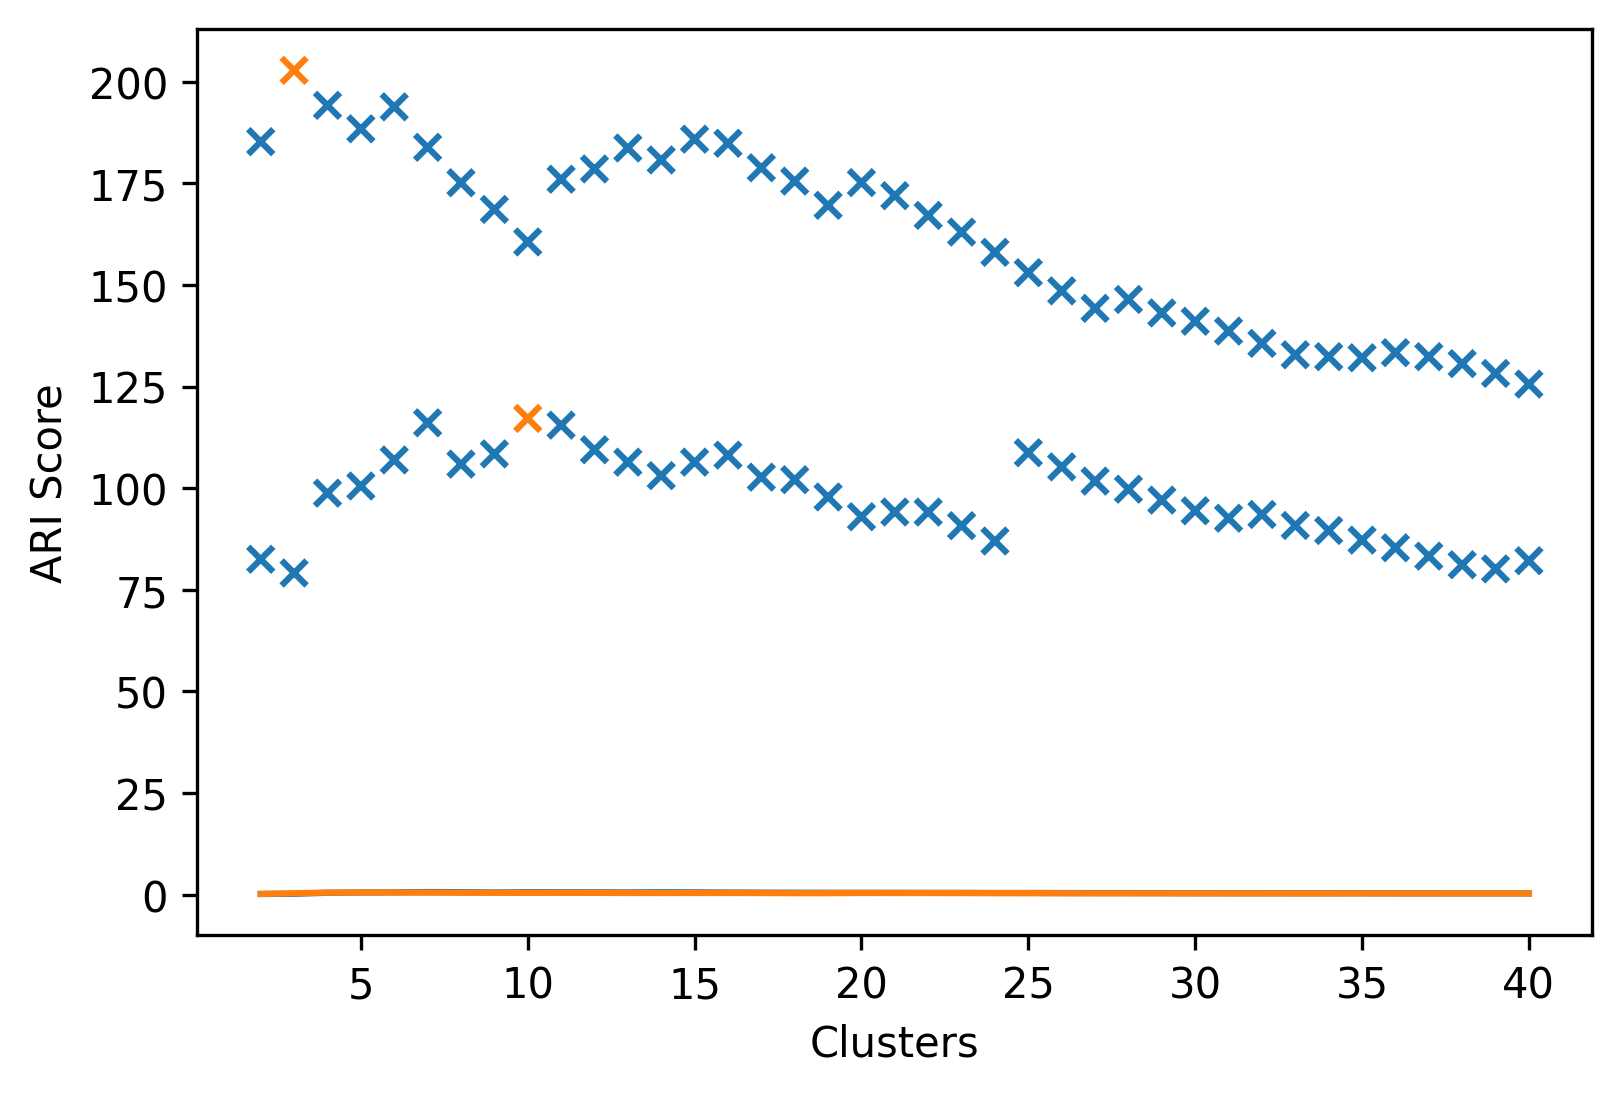

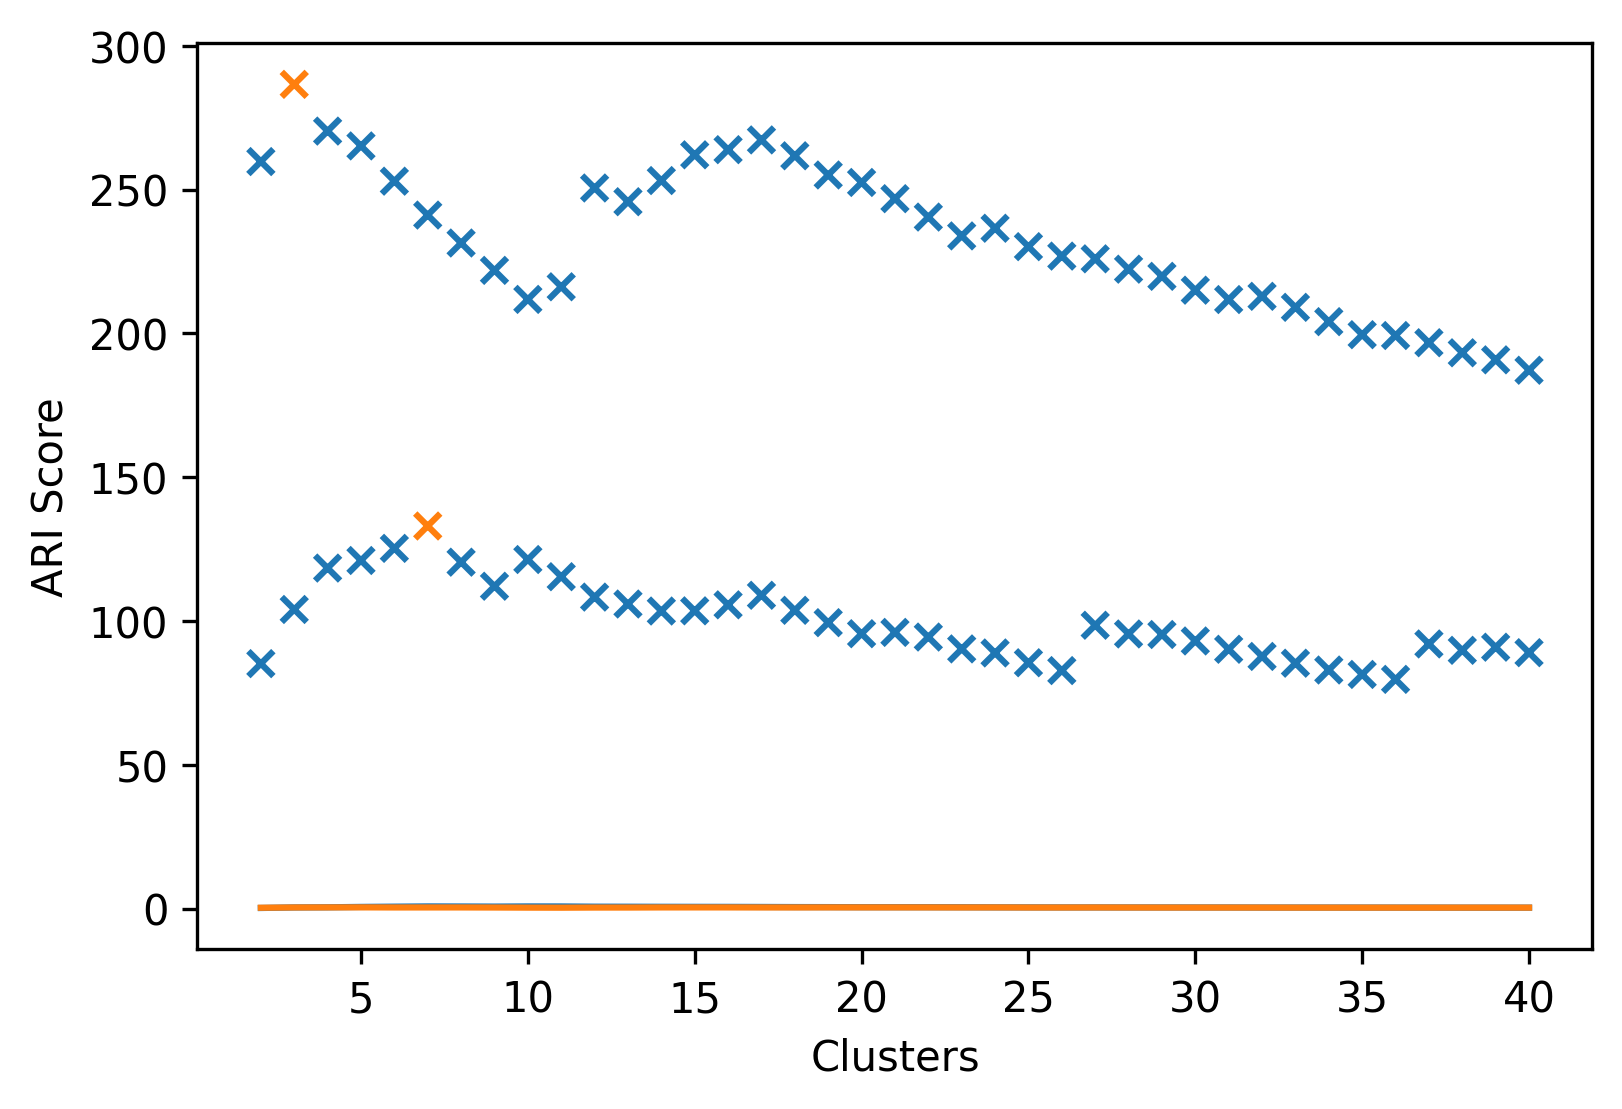

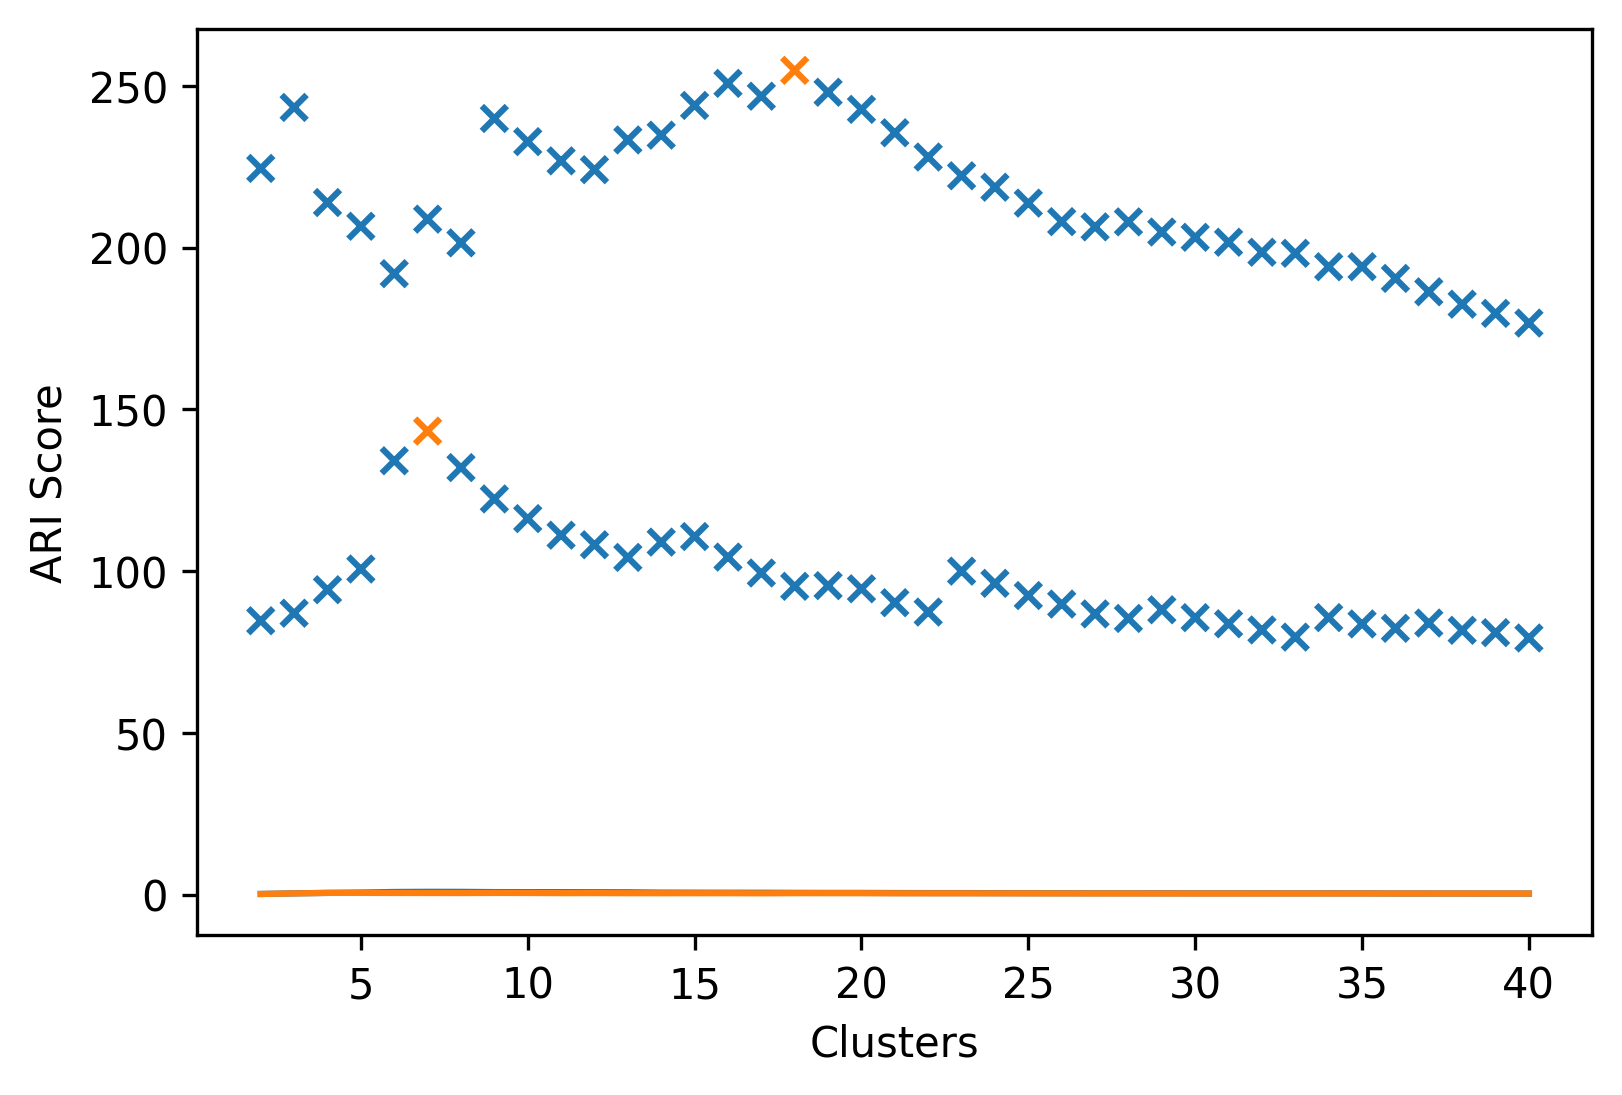

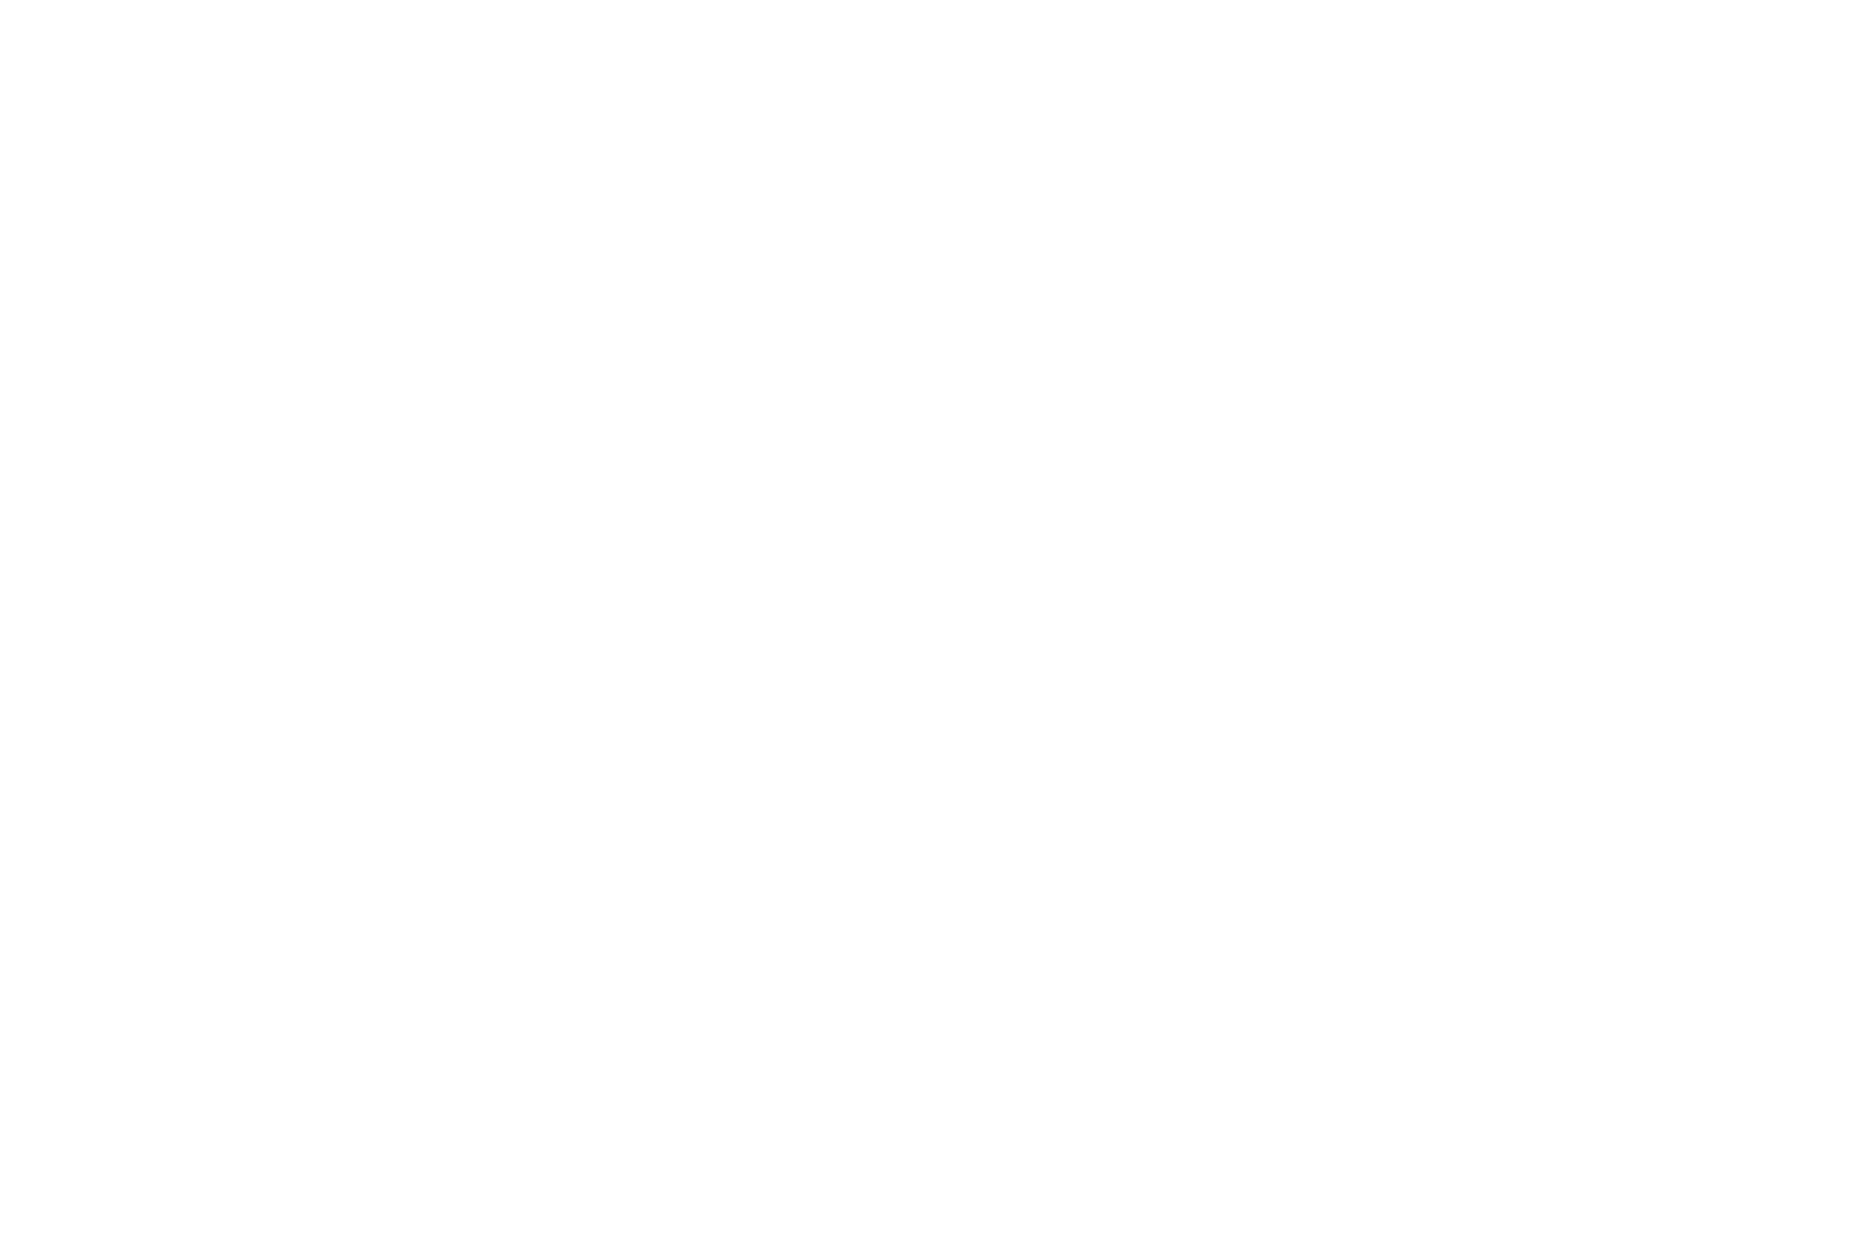

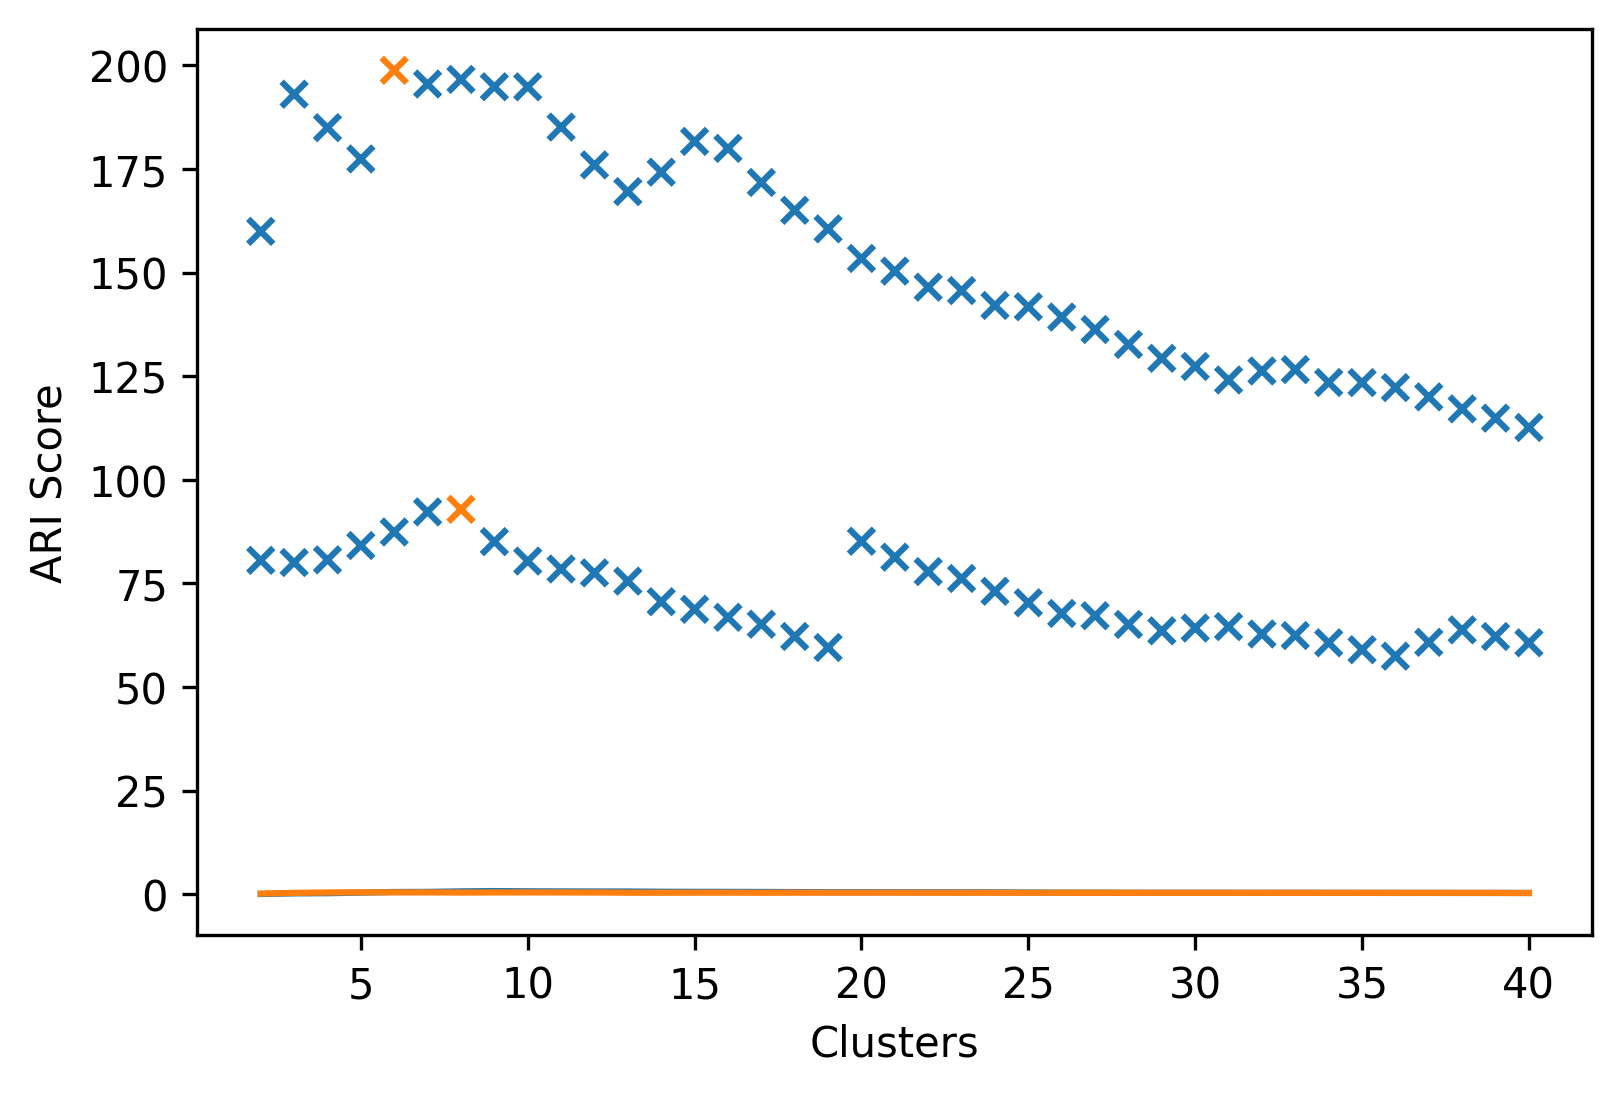

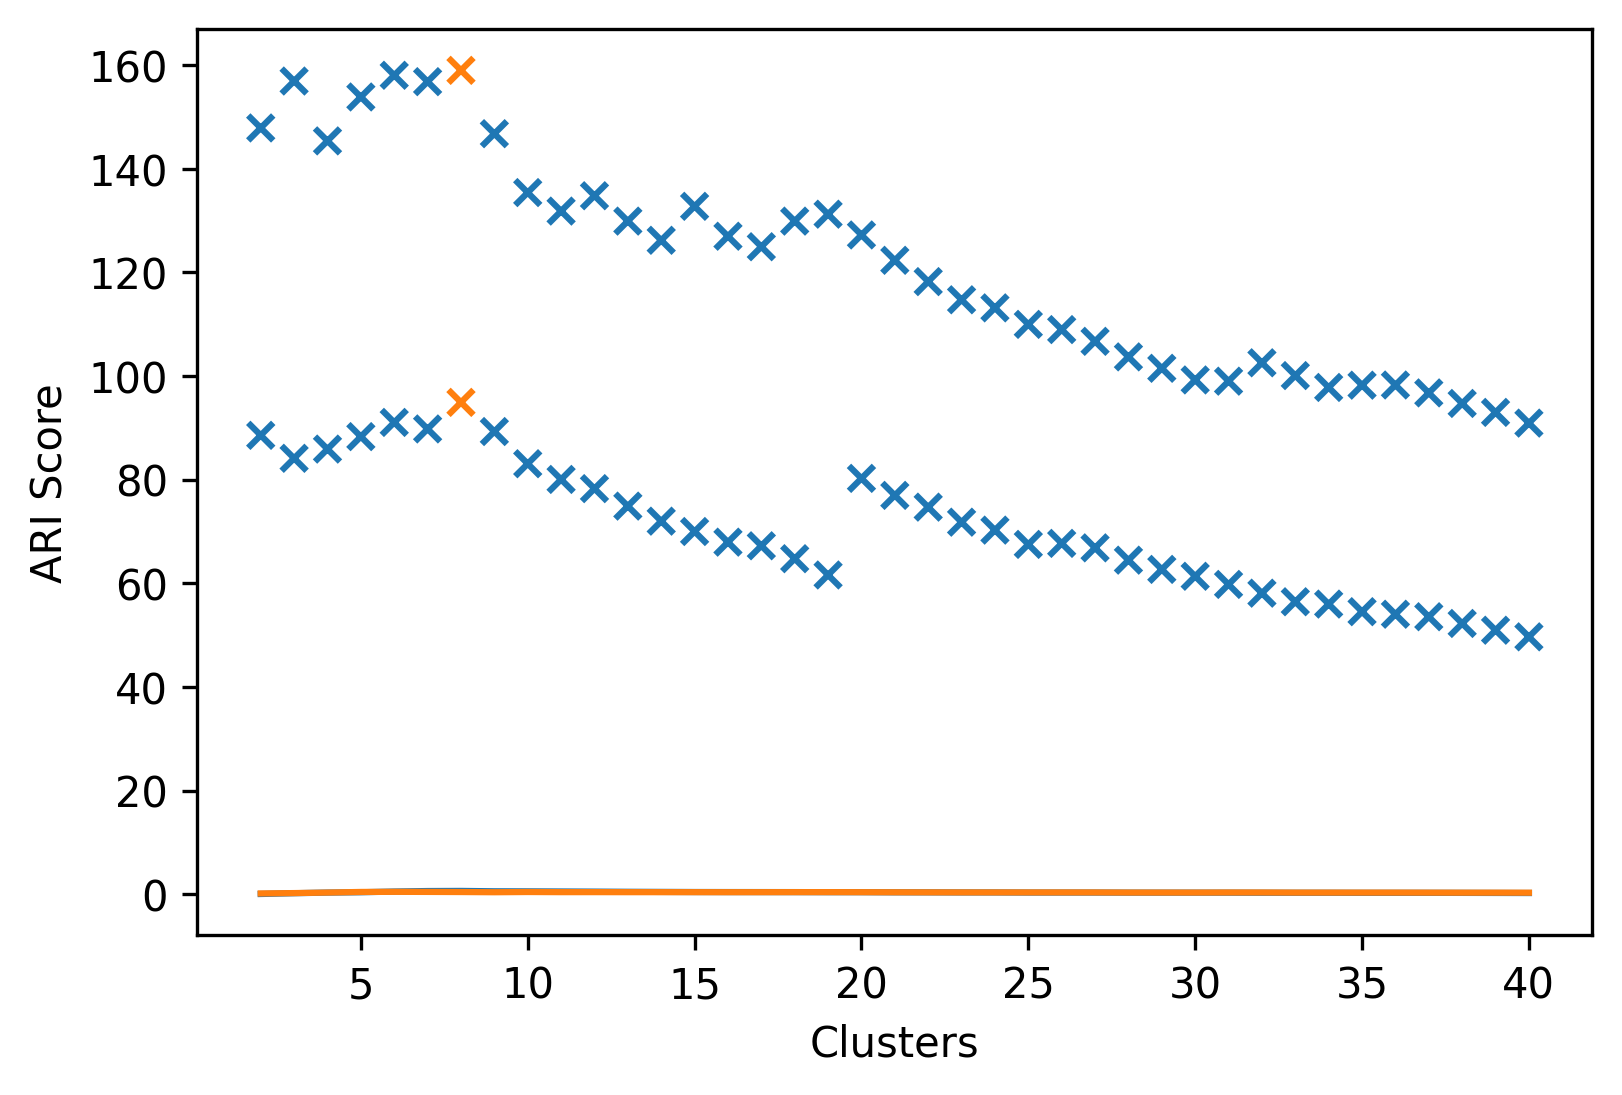

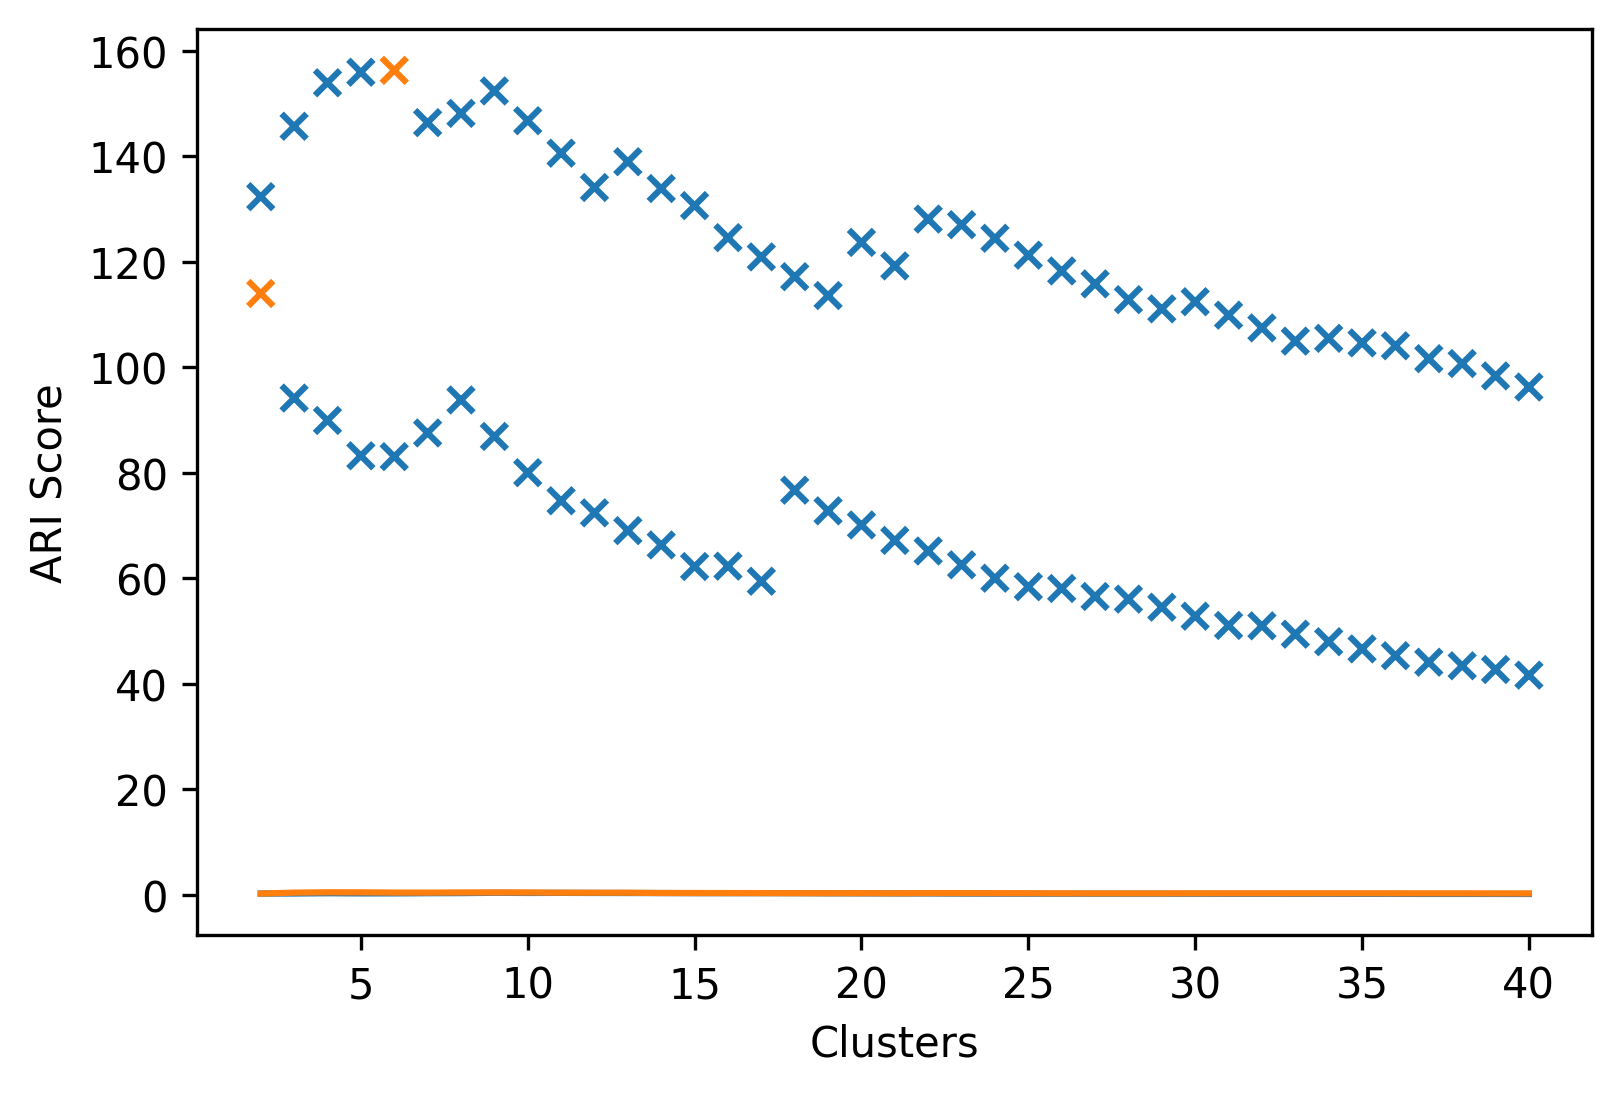

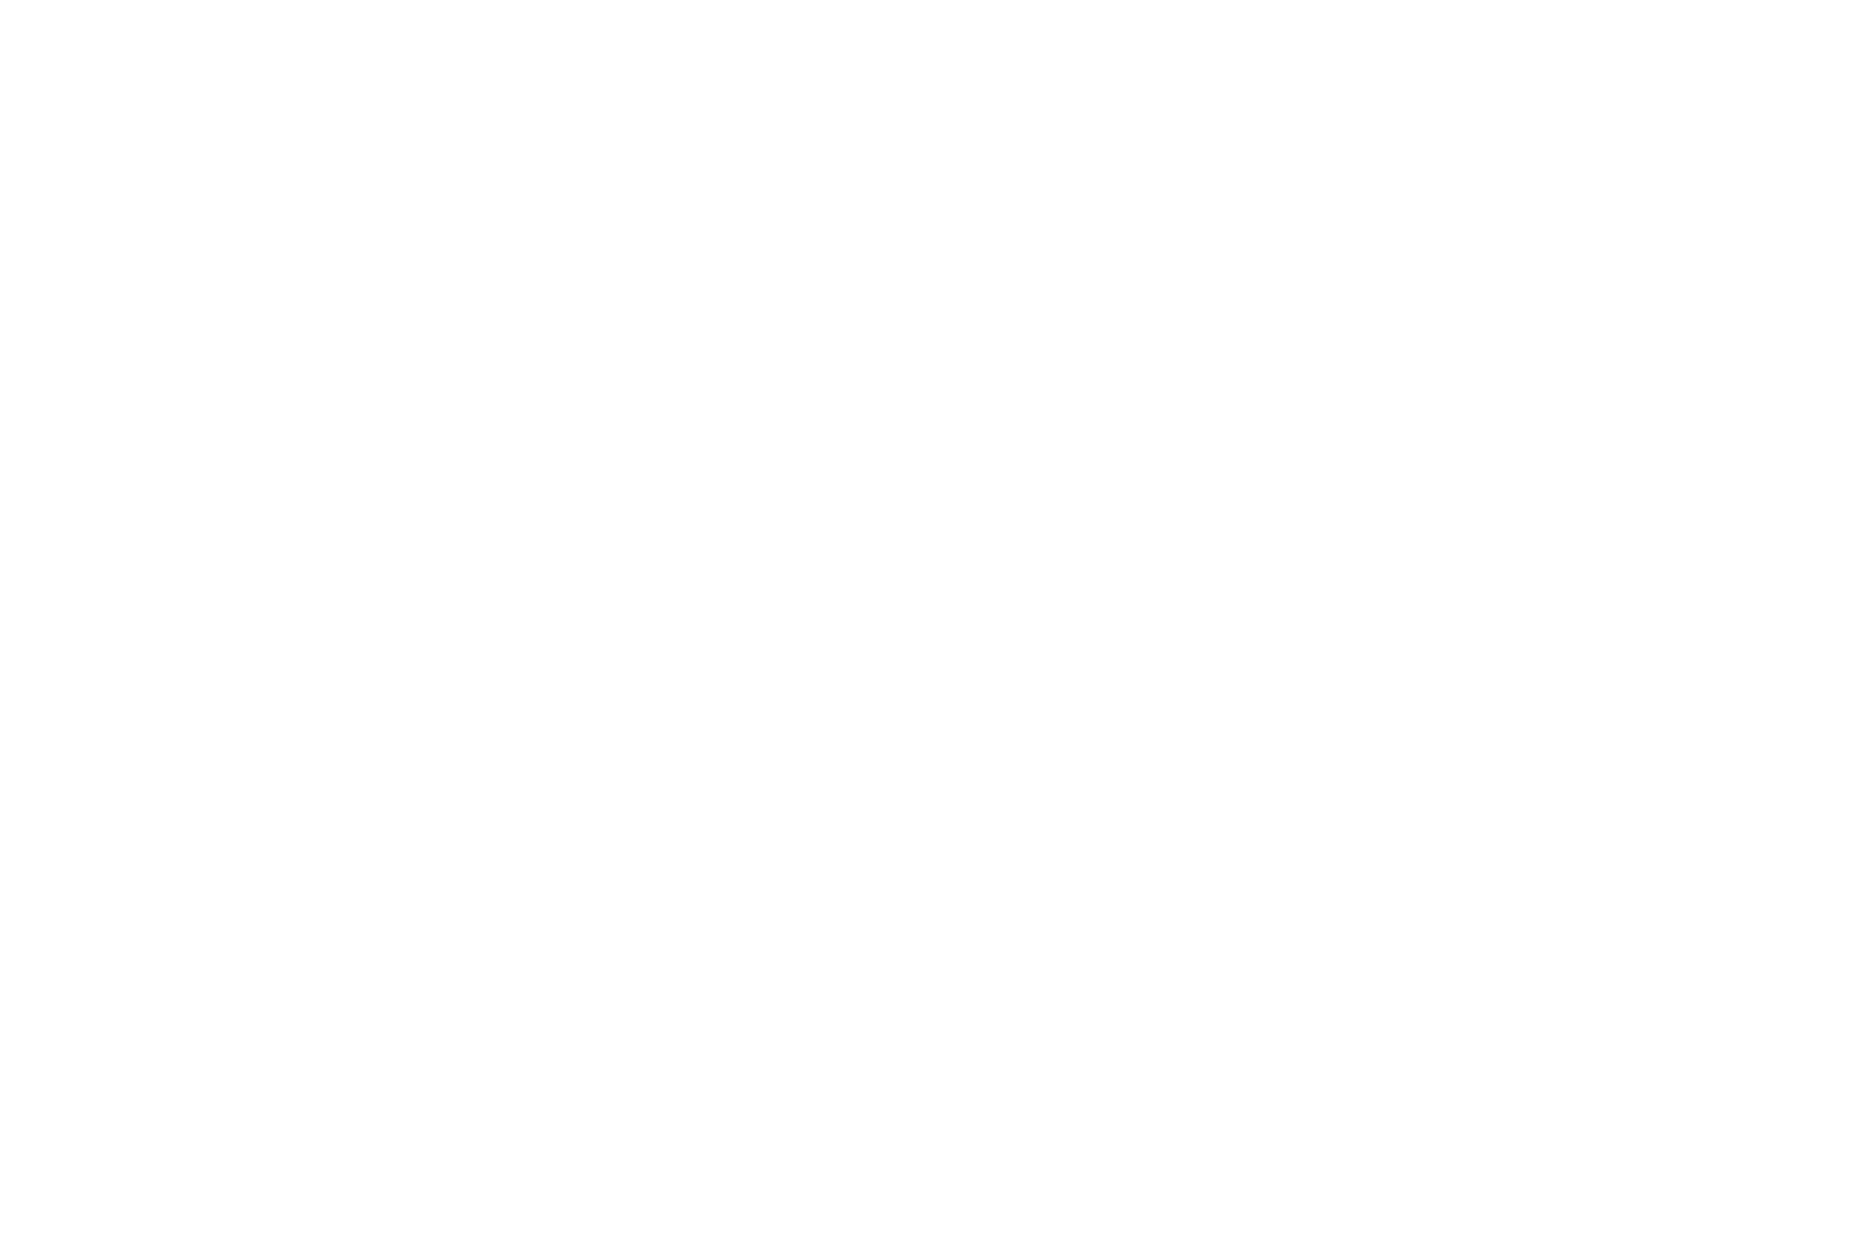

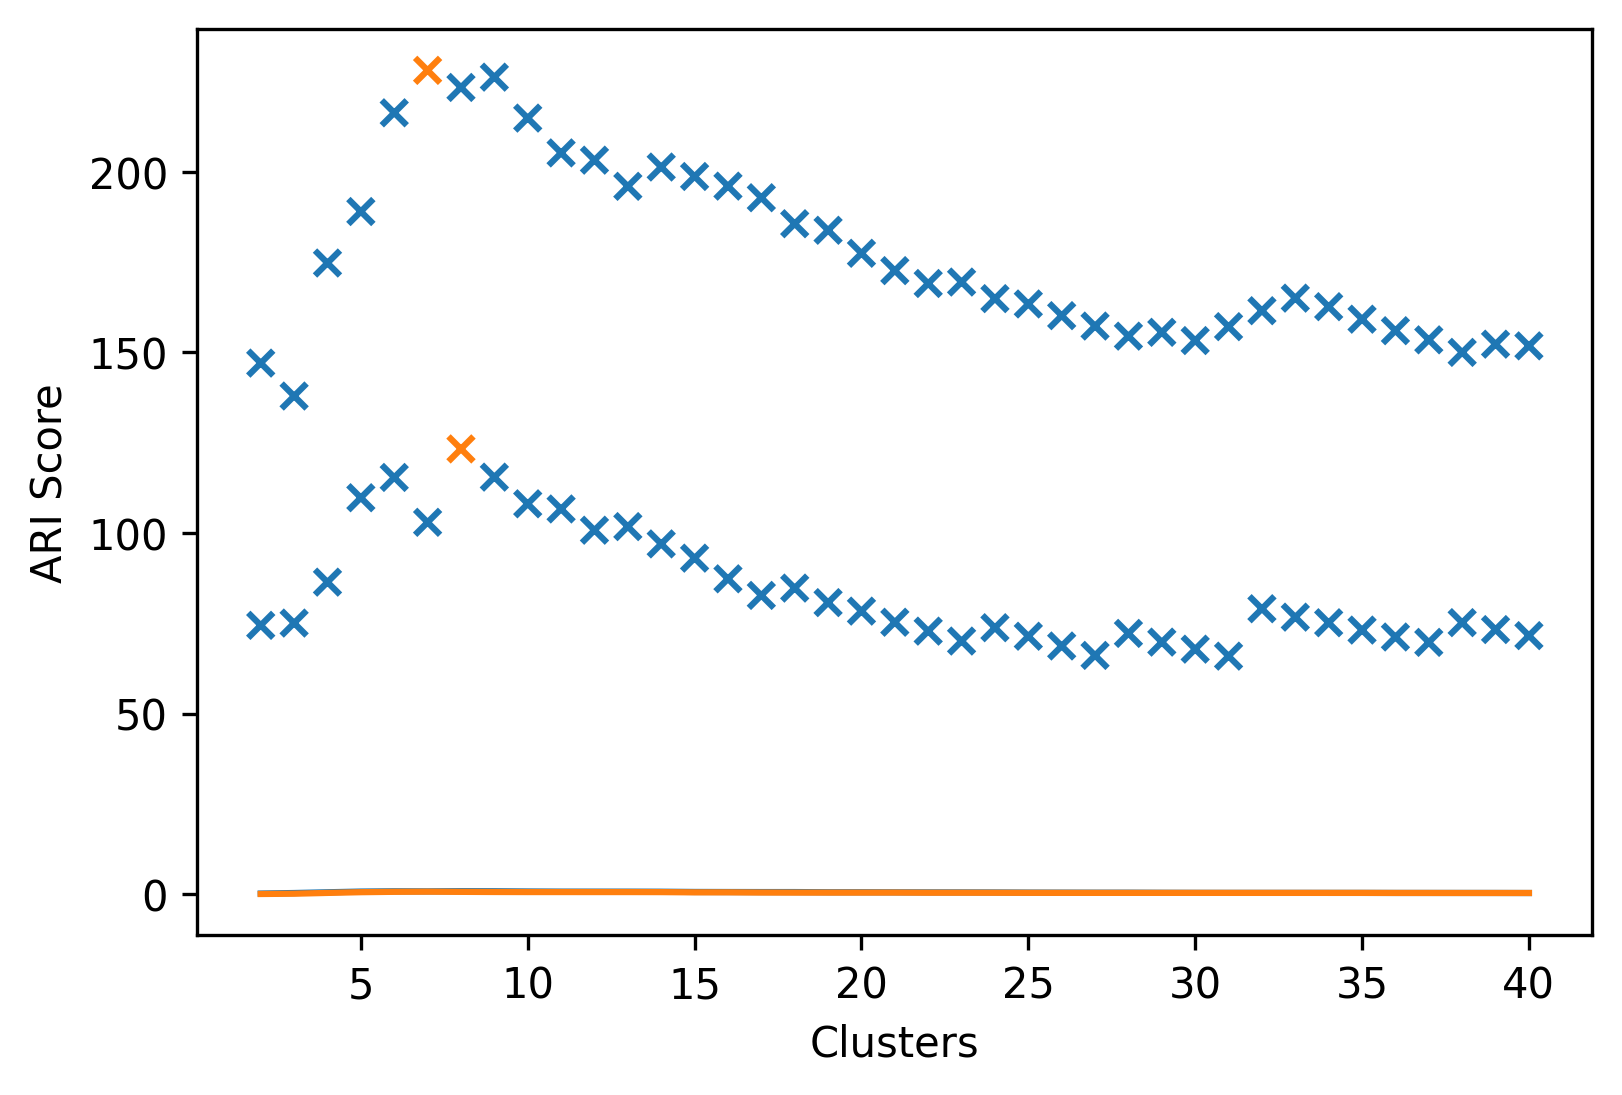

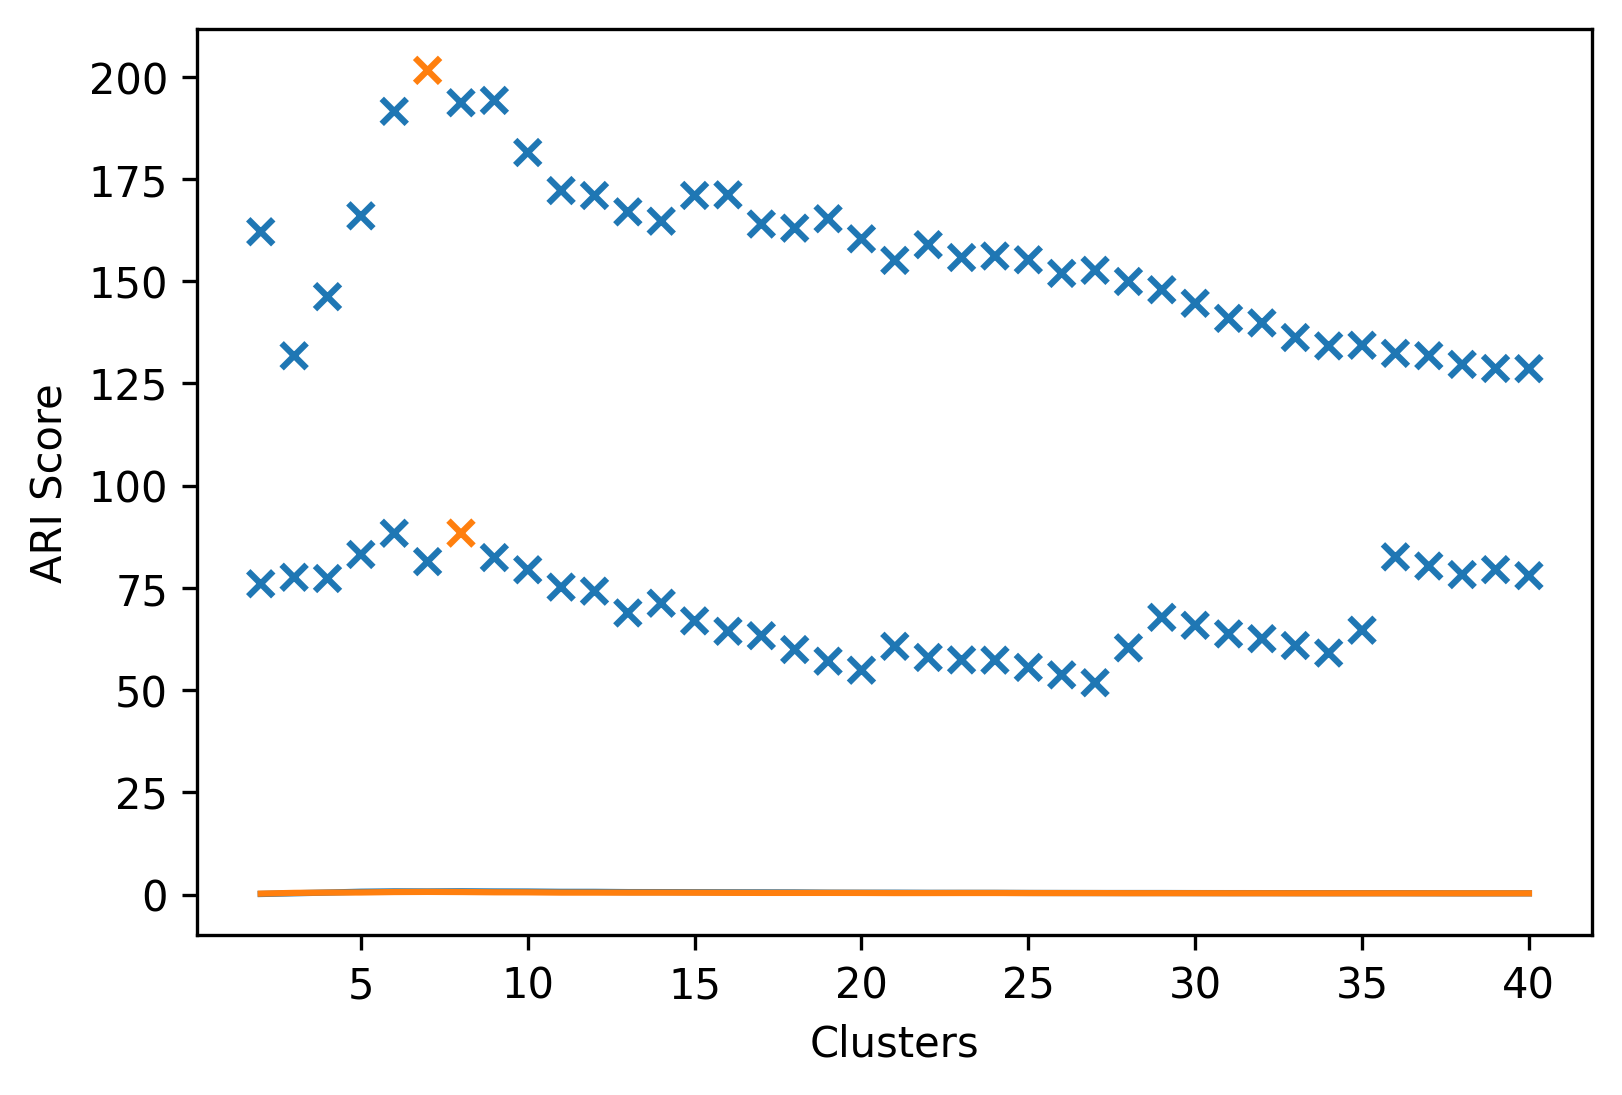

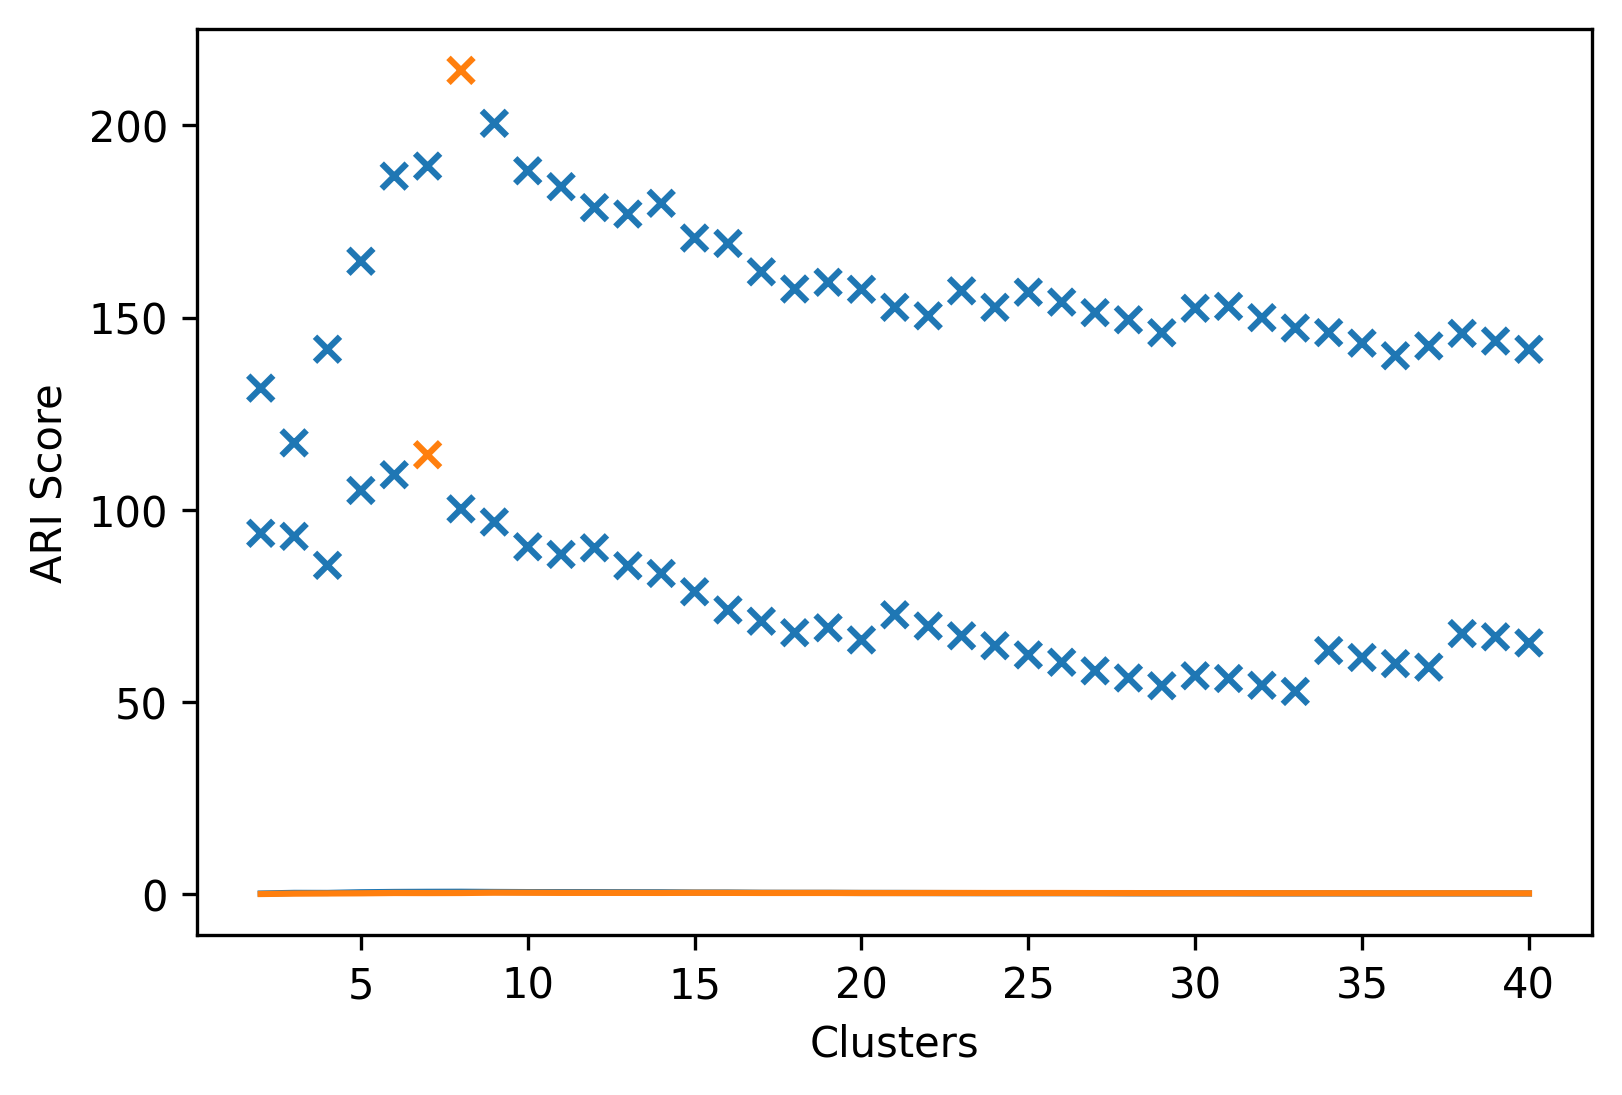

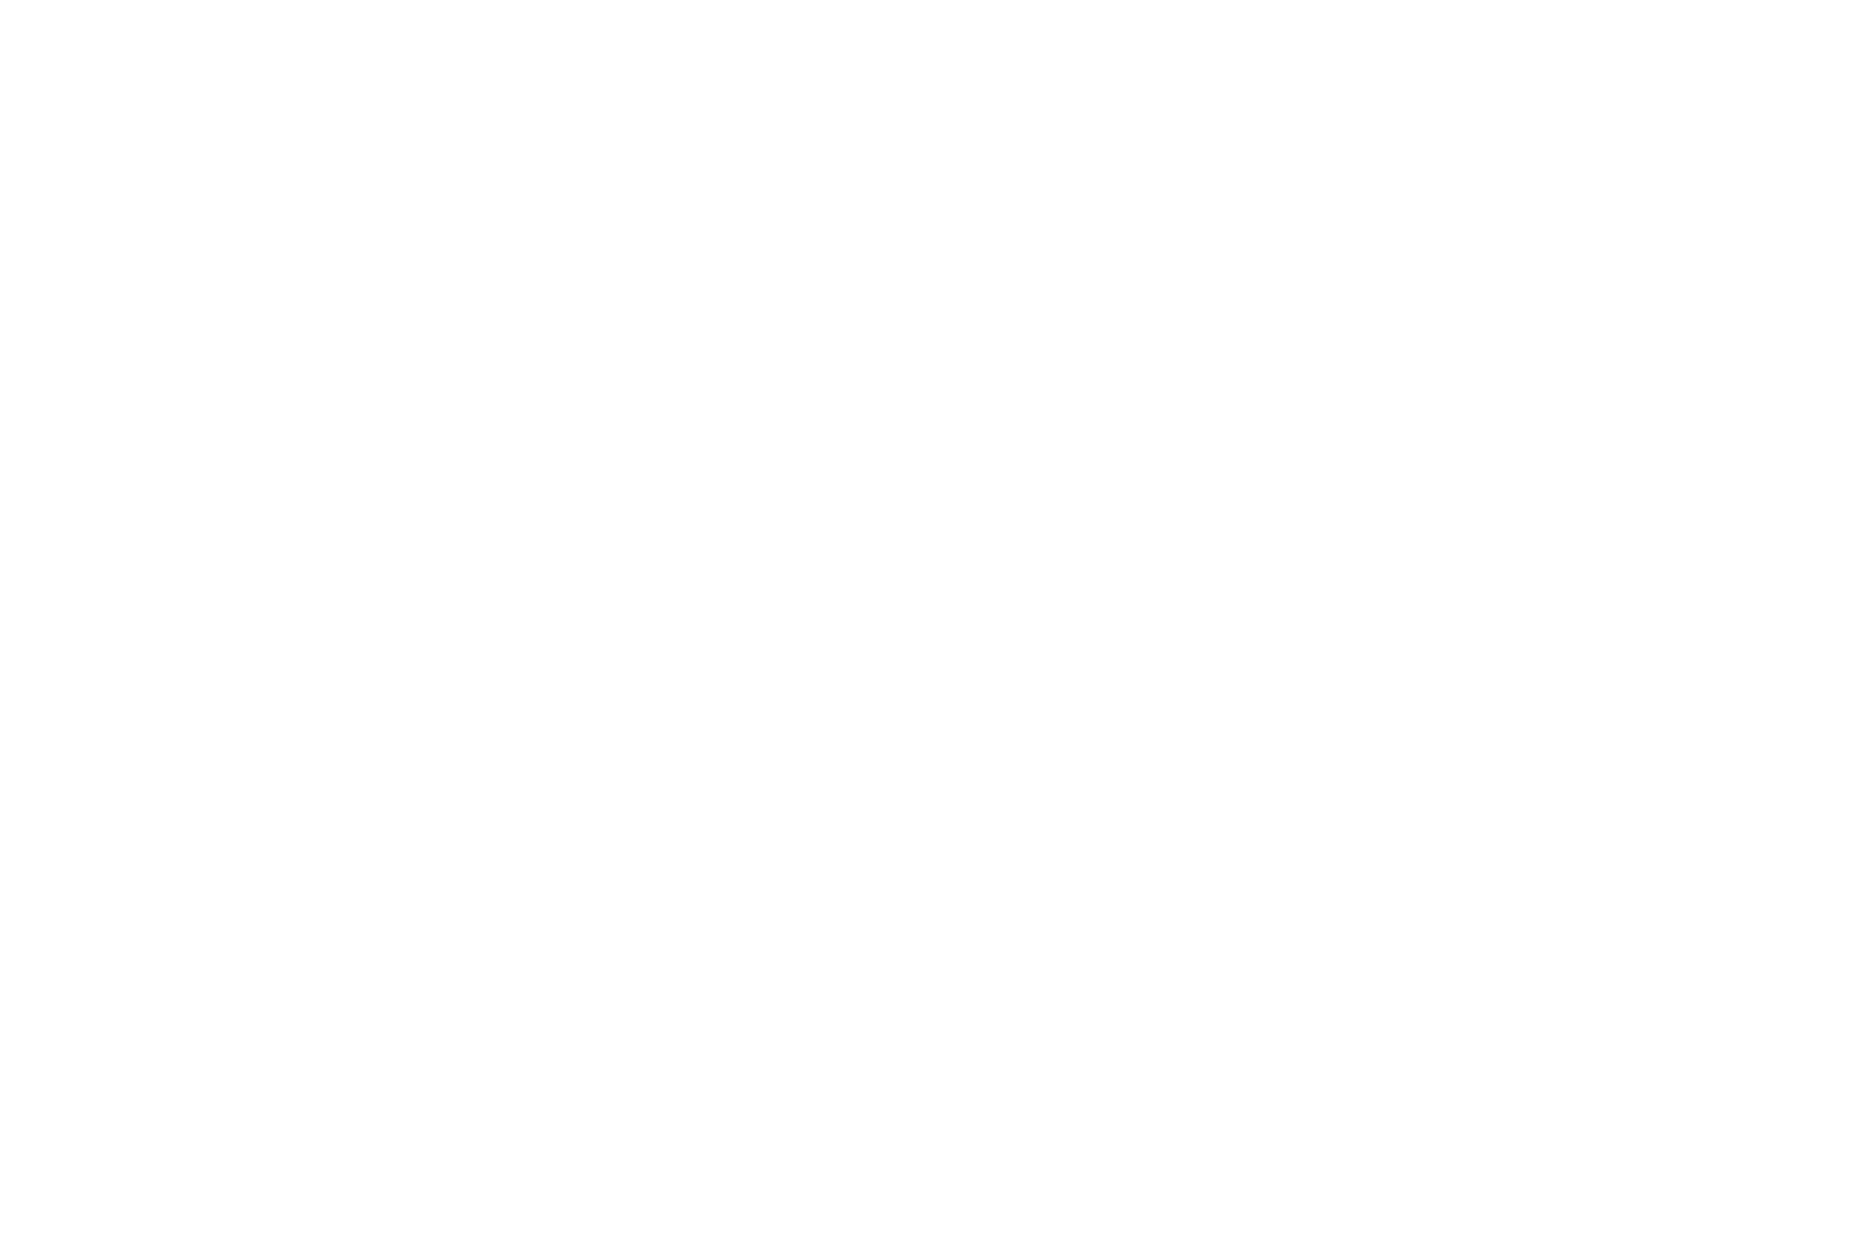

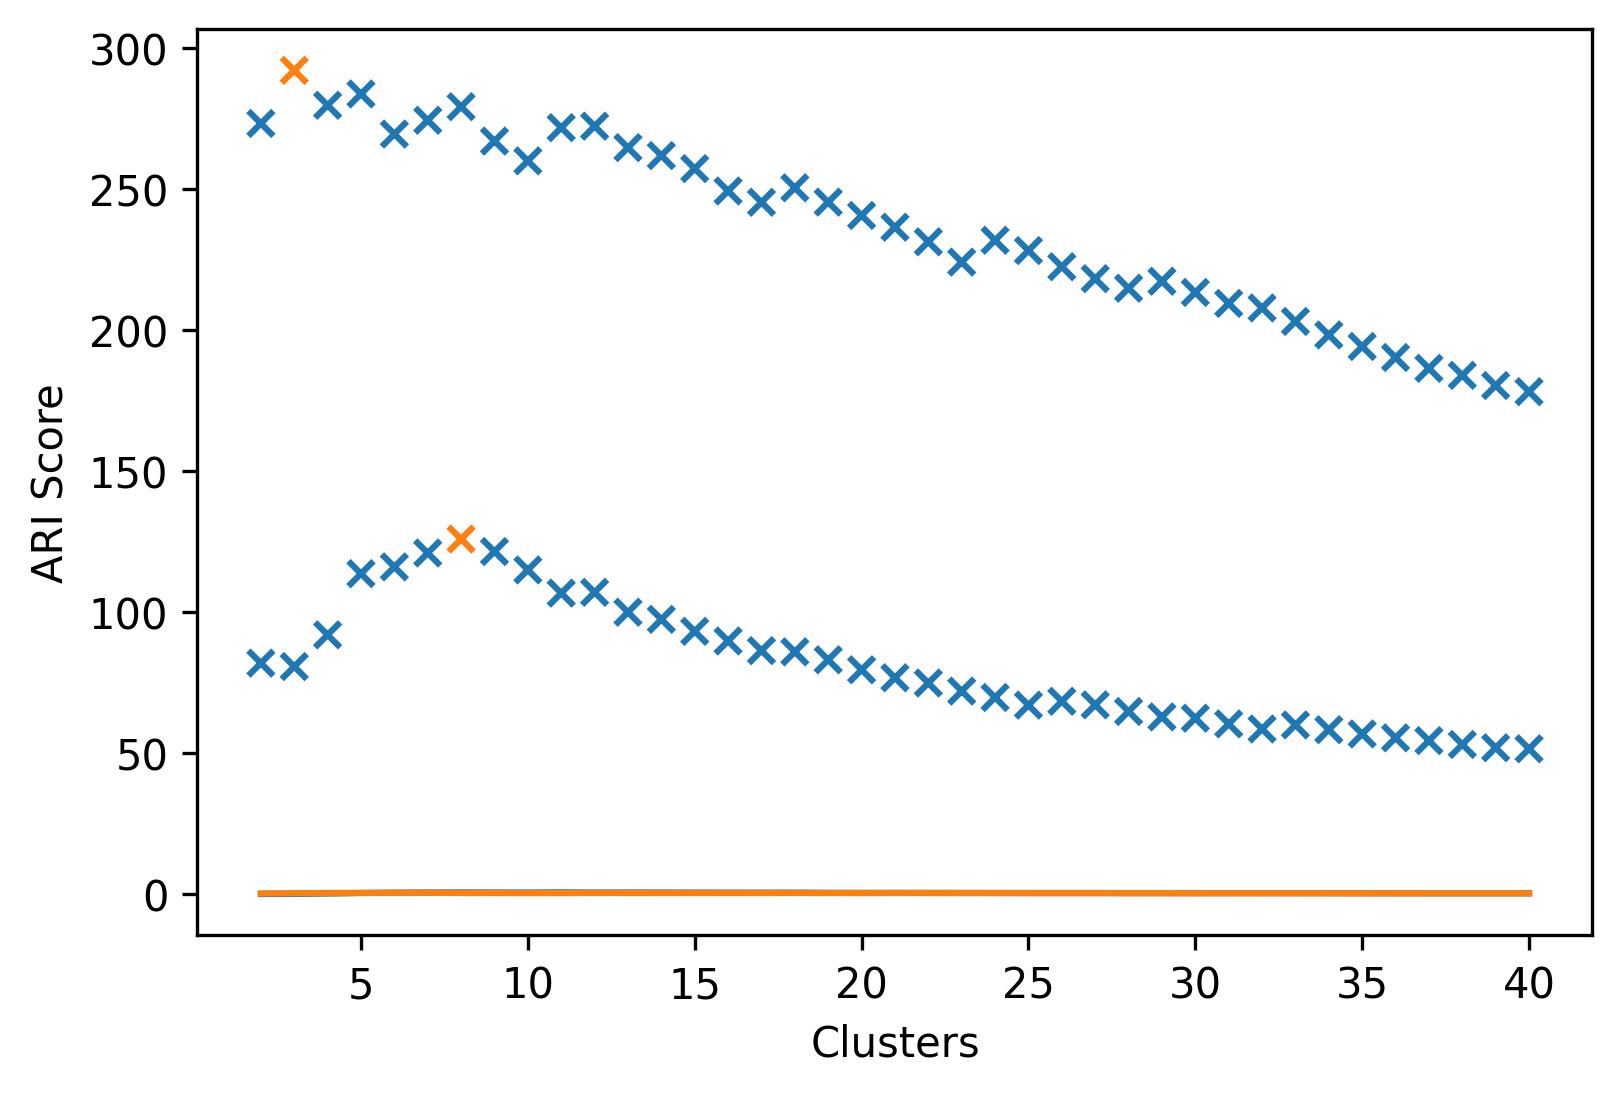

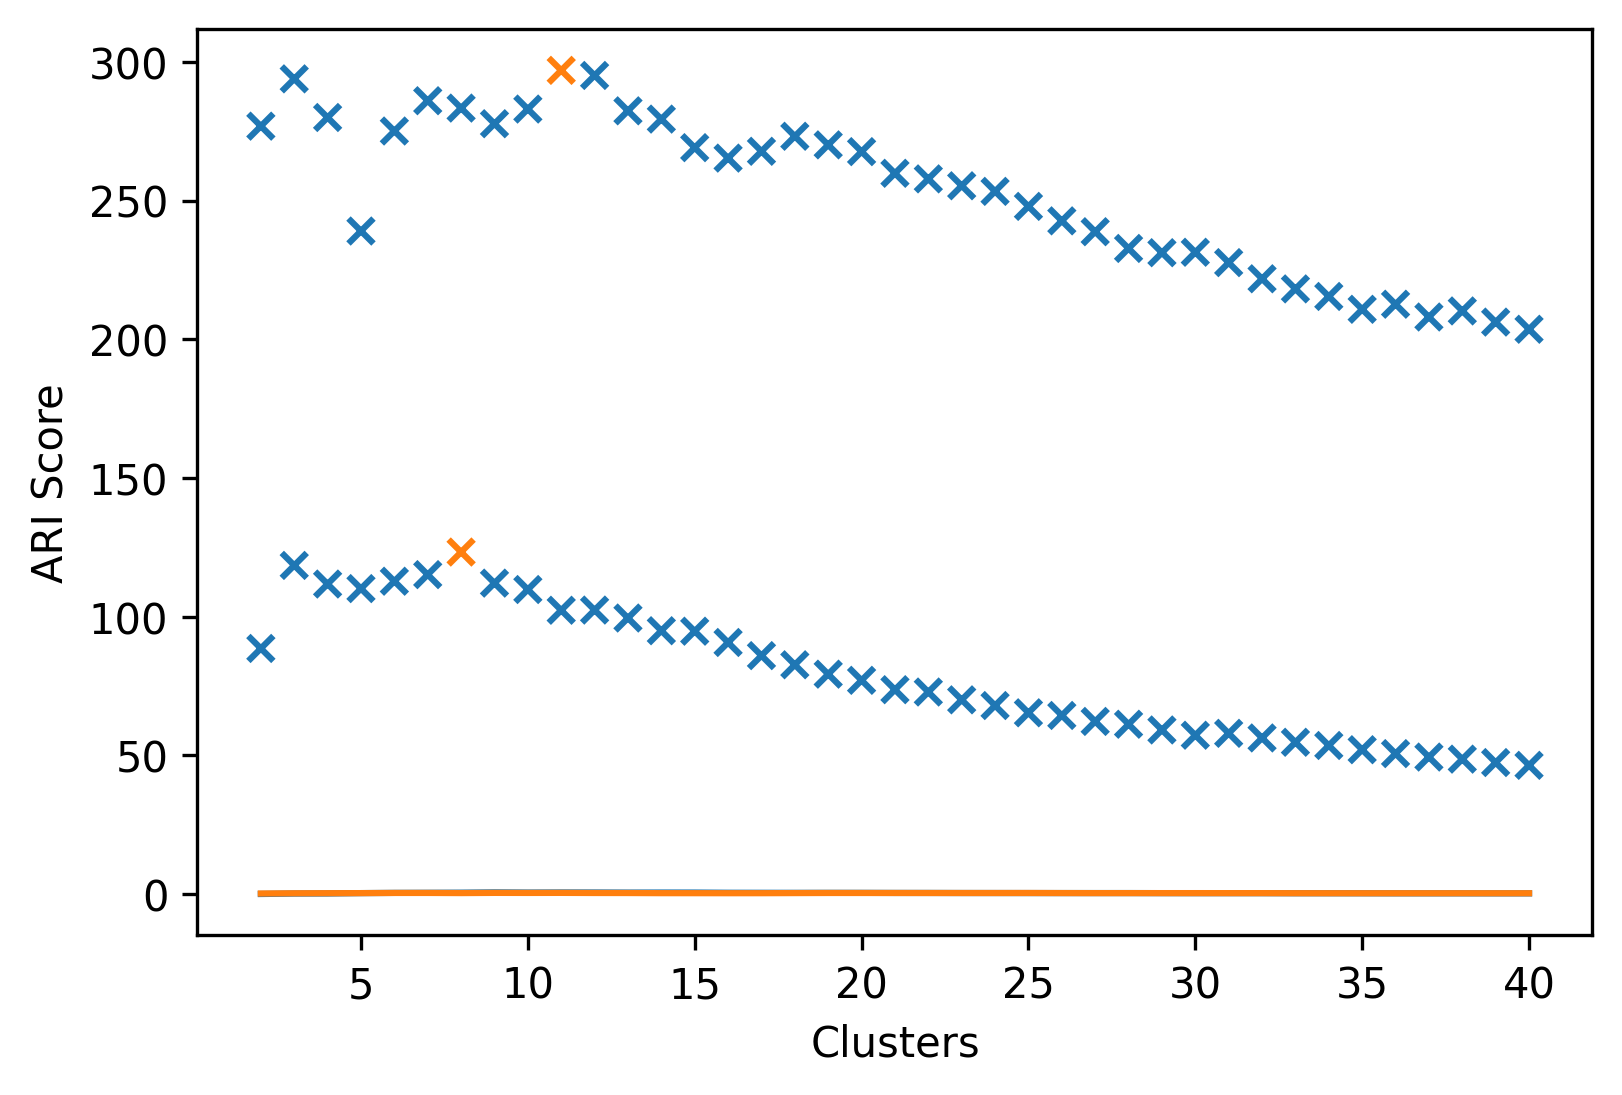

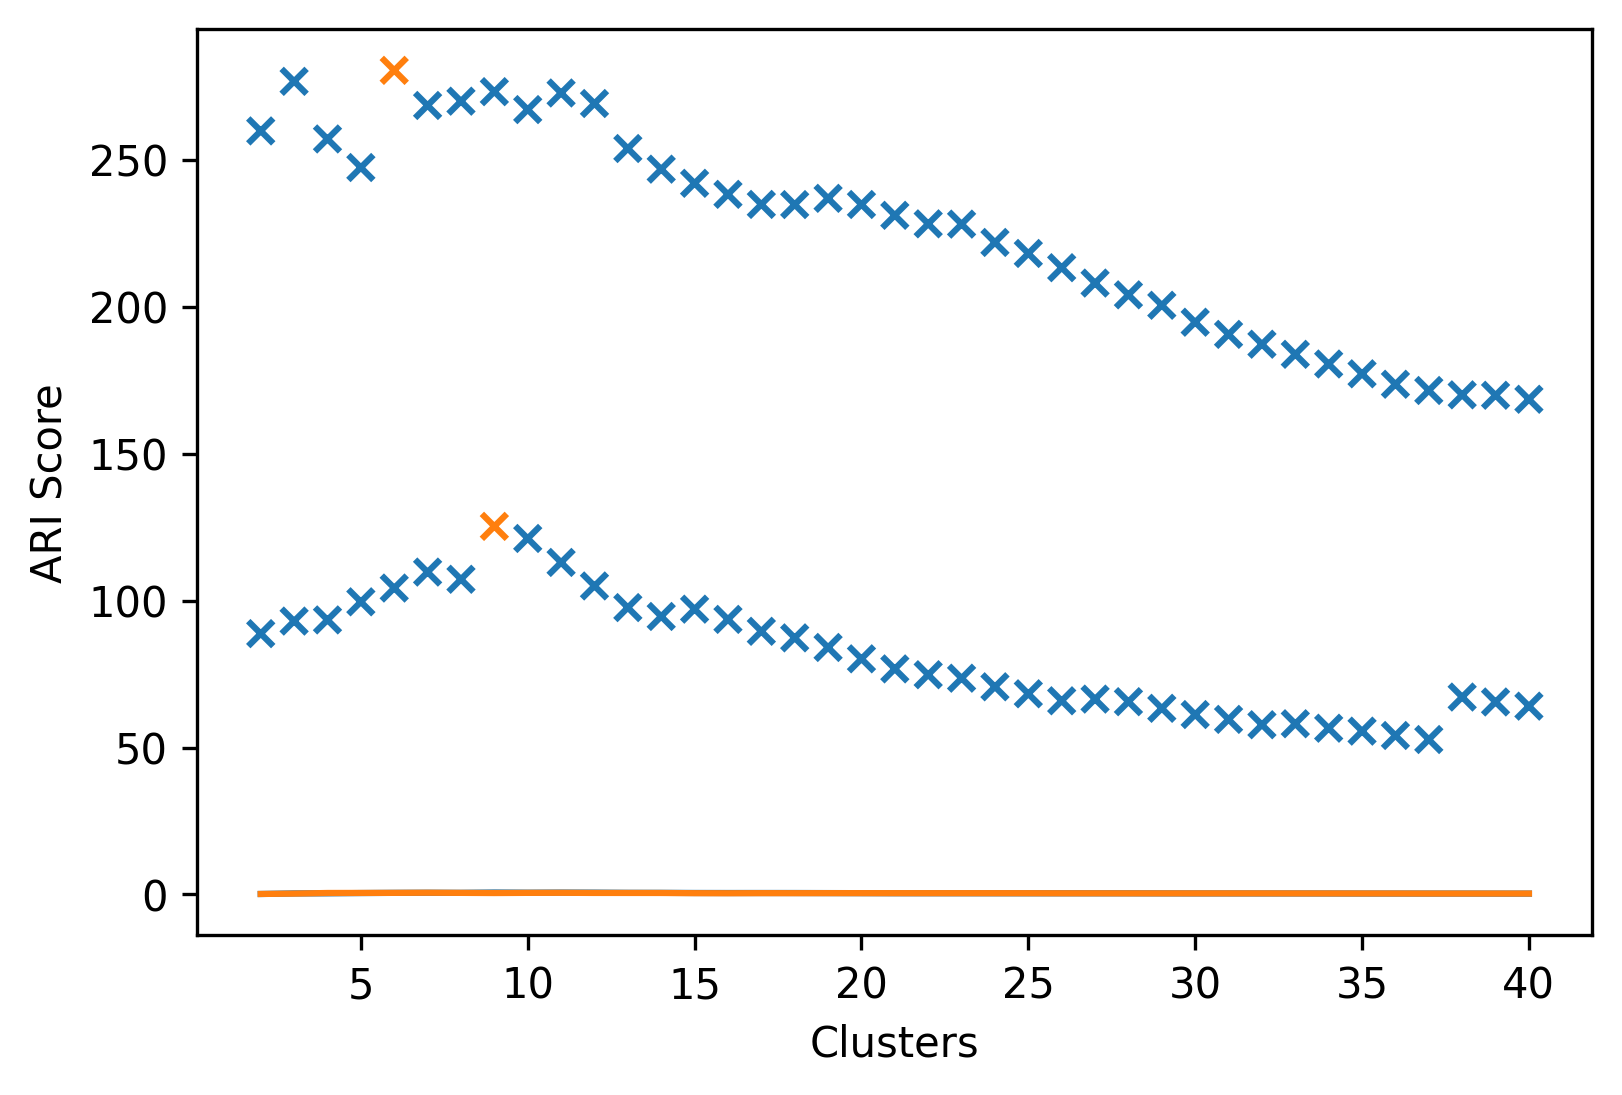

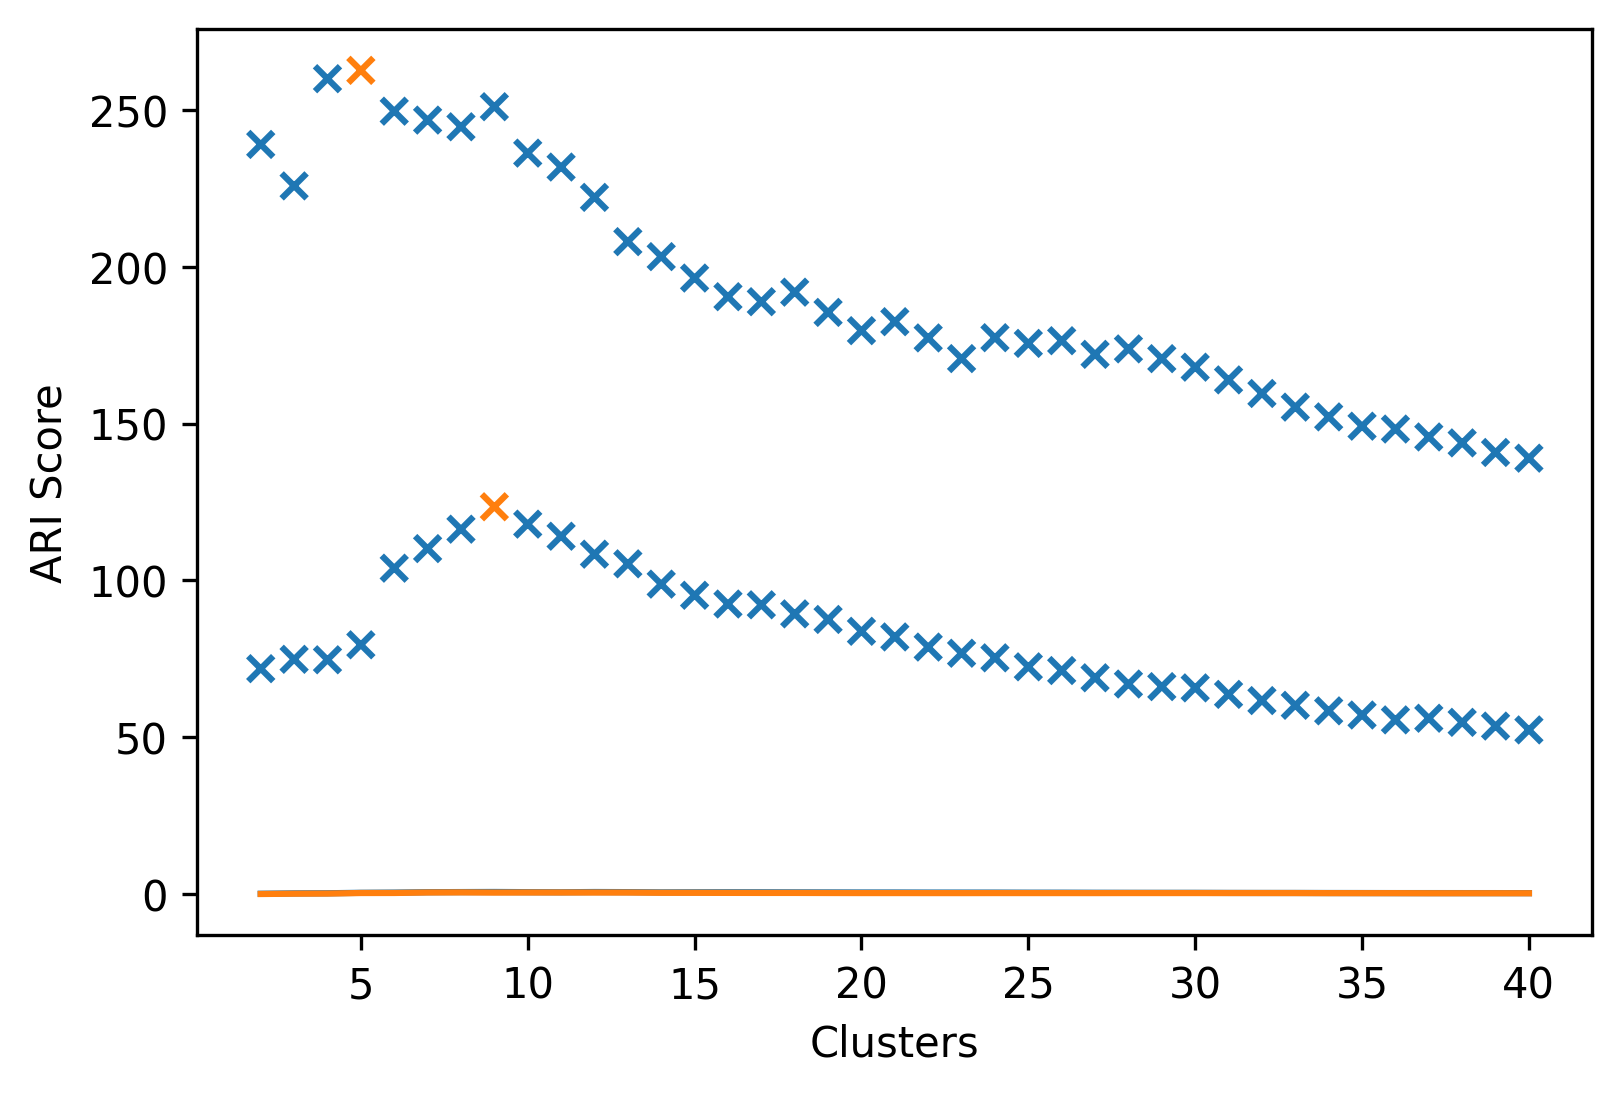

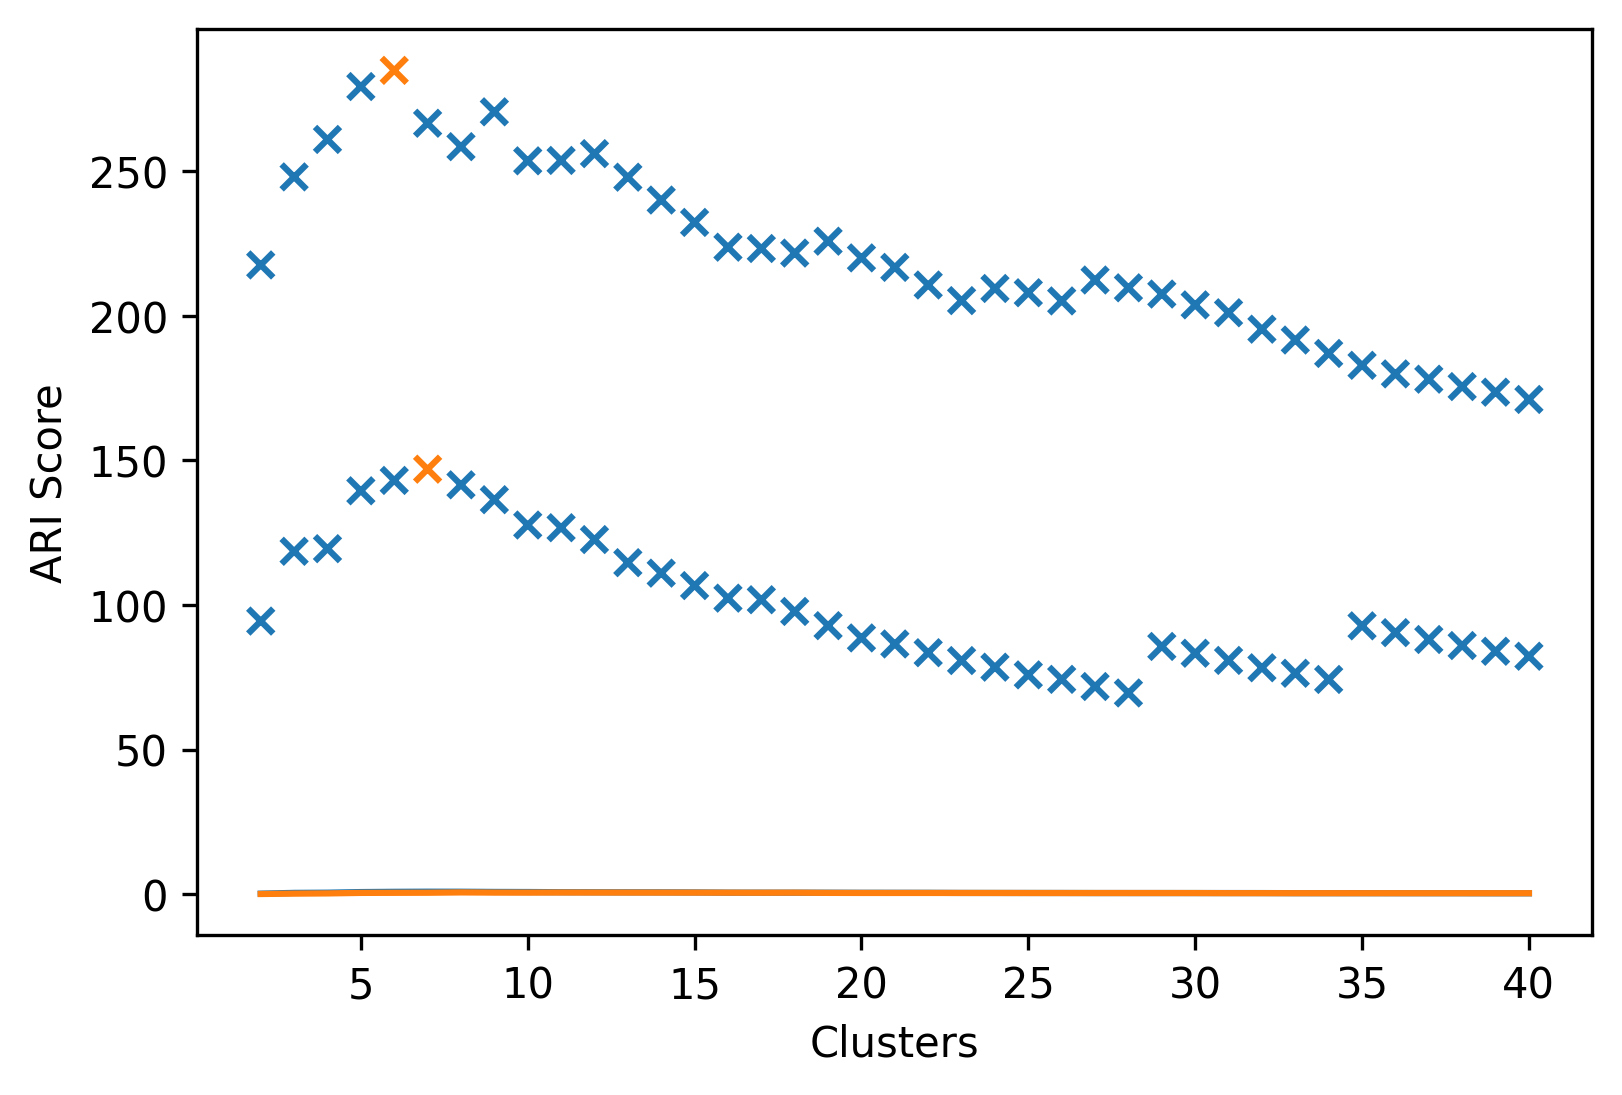

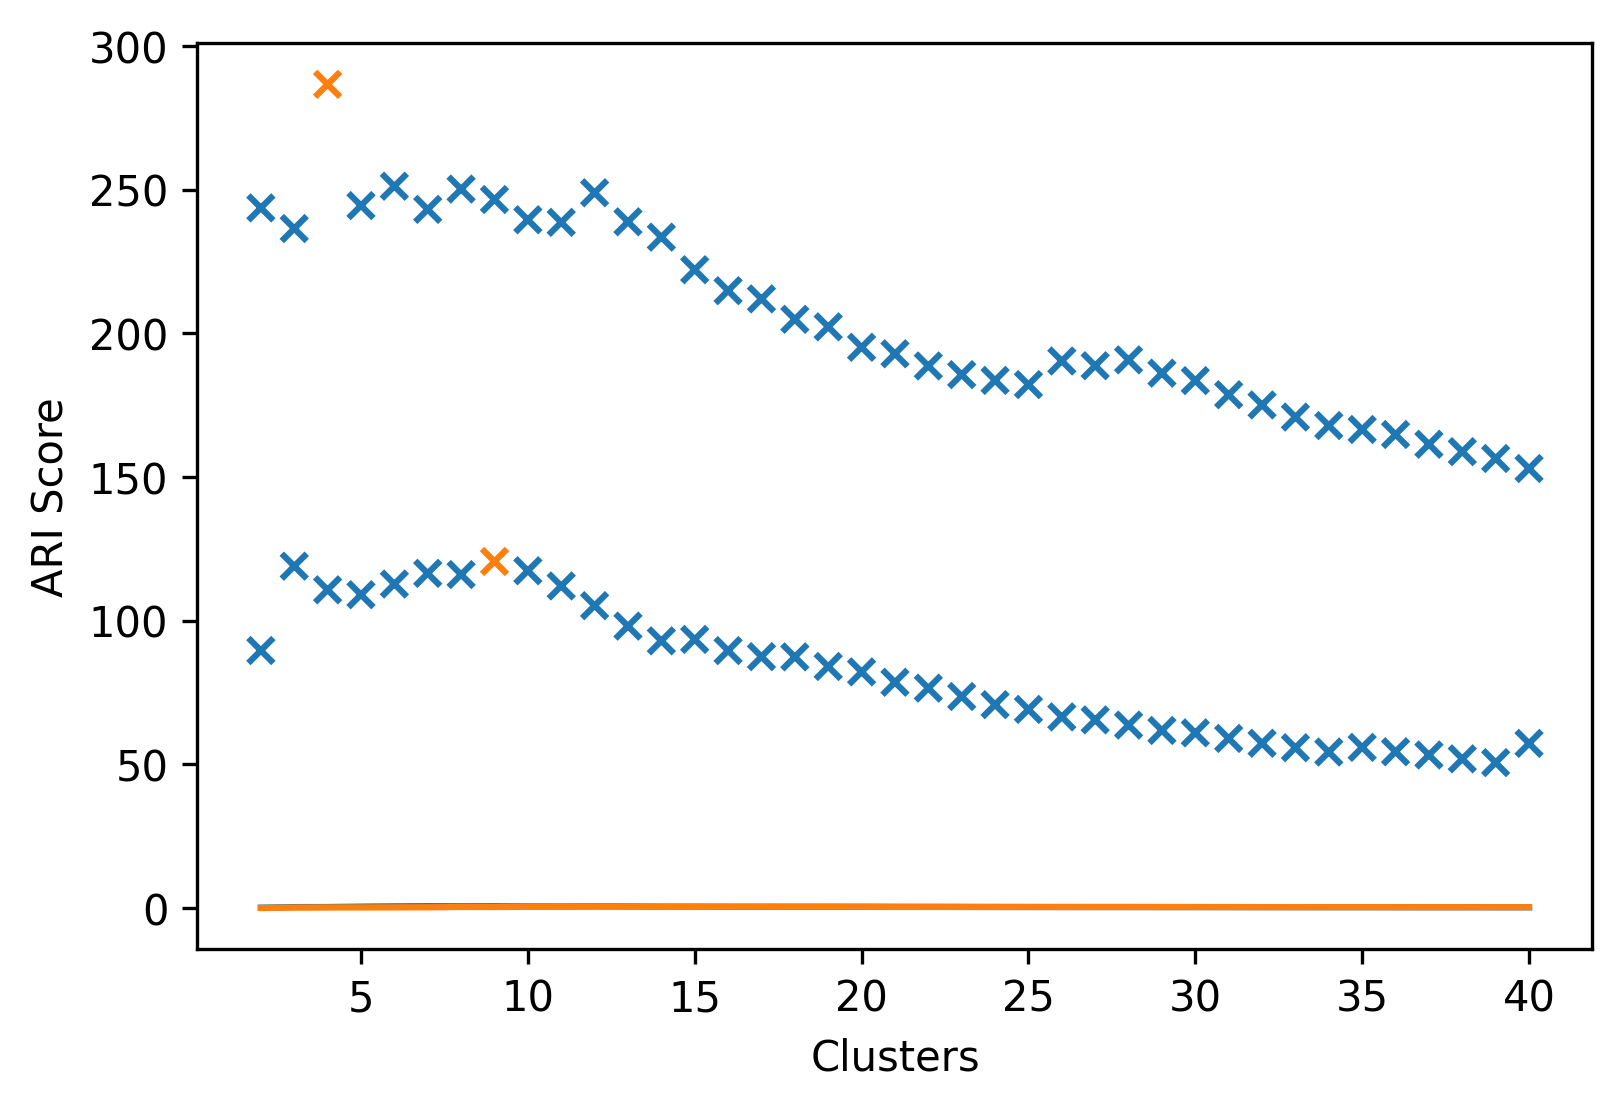

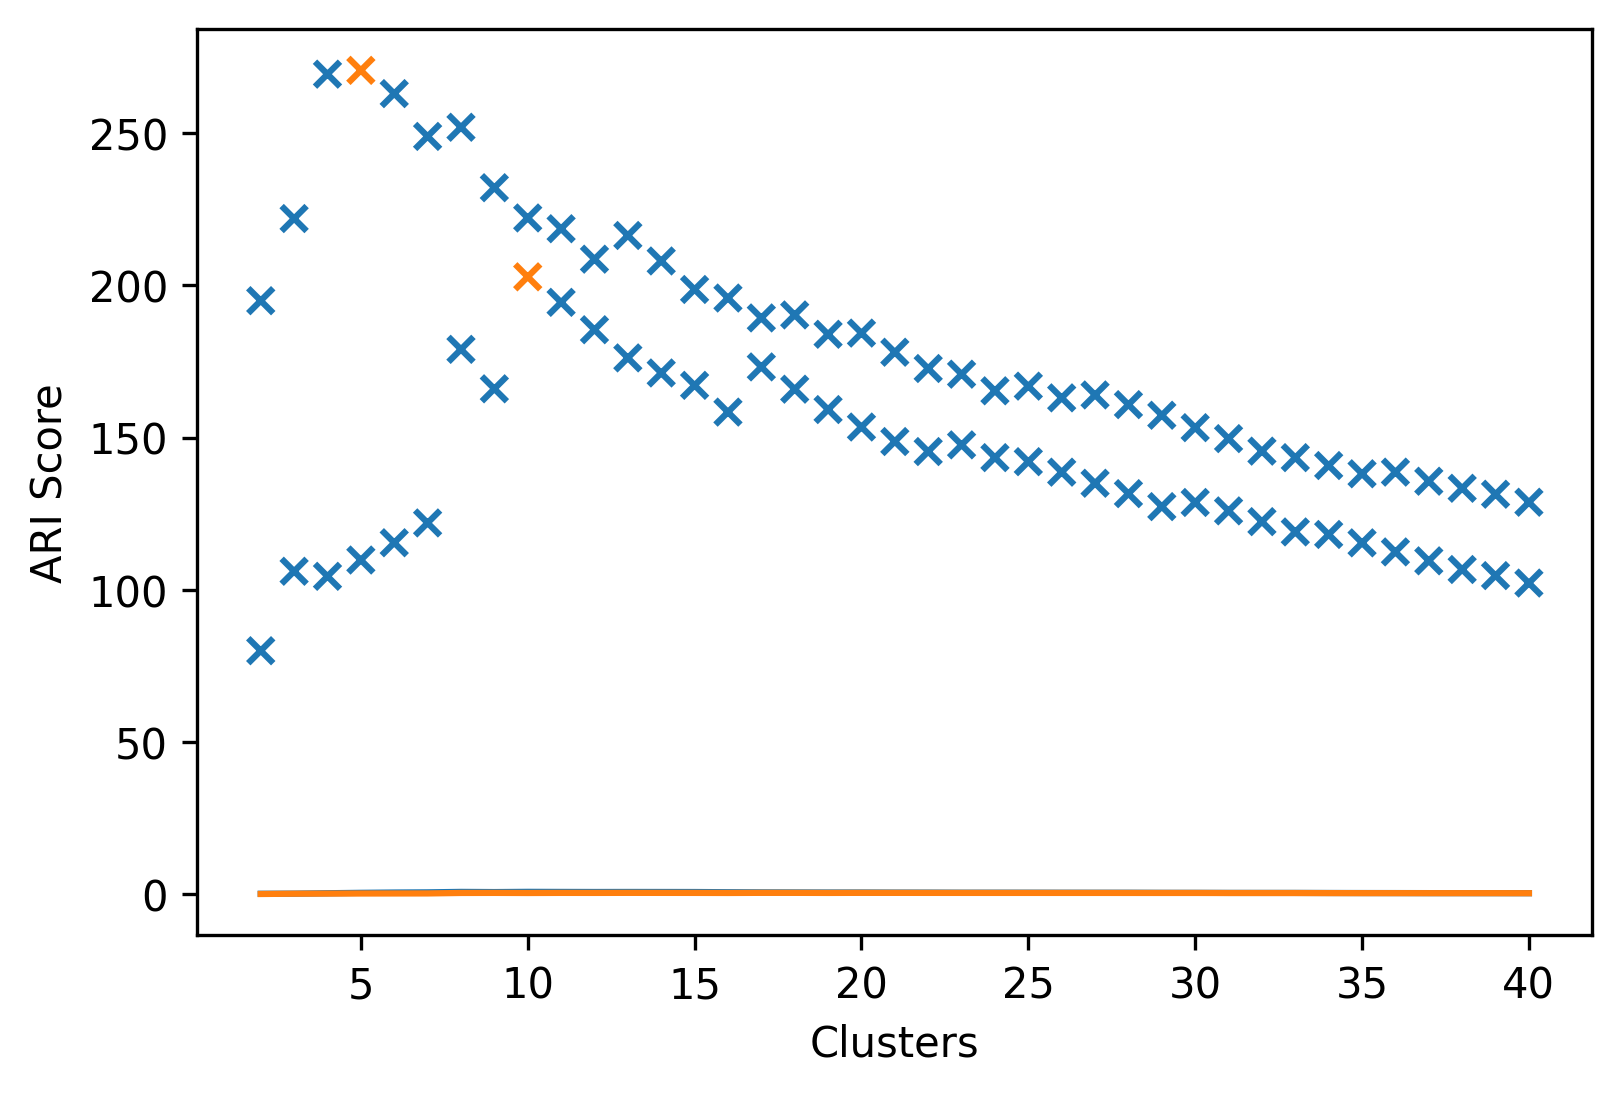

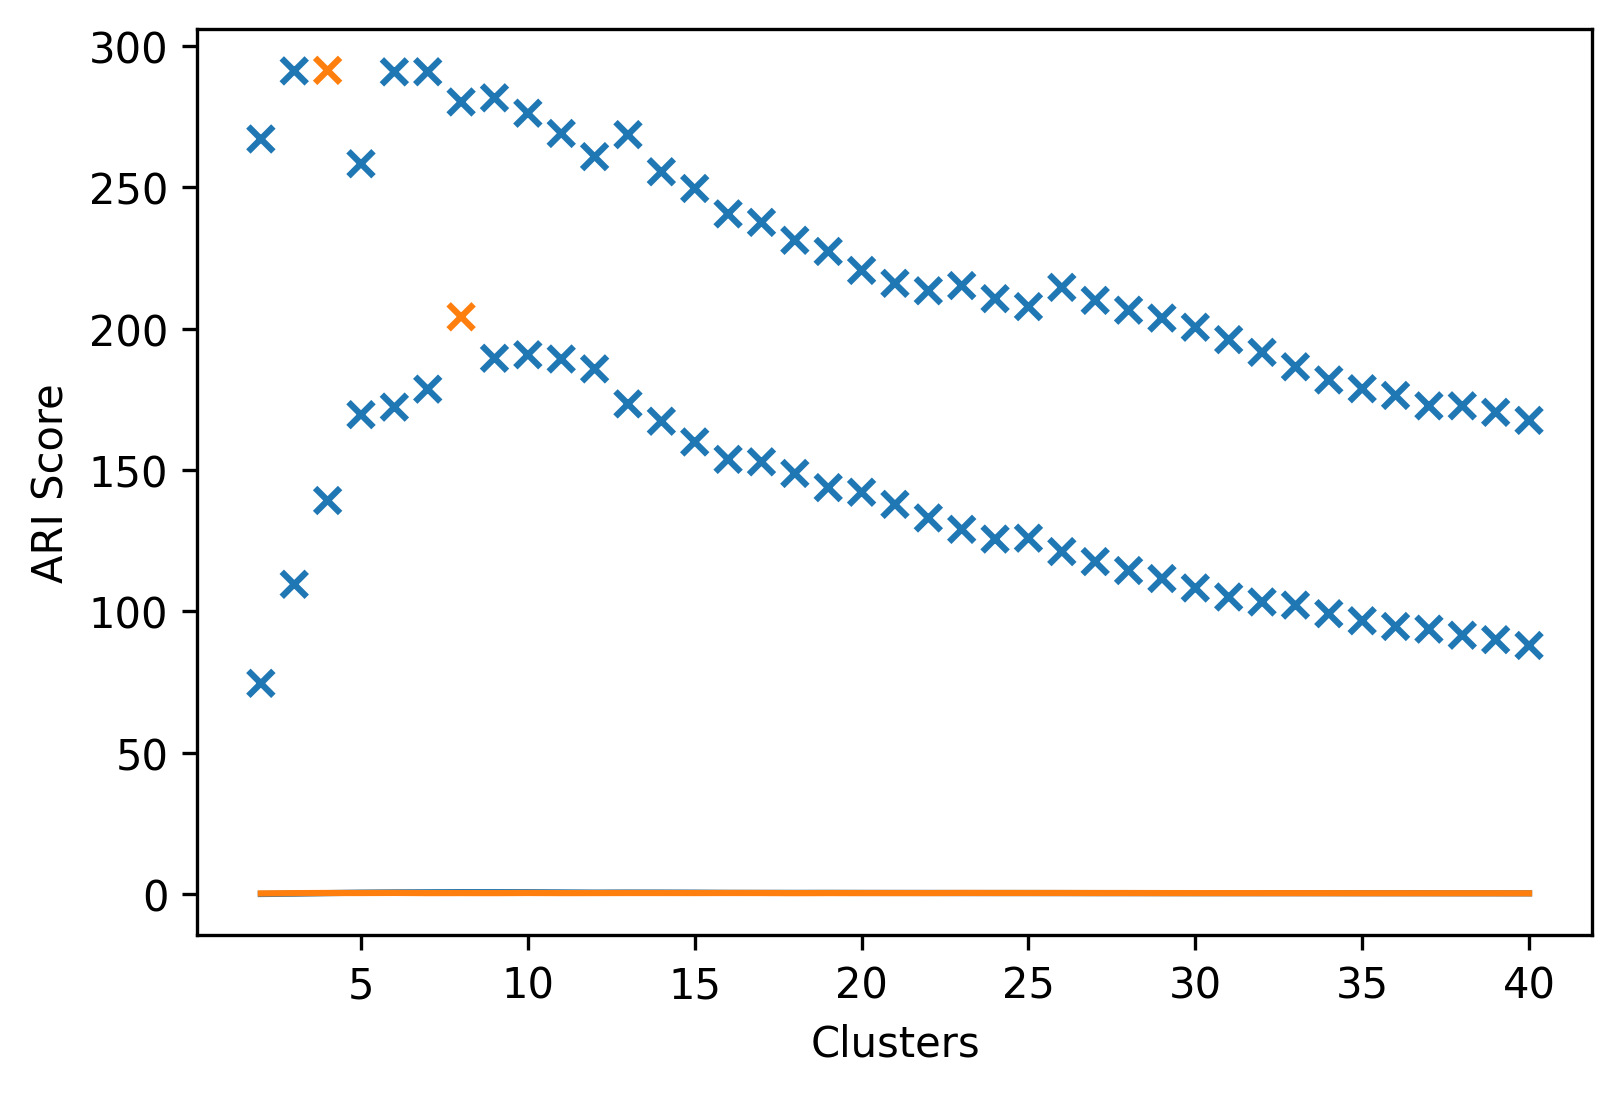

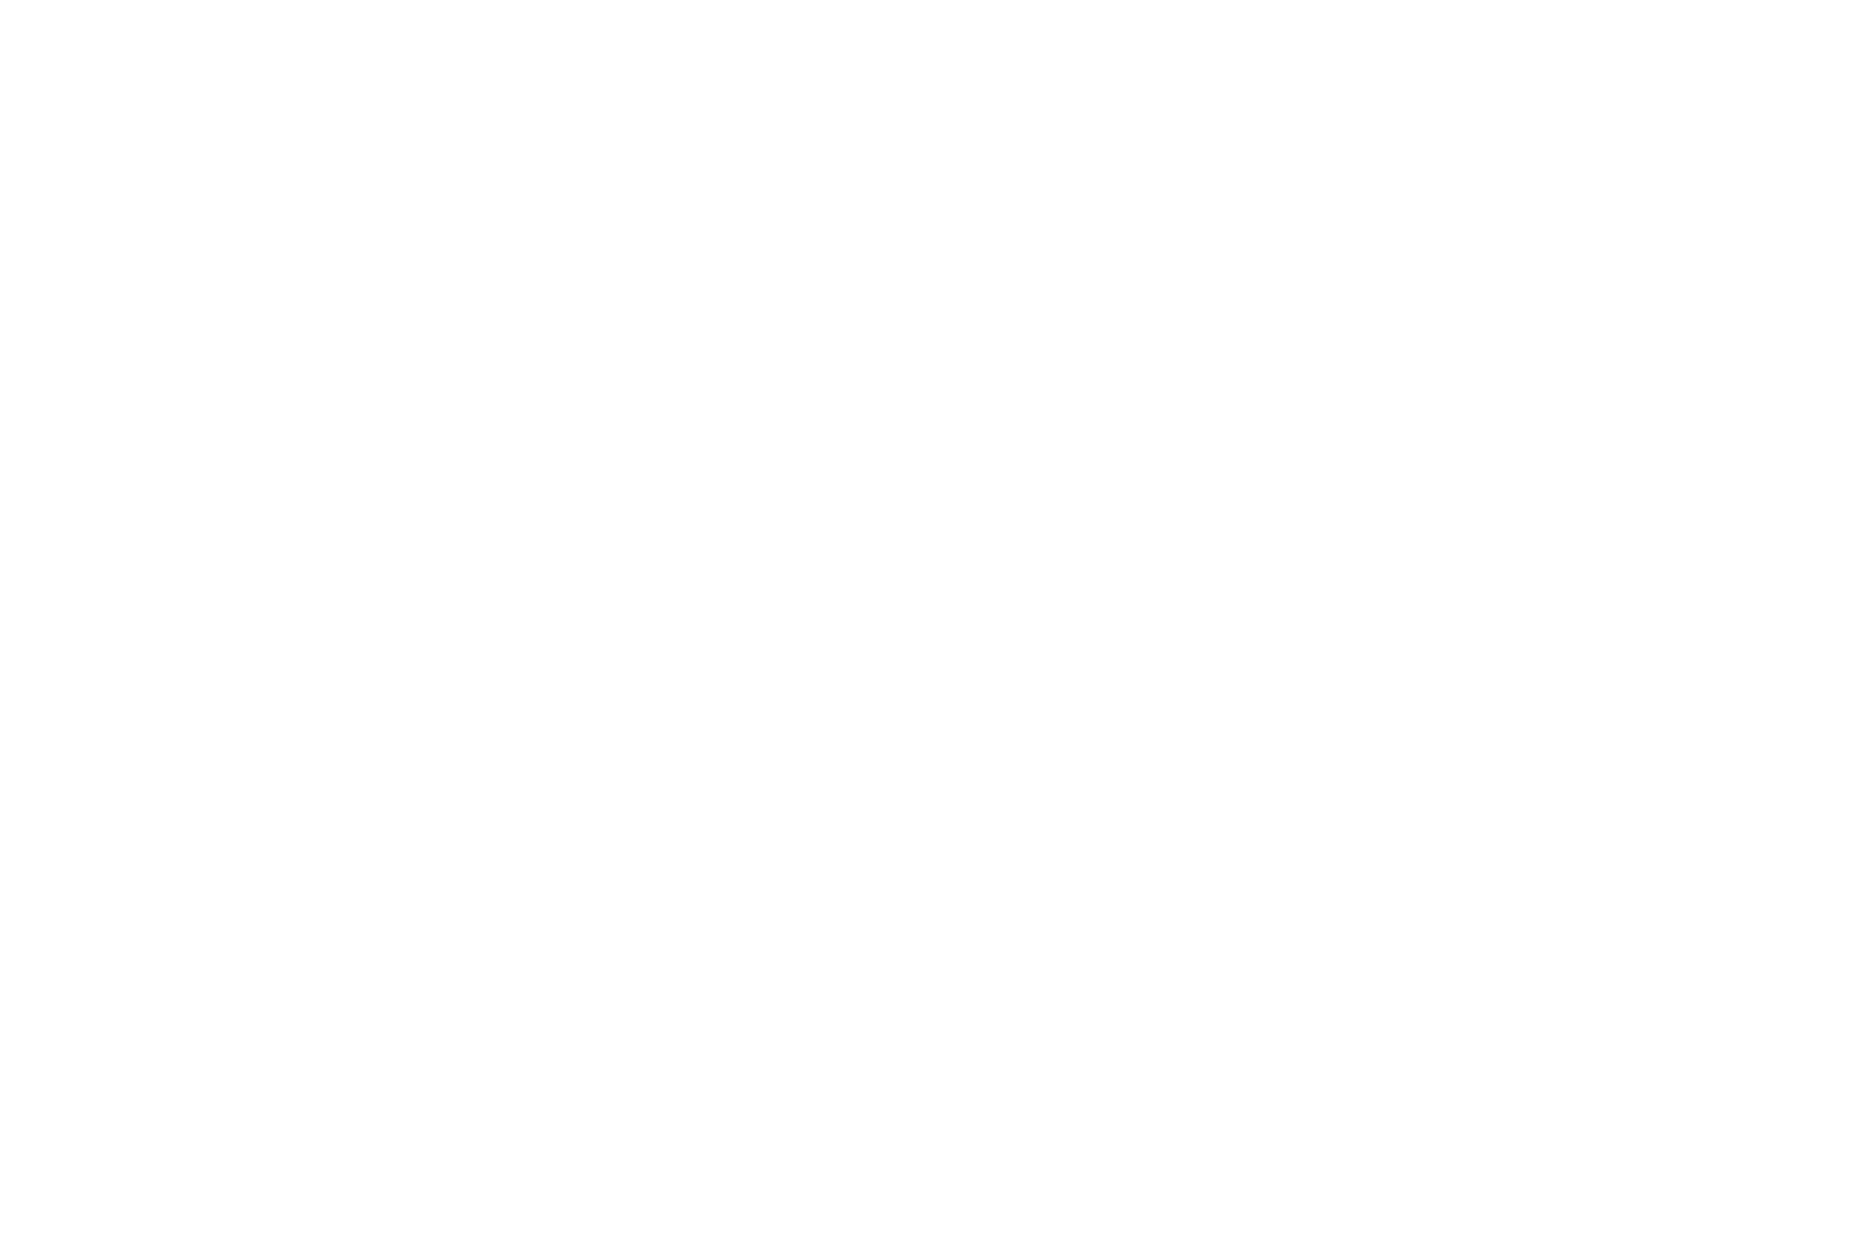

In [14]:
boxplot_fig, boxplot_axes = plt.subplots(ncols=3, sharey=True)

# boxplot_axes[-1].set_ylabel('ARI score')
boxplot_fig.subplots_adjust(wspace=0, hspace=0)

boxplot_axes[0].set_ylim(0, 1)
for (index, condition), boxplot_ax in zip(enumerate(("high_variance_low_covariance",)), boxplot_axes):
    best_nmf_ch_ari_scores = []
    best_optimal_nmf_ari_scores = []
    best_spatial_ch_ari_scores = []
    for random_seed in range(0, 6):
        spatial_ch_ari_scores = []
        nmf_ch_ari_scores = []
        nmf_Q_scores = []
        optimal_nmf_ari_scores = []
        spatial_Q_scores = []
        for initialization_seed in range(0, 10):
            synthetic_cortex_spatial_result = SpiceMixResult(
                path2dataset=f'../../data/synthetic_metagene_free_cortex/500_cells_100_genes_{condition}_random_seed_{random_seed}',
                result_filename=f"../../data/synthetic_metagene_free_cortex/500_cells_100_genes_{condition}_random_seed_{random_seed}/results_with_spatial_extreme_lambda_K_15_initialization_seed_{initialization_seed}.hdf5",
                neighbor_suffix="",
            )

            synthetic_cortex_nmf_result = SpiceMixResult(
                path2dataset=f'../../data/synthetic_metagene_free_cortex/500_cells_100_genes_{condition}_random_seed_{random_seed}',
                result_filename=f"../../data/synthetic_metagene_free_cortex/500_cells_100_genes_{condition}_random_seed_{random_seed}/results_no_spatial_K_15_initialization_seed_{initialization_seed}.hdf5",
                neighbor_suffix="",
            )

            synthetic_cortex_spatial_result.load_latent_states(iiter=-1)
            synthetic_cortex_nmf_result.load_latent_states(iiter=-1)

            fig, ax = plt.subplots()
            synthetic_cortex_spatial_result.plot_ari_versus_clusters(ax, K_range=np.arange(2, 41))
            optimal_num_clusters = synthetic_cortex_nmf_result.plot_ari_versus_clusters(ax, K_range=np.arange(2, 41))

            synthetic_cortex_nmf_result.determine_clusters(optimal_num_clusters)
            optimal_nmf_ari_score = synthetic_cortex_nmf_result.calculate_ari_score()
            optimal_nmf_ari_scores.append(optimal_nmf_ari_score)

            synthetic_cortex_spatial_result.determine_optimal_clusters(ax, K_range=np.arange(2, 41))
            synthetic_cortex_nmf_result.determine_optimal_clusters(ax, K_range=np.arange(2, 41))

            spatial_ch_ari_score = synthetic_cortex_spatial_result.calculate_ari_score()
            spatial_ch_ari_scores.append(spatial_ch_ari_score)
            nmf_ch_ari_score = synthetic_cortex_nmf_result.calculate_ari_score()
            nmf_ch_ari_scores.append(nmf_ch_ari_score)
            
            spatial_Q_scores.append(synthetic_cortex_spatial_result.progress["Q"][-1])
            nmf_Q_scores.append(synthetic_cortex_nmf_result.progress["Q"][-1])
            
        nmf_best_index = np.argmax(nmf_Q_scores)
        spatial_best_index = np.argmax(spatial_Q_scores)
        
        best_nmf_ch_ari_scores.append(nmf_ch_ari_scores[nmf_best_index])
        best_spatial_ch_ari_scores.append(spatial_ch_ari_scores[spatial_best_index])
        best_optimal_nmf_ari_scores.append(np.max(optimal_nmf_ari_scores))
            
           
        
        
#         synthetic_cortex_spatial_result.determine_optimal_clusters(ax, K_range=np.arange(2, 41), metric="silhouette")
#         synthetic_cortex_nmf_result.determine_optimal_clusters(ax, K_range=np.arange(2, 41), metric="silhouette")

#         spatial_silhouette_ari_score = synthetic_cortex_spatial_result.calculate_ari_score()
#         spatial_silhouette_ari_scores.append(spatial_silhouette_ari_score)
#         nmf_silhouette_ari_score = synthetic_cortex_nmf_result.calculate_ari_score()
#         nmf_silhouette_ari_scores.append(nmf_silhouette_ari_score)      
        
        ax.set_visible(False)

    # boxplot_ax.boxplot([spatial_ch_ari_scores, spatial_silhouette_ari_scores, optimal_nmf_ari_scores, nmf_ch_ari_scores, nmf_silhouette_ari_scores], positions=list(range(index * 5, (index + 1) * 5)), vert=True)
    spatial_boxplot = boxplot_ax.boxplot(best_spatial_ch_ari_scores, patch_artist=True, vert=True, widths=[0.975], positions=[0.5])
    set_box_color(spatial_boxplot, "#3474a4")
    
    optimal_nmf_boxplot = boxplot_ax.boxplot(best_optimal_nmf_ari_scores, patch_artist=True, vert=True, widths=[0.975], positions=[1.5])
    set_box_color(optimal_nmf_boxplot, "#e28743", use_hatch=True)
    
    nmf_boxplot = boxplot_ax.boxplot(best_nmf_ch_ari_scores, patch_artist=True, vert=True, widths=[0.975], positions=[2.5])
    set_box_color(nmf_boxplot, "#e28743")
    
    boxplot_ax.set_xticks([1.5])
    boxplot_ax.set_xticklabels([" ".join(condition.split("_")[:2])])
    boxplot_ax.set_xlim(-0.5, 3.5)
    
    for tic in boxplot_ax.yaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)


for boxplot_ax in boxplot_axes[1:-1]:
    boxplot_ax.spines["left"].set_visible(False)
    boxplot_ax.spines["right"].set_visible(False)
    
boxplot_axes[0].spines["right"].set_visible(False)
boxplot_axes[-1].spines["left"].set_visible(False)

plt.show()

Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_lambda_1e-2_K_10.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 36
#clusters = 36, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_lambda_1e-2_K_15.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 24
#clusters = 24, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_lambda_1e-2_K_20.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 13
#clusters = 13, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_lambda_1e-2_K_25.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 7
#clusters = 7, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_lambda_1e-2_K_30.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 9
#clusters = 9, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_lambda_1e-2_K_35.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 8
#clusters = 8, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_lambda_1e-4_K_10.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 7
#clusters = 7, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_lambda_1e-4_K_15.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 31
#clusters = 31, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_lambda_1e-4_K_20.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 10
#clusters = 10, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_lambda_1e-4_K_25.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 8
#clusters = 8, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_lambda_1e-4_K_30.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 10
#clusters = 10, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_lambda_1e-4_K_35.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 8
#clusters = 8, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_lambda_1e-6_K_10.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 7
#clusters = 7, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_lambda_1e-6_K_15.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 7
#clusters = 7, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_lambda_1e-6_K_20.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 17
#clusters = 17, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_lambda_1e-6_K_25.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 7
#clusters = 7, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_lambda_1e-6_K_30.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 10
#clusters = 10, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_lambda_1e-6_K_35.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 8
#clusters = 8, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_lambda_1e-8_K_10.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 7
#clusters = 7, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_lambda_1e-8_K_15.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 7
#clusters = 7, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_lambda_1e-8_K_20.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 17
#clusters = 17, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_lambda_1e-8_K_25.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 7
#clusters = 7, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_lambda_1e-8_K_30.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 13
#clusters = 13, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_lambda_1e-8_K_35.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 9
#clusters = 9, #-1 = 0


[Text(0.5, 0, '10'),
 Text(1.5, 0, '15'),
 Text(2.5, 0, '20'),
 Text(3.5, 0, '25'),
 Text(4.5, 0, '30'),
 Text(5.5, 0, '35')]

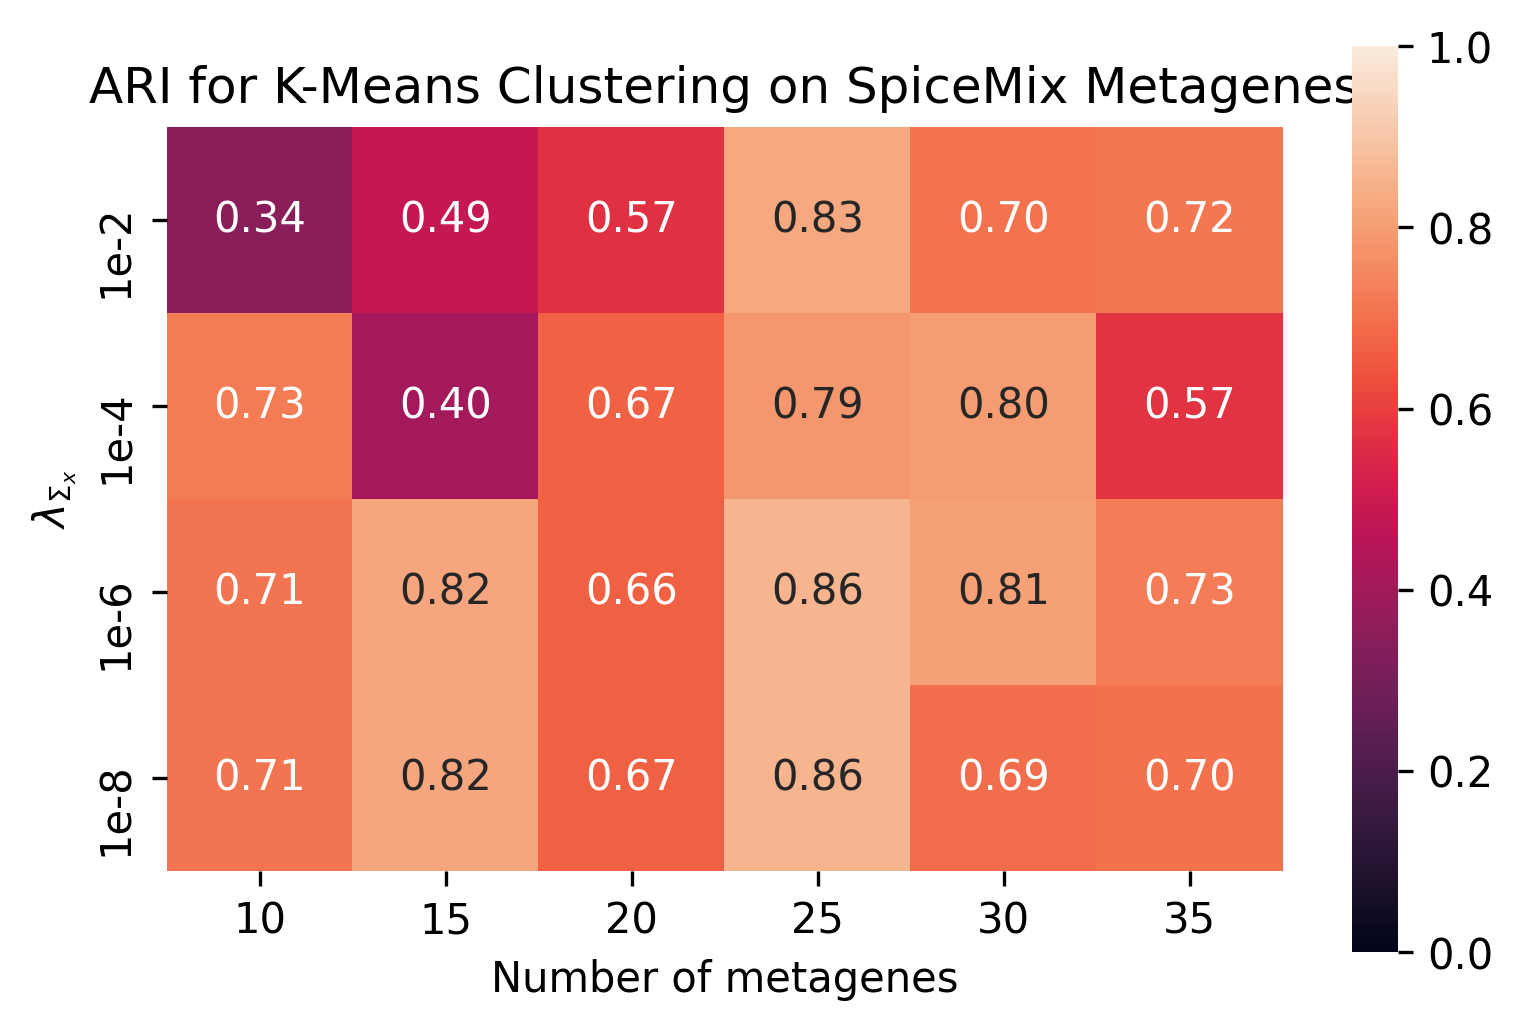

In [8]:
scores = []
lambda_values = ("1e-2", "1e-4", "1e-6", "1e-8")
K_values = range(10, 36, 5)

fig, ax = plt.subplots()
for lambda_value in lambda_values:
    row_scores = []
    for K in K_values:
        synthetic_cortex_spatial_result = SpiceMixResult(
            path2dataset=f'../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0',
            result_filename=f"../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_with_spatial_lambda_{lambda_value}_K_{K}.hdf5",
            neighbor_suffix="",
        )
        
        synthetic_cortex_spatial_result.load_latent_states(iiter=-1)
        synthetic_cortex_spatial_result.determine_optimal_clusters(ax, K_range=np.arange(2, 41))
        #synthetic_cortex_spatial_result.determine_clusters(8)

        spatial_ch_ari_score = synthetic_cortex_spatial_result.calculate_ari_score()
        row_scores.append(spatial_ch_ari_score)
    scores.append(row_scores)
    
ax = sns.heatmap(scores, annot=True, fmt=".2f", vmin=0, vmax=1, square=True)

ax.set_title("ARI for K-Means Clustering on SpiceMix Metagenes")
ax.set_ylabel("$\lambda_{\Sigma_x}$")
ax.set_xlabel("Number of metagenes")
ax.set_yticklabels(lambda_values)
ax.set_xticklabels(K_values)

Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_no_spatial_K_10.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 40
#clusters = 40, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_no_spatial_K_15.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 36
#clusters = 36, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_no_spatial_K_20.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 23
#clusters = 23, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_no_spatial_K_25.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 8
#clusters = 8, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_no_spatial_K_30.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 7
#clusters = 7, #-1 = 0
Result file = ../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_no_spatial_K_35.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1
optimal K = 3
#clusters = 3, #-1 = 0


Text(0.5, 422.16666666666663, 'Number of metagenes')

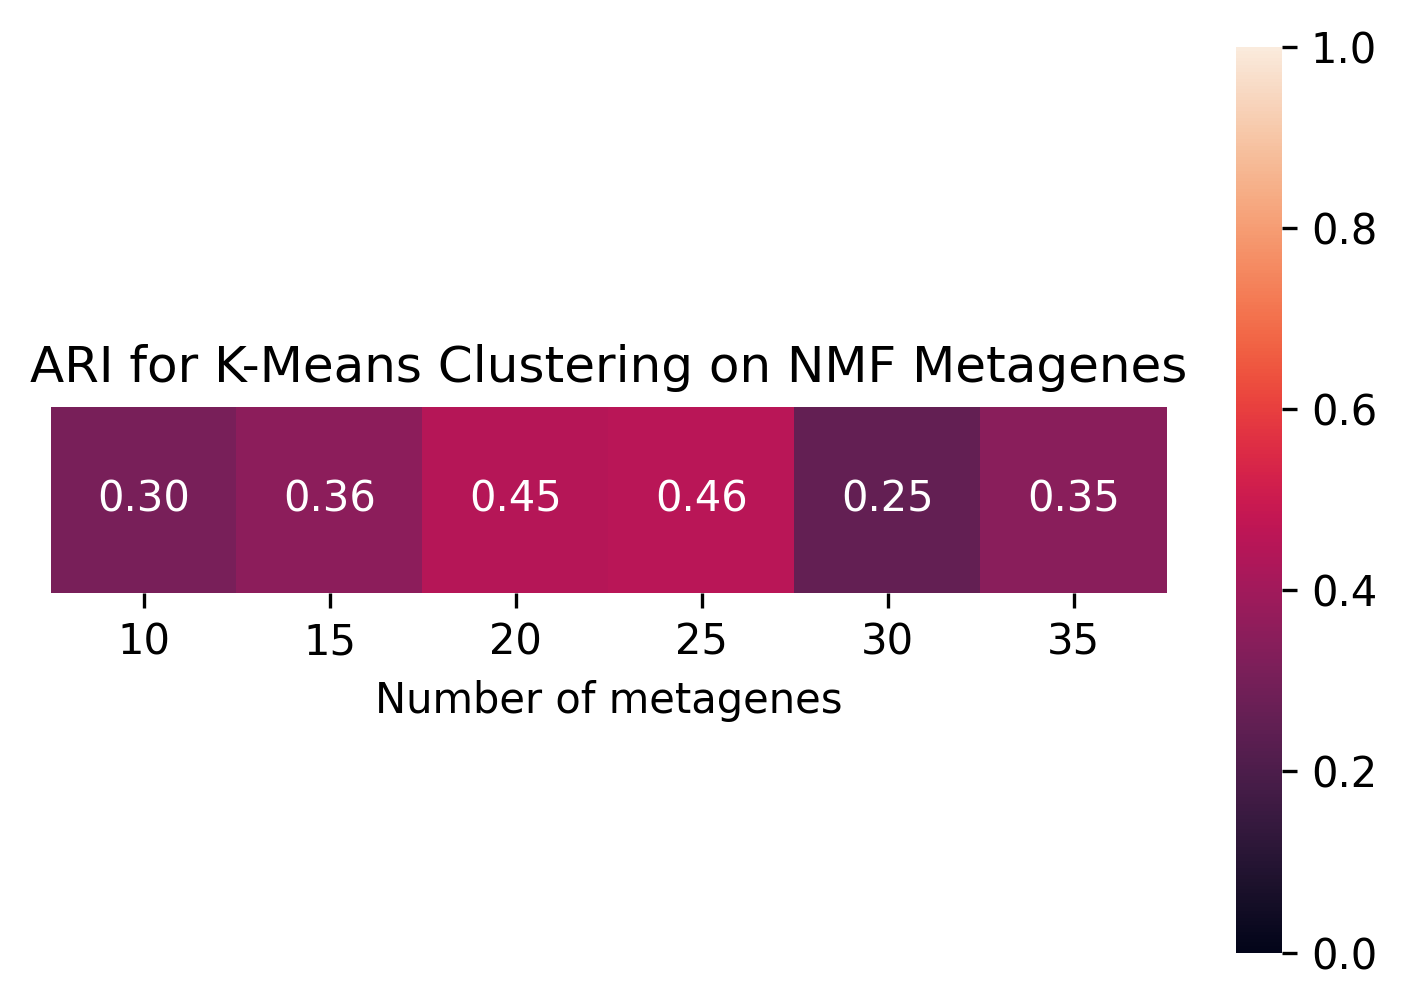

In [7]:
scores = []
lambda_values = ("1e-2", "1e-4", "1e-6", "1e-8")
K_values = range(10, 36, 5)

for K in K_values:
    synthetic_cortex_spatial_result = SpiceMixResult(
        path2dataset=f'../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0',
        result_filename=f"../../data/synthetic_metagene_free_cortex/500_cells_100_genes_low_variance_low_covariance_random_seed_0/results_no_spatial_K_{K}.hdf5",
        neighbor_suffix="",
    )

    synthetic_cortex_spatial_result.load_latent_states(iiter=-1)
    synthetic_cortex_spatial_result.determine_optimal_clusters(ax, K_range=np.arange(2, 41))

    spatial_ch_ari_score = synthetic_cortex_spatial_result.calculate_ari_score()
    scores.append(spatial_ch_ari_score)
    
ax = sns.heatmap(np.array(scores)[np.newaxis, :], annot=True, fmt=".2f", vmin=0, vmax=1, square=True)

ax.set_title("ARI for K-Means Clustering on NMF Metagenes")
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticklabels(K_values)
ax.set_xlabel("Number of metagenes")